In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

X = pd.read_csv('X_with_cluster_distances.csv')
Y = pd.read_csv('Y.csv')

X_train, X_temp, y_train, y_temp = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

X_train.to_csv('/Users/rachelchen/Desktop/ML/project/X_train.csv', index=False)
X_test.to_csv('/Users/rachelchen/Desktop/ML/project/X_test.csv', index=False)

y_train.to_csv('/Users/rachelchen/Desktop/ML/project/y_train.csv', index=False)
y_test.to_csv('/Users/rachelchen/Desktop/ML/project/y_test.csv', index=False)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
print("X_val shape:", X_val.shape)


Training features shape: (16342, 13)
Testing features shape: (2043, 13)
Training labels shape: (16342, 1)
Testing labels shape: (2043, 1)
X_val shape: (2043, 13)


In [2]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train_poly shape:", X_train_poly.shape)

print("X_test_poly shape:", X_test_poly.shape)


X_train_poly shape: (16342, 105)
X_test_poly shape: (2043, 105)


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
y_train_array = y_train.values.ravel()

model.fit(X_train_poly, y_train_array)

y_pred = model.predict(X_test_poly)

print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on Test Set:  0.38277043563387175

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.50      0.54        66
           2       0.60      0.61      0.61       198
           3       0.47      0.49      0.48       248
           4       0.37      0.42      0.39       236
           5       0.40      0.36      0.38       275
           6       0.31      0.39      0.34       207
           7       0.28      0.36      0.32       188
           8       0.25      0.17      0.21       138
           9       0.23      0.21      0.22       104
          10       0.19      0.07      0.10        70
          11       0.27      0.35      0.30        78
          12       0.03      0.02      0.03        47
          13       0.20      0.12      0.15        34
          14       0.00      0.00      0.00        25
          15       0.10      0.05      0.06        21
          16  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [5]:
model2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model2.fit(X_train_poly, y_train_array)
y_pred2 = model2.predict(X_test_poly)
print("Accuracy on Test Set (100 nodes): ", accuracy_score(y_test, y_pred2))
print("\nClassification Report (100 nodes):")
print(classification_report(y_test, y_pred2))

model3 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model3.fit(X_train_poly, y_train_array)
y_pred3 = model3.predict(X_test_poly)
print("Accuracy on Test Set (100, 50 nodes): ", accuracy_score(y_test, y_pred3))
print("\nClassification Report (100, 50 nodes):")
print(classification_report(y_test, y_pred3))


Accuracy on Test Set (100 nodes):  0.3910915320606951

Classification Report (100 nodes):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      0.45      0.50        66
           2       0.57      0.66      0.61       198
           3       0.51      0.48      0.49       248
           4       0.39      0.39      0.39       236
           5       0.43      0.47      0.45       275
           6       0.36      0.33      0.35       207
           7       0.29      0.35      0.32       188
           8       0.23      0.25      0.24       138
           9       0.18      0.12      0.15       104
          10       0.17      0.17      0.17        70
          11       0.22      0.18      0.20        78
          12       0.16      0.15      0.15        47
          13       0.28      0.15      0.19        34
          14       0.08      0.04      0.05        25
          15       0.00      0.00      0.00  

In [7]:
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.5), input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.5)),
    layers.Dense(1, activation='sigmoid')
])


2025-04-27 13:37:30.111318: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing model with first layer: 500 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1634 - loss: 39.0487 - val_accuracy: 0.1796 - val_loss: 11.0020 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2452 - loss: 8.4067 - val_accuracy: 0.2237 - val_loss: 5.0368 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2583 - loss: 4.6753 - val_accuracy: 0.2252 - val_loss: 3.5492 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2768 - loss: 3.1880 - val_accuracy: 0.3030 - val_loss: 2.4125 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step accuracy: 0.2889 - loss: 2.3655 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2908, Train Precision = 0.3453, Train Recall = 0.3192, Train MSE = 5.7901, Train R² = 0.6075, Val Accuracy = 0.3182, Val Precision = 0.3368, Val Recall = 0.3182, Val MSE = 5.7602, Val R² = 0.6089
256/256 ━━━━━━━━━━━━━━━━━━━━ 2

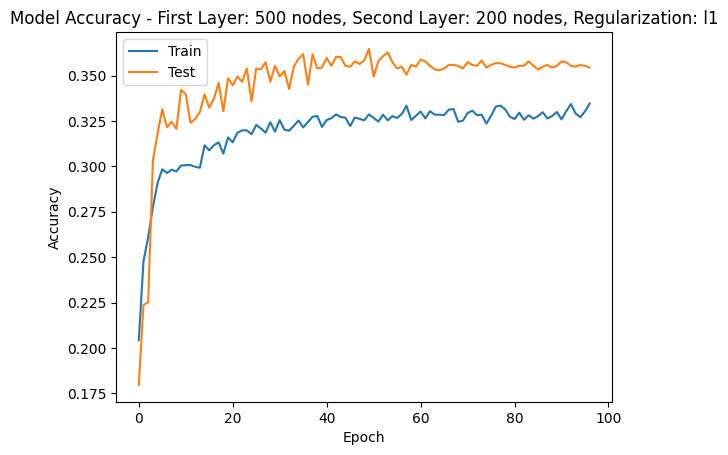

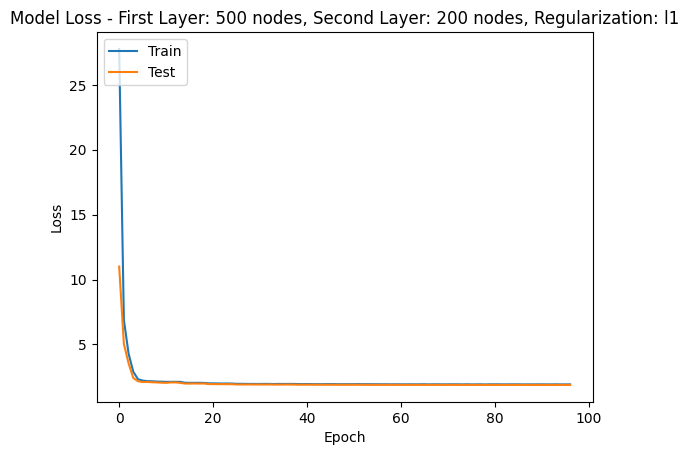

Testing model with first layer: 500 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1746 - loss: 5.9030 - val_accuracy: 0.2017 - val_loss: 4.5185 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2580 - loss: 4.2824 - val_accuracy: 0.2903 - val_loss: 3.4079 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2723 - loss: 3.4365 - val_accuracy: 0.3270 - val_loss: 2.8197 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2909 - loss: 2.8882 - val_accuracy: 0.3314 - val_loss: 2.4744 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step accuracy: 0.3071 - loss: 2.5367 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2991, Train Precision = 0.3660, Train Recall = 0.3563, Train MSE = 5.0049, Train R² = 0.6607, Val Accuracy = 0.3421, Val Precision = 0.3483, Val Recall = 0.3421, Val MSE = 5.0543, Val R² = 0.6569
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

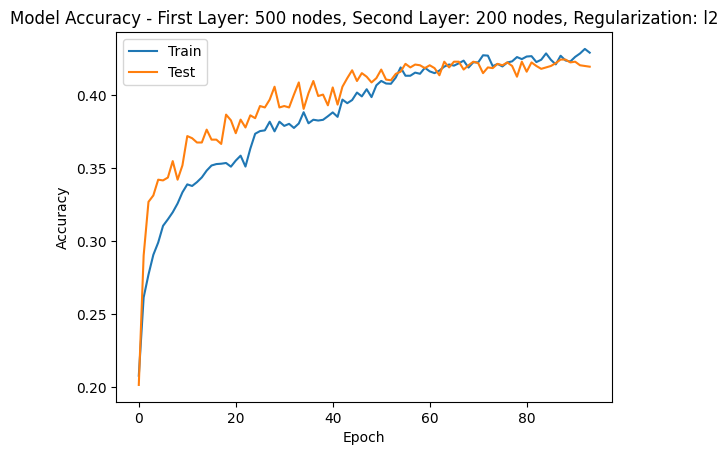

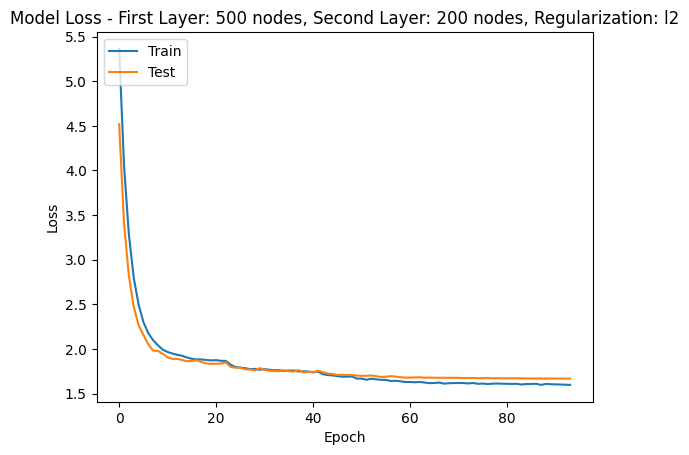

Testing model with first layer: 500 nodes, second layer: 250 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1687 - loss: 44.5869 - val_accuracy: 0.1605 - val_loss: 10.9075 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2482 - loss: 8.4008 - val_accuracy: 0.2105 - val_loss: 5.2158 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2581 - loss: 4.8049 - val_accuracy: 0.2354 - val_loss: 3.5689 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2770 - loss: 3.1762 - val_accuracy: 0.2751 - val_loss: 2.4008 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step accuracy: 0.2915 - loss: 2.3380 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2907, Train Precision = 0.3769, Train Recall = 0.3211, Train MSE = 5.1654, Train R² = 0.6498, Val Accuracy = 0.3093, Val Precision = 0.3551, Val Recall = 0.3093, Val MSE = 5.3314, Val R² = 0.6380
256/256 ━━━━━━━━━━━━━━━━━━━━ 

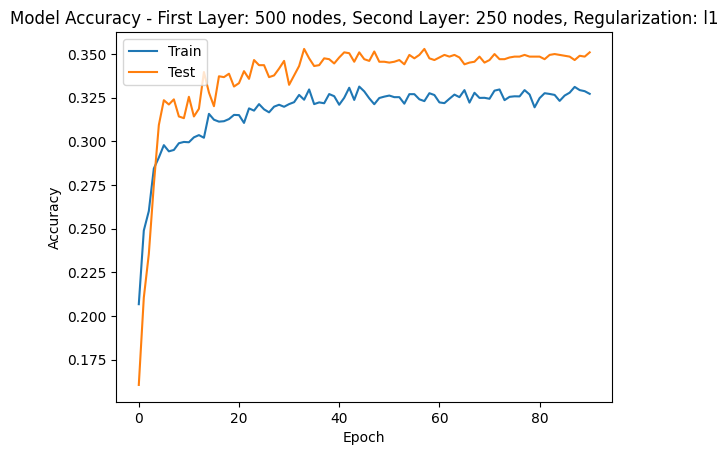

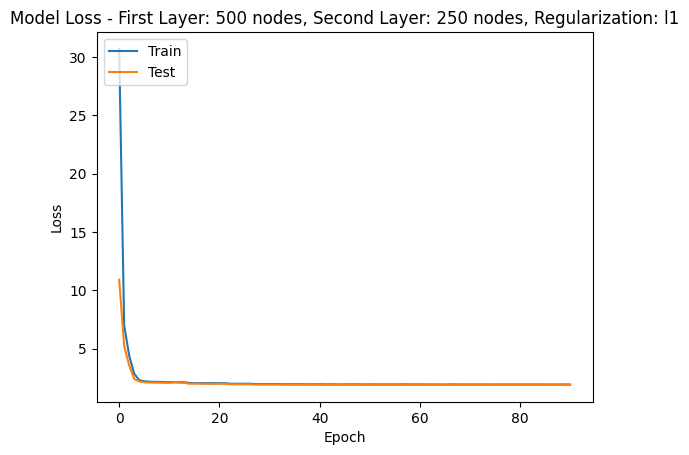

Testing model with first layer: 500 nodes, second layer: 250 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1814 - loss: 6.3241 - val_accuracy: 0.2624 - val_loss: 4.6619 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2479 - loss: 4.5527 - val_accuracy: 0.3108 - val_loss: 3.5326 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2832 - loss: 3.5372 - val_accuracy: 0.3167 - val_loss: 2.8999 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2925 - loss: 2.9623 - val_accuracy: 0.3377 - val_loss: 2.5153 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step accuracy: 0.2991 - loss: 2.5990 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2998, Train Precision = 0.3813, Train Recall = 0.3580, Train MSE = 5.1189, Train R² = 0.6530, Val Accuracy = 0.3392, Val Precision = 0.3573, Val Recall = 0.3392, Val MSE = 5.2785, Val R² = 0.6416
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

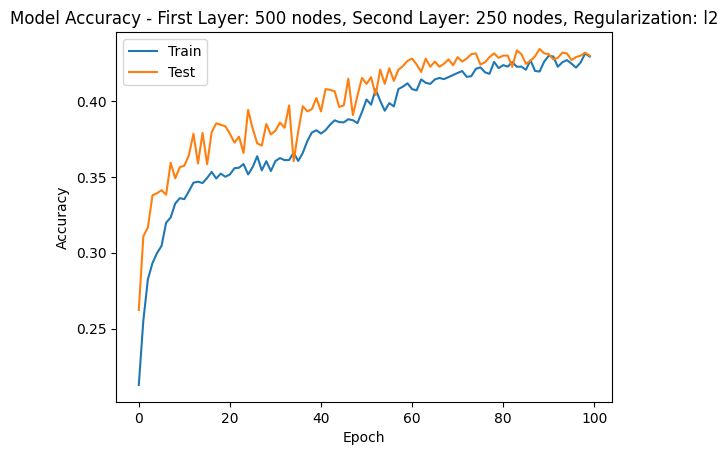

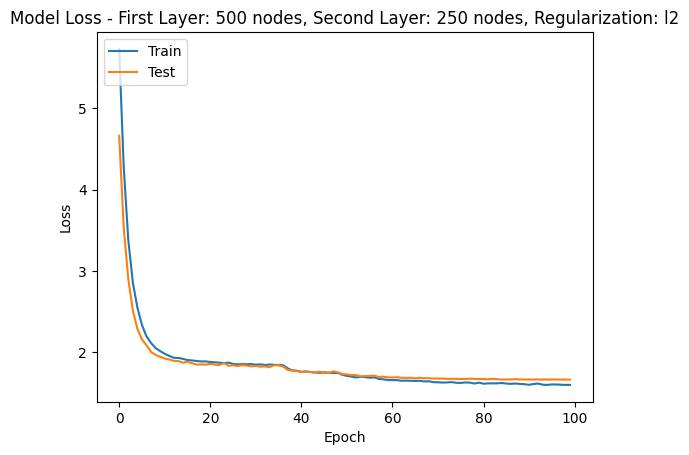

Testing model with first layer: 500 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1812 - loss: 50.1955 - val_accuracy: 0.1870 - val_loss: 11.3504 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2393 - loss: 8.7784 - val_accuracy: 0.2247 - val_loss: 5.5102 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2511 - loss: 5.2485 - val_accuracy: 0.2301 - val_loss: 3.8702 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2814 - loss: 3.3497 - val_accuracy: 0.3250 - val_loss: 2.4051 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step accuracy: 0.2880 - loss: 2.3881 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2921, Train Precision = 0.3550, Train Recall = 0.3277, Train MSE = 5.2852, Train R² = 0.6417, Val Accuracy = 0.3133, Val Precision = 0.3842, Val Recall = 0.3133, Val MSE = 5.5169, Val R² = 0.6254
256/256 ━━━━━━━━━━━━━━━━━━━━ 

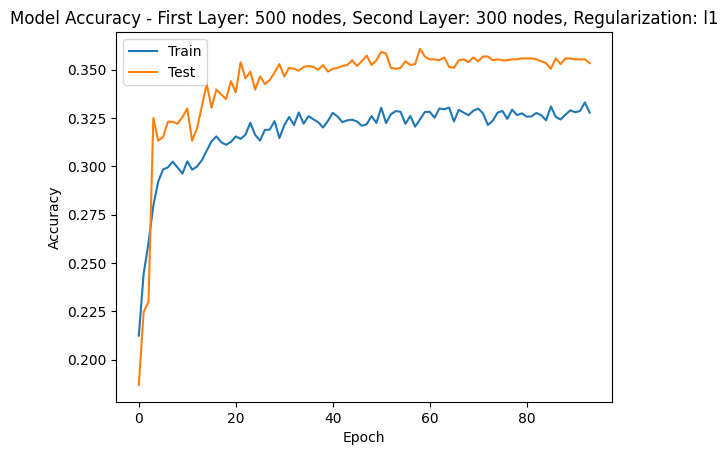

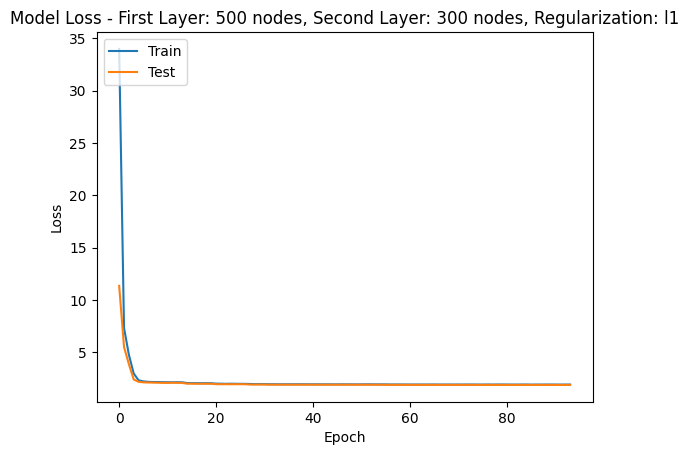

Testing model with first layer: 500 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1793 - loss: 6.7328 - val_accuracy: 0.1948 - val_loss: 4.9659 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2500 - loss: 4.7652 - val_accuracy: 0.2971 - val_loss: 3.6631 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2738 - loss: 3.6735 - val_accuracy: 0.3231 - val_loss: 2.9608 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2921 - loss: 3.0328 - val_accuracy: 0.3226 - val_loss: 2.5651 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2992 - loss: 2.6368 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2957, Train Precision = 0.3532, Train Recall = 0.3538, Train MSE = 5.2579, Train R² = 0.6436, Val Accuracy = 0.3314, Val Precision = 0.3253, Val Recall = 0.3314, Val MSE = 5.4097, Val R² = 0.6327
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

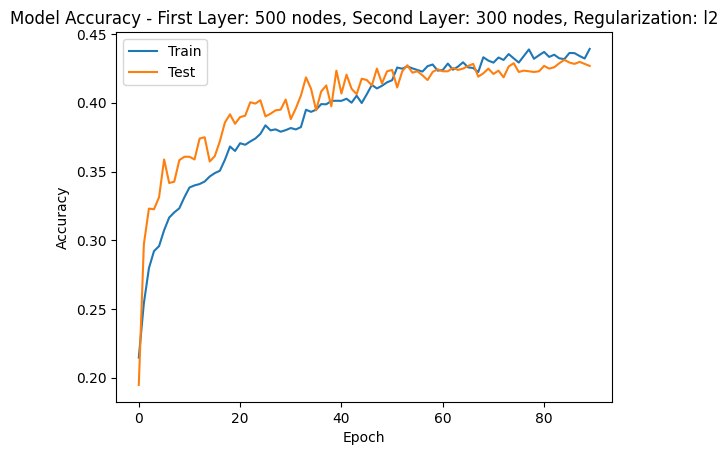

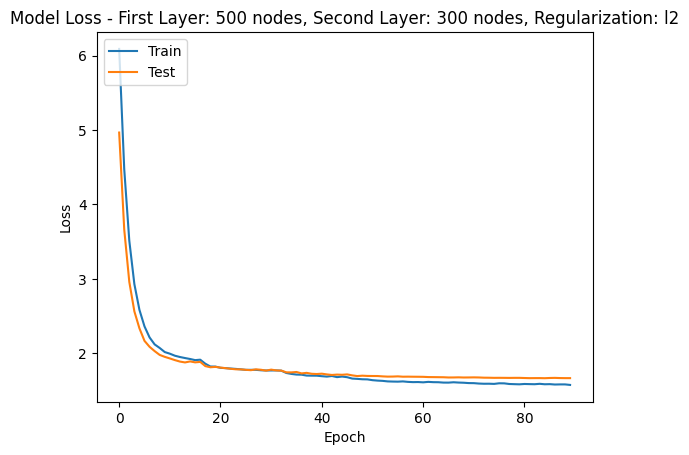

Testing model with first layer: 550 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1628 - loss: 40.5524 - val_accuracy: 0.1801 - val_loss: 10.5377 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2555 - loss: 8.0608 - val_accuracy: 0.1694 - val_loss: 5.0532 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2562 - loss: 4.5921 - val_accuracy: 0.2472 - val_loss: 3.3686 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2803 - loss: 3.0747 - val_accuracy: 0.2643 - val_loss: 2.4318 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step accuracy: 0.2872 - loss: 2.3665 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2891, Train Precision = 0.3535, Train Recall = 0.3119, Train MSE = 6.1453, Train R² = 0.5834, Val Accuracy = 0.3069, Val Precision = 0.3577, Val Recall = 0.3069, Val MSE = 6.3886, Val R² = 0.5663
256/256 ━━━━━━━━━━━━━━━━━━━━ 

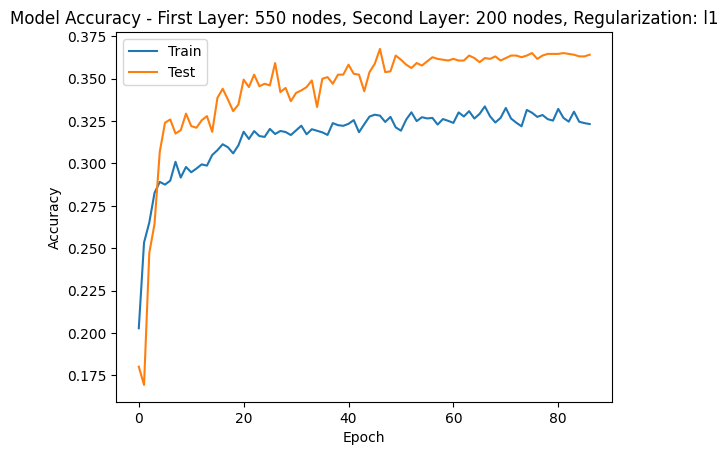

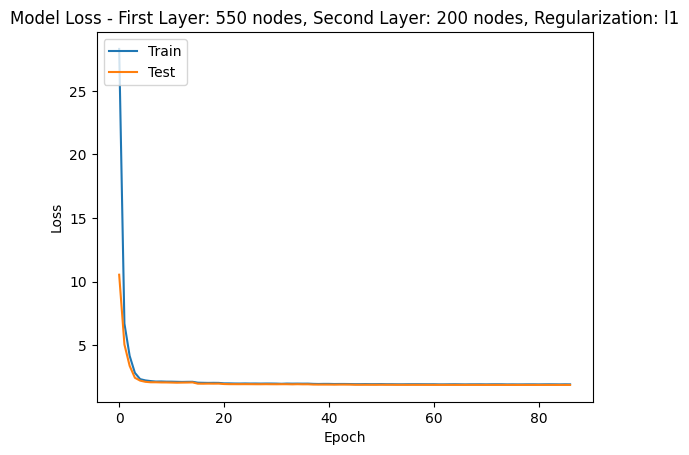

Testing model with first layer: 550 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1773 - loss: 5.9517 - val_accuracy: 0.2540 - val_loss: 4.5108 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2600 - loss: 4.2893 - val_accuracy: 0.3113 - val_loss: 3.3784 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2758 - loss: 3.4465 - val_accuracy: 0.3338 - val_loss: 2.8012 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2855 - loss: 2.8817 - val_accuracy: 0.3475 - val_loss: 2.4523 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step accuracy: 0.2969 - loss: 2.5596 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2999, Train Precision = 0.3833, Train Recall = 0.3539, Train MSE = 4.8415, Train R² = 0.6718, Val Accuracy = 0.3505, Val Precision = 0.4068, Val Recall = 0.3505, Val MSE = 5.0098, Val R² = 0.6599
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

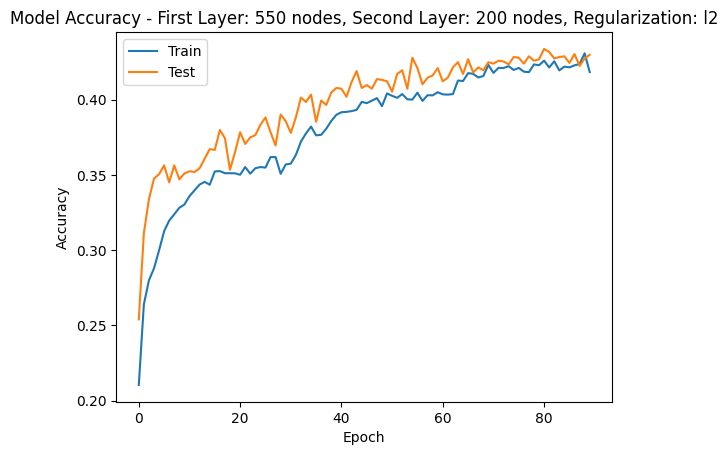

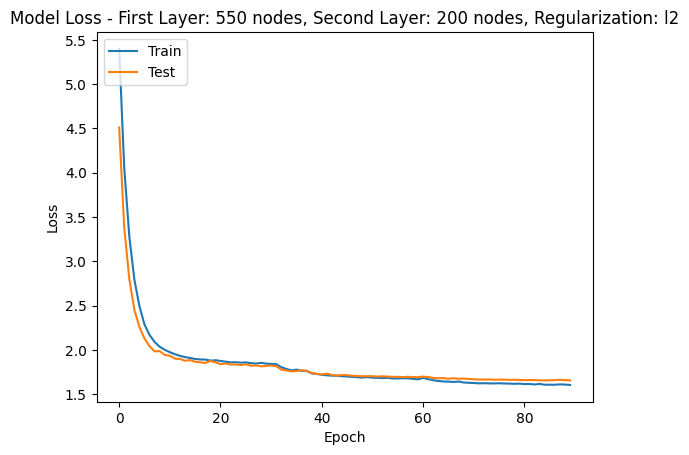

Testing model with first layer: 550 nodes, second layer: 250 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1673 - loss: 46.7351 - val_accuracy: 0.1410 - val_loss: 10.7761 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2445 - loss: 8.2957 - val_accuracy: 0.2281 - val_loss: 5.2676 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2613 - loss: 4.8529 - val_accuracy: 0.2301 - val_loss: 3.4586 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2767 - loss: 3.0614 - val_accuracy: 0.3157 - val_loss: 2.3105 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step accuracy: 0.2906 - loss: 2.3434 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2912, Train Precision = 0.3694, Train Recall = 0.3183, Train MSE = 5.5561, Train R² = 0.6234, Val Accuracy = 0.3128, Val Precision = 0.3607, Val Recall = 0.3128, Val MSE = 5.6672, Val R² = 0.6152
256/256 ━━━━━━━━━━━━━━━━━━━━ 

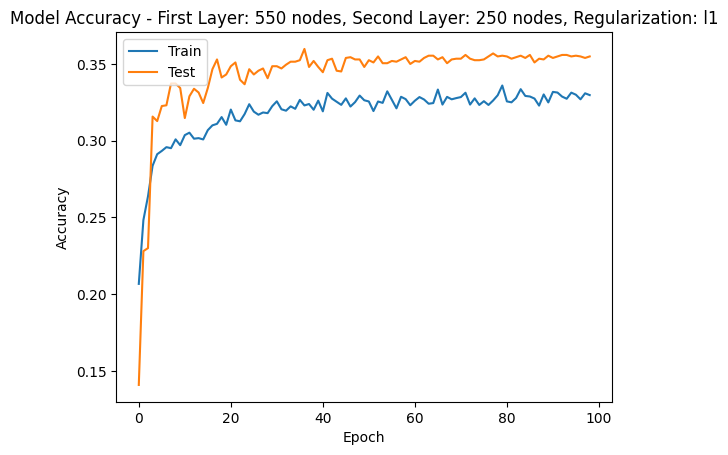

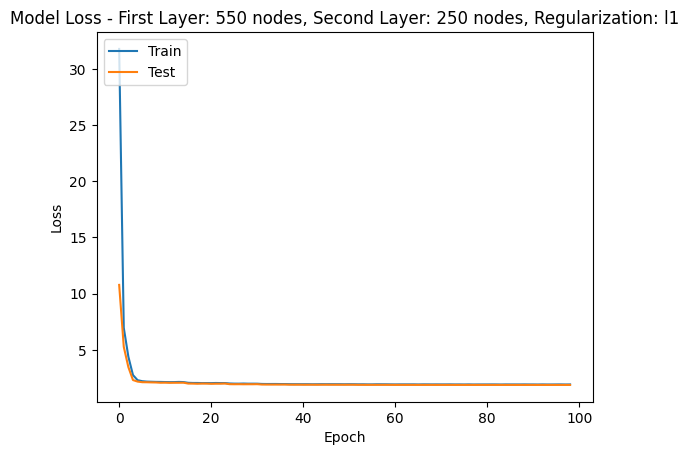

Testing model with first layer: 550 nodes, second layer: 250 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1809 - loss: 6.3902 - val_accuracy: 0.2183 - val_loss: 4.7234 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2583 - loss: 4.5655 - val_accuracy: 0.3221 - val_loss: 3.5292 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2708 - loss: 3.5772 - val_accuracy: 0.3299 - val_loss: 2.8723 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2910 - loss: 2.9809 - val_accuracy: 0.3490 - val_loss: 2.4982 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step accuracy: 0.3045 - loss: 2.5682 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.3032, Train Precision = 0.3621, Train Recall = 0.3459, Train MSE = 5.1904, Train R² = 0.6481, Val Accuracy = 0.3328, Val Precision = 0.3799, Val Recall = 0.3328, Val MSE = 5.2624, Val R² = 0.6427
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

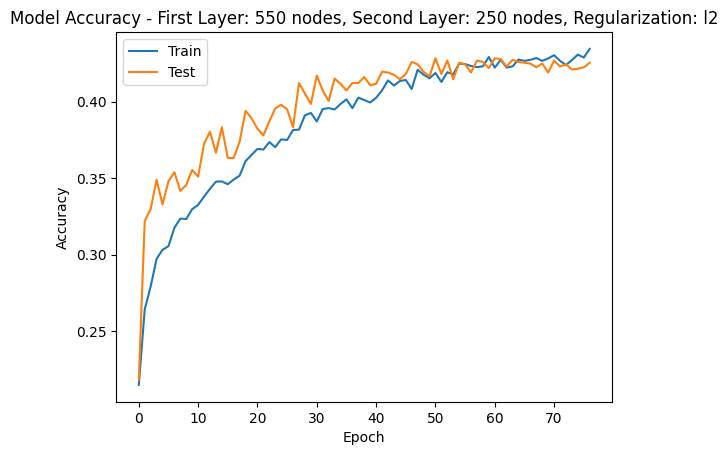

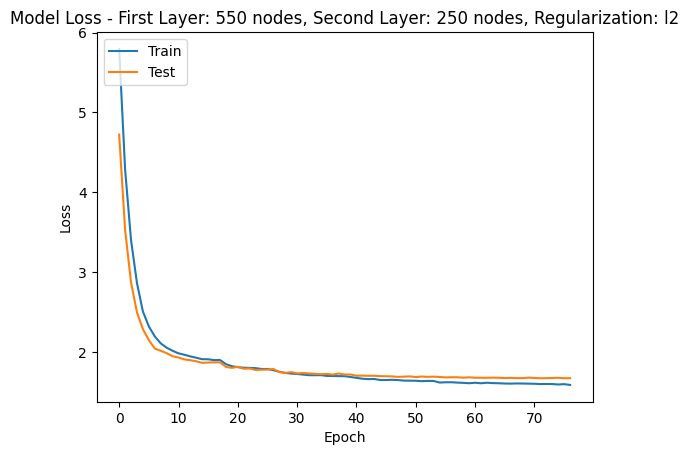

Testing model with first layer: 550 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1715 - loss: 52.3808 - val_accuracy: 0.1429 - val_loss: 10.7949 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2431 - loss: 8.4423 - val_accuracy: 0.2002 - val_loss: 5.4504 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2530 - loss: 5.0762 - val_accuracy: 0.2398 - val_loss: 3.5082 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2758 - loss: 3.0479 - val_accuracy: 0.2736 - val_loss: 2.3502 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3001 - loss: 2.3050 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2927, Train Precision = 0.3642, Train Recall = 0.3204, Train MSE = 5.8698, Train R² = 0.6021, Val Accuracy = 0.3128, Val Precision = 0.4327, Val Recall = 0.3128, Val MSE = 6.0793, Val R² = 0.5873
256/256 ━━━━━━━━━━━━━━━━━━━━ 

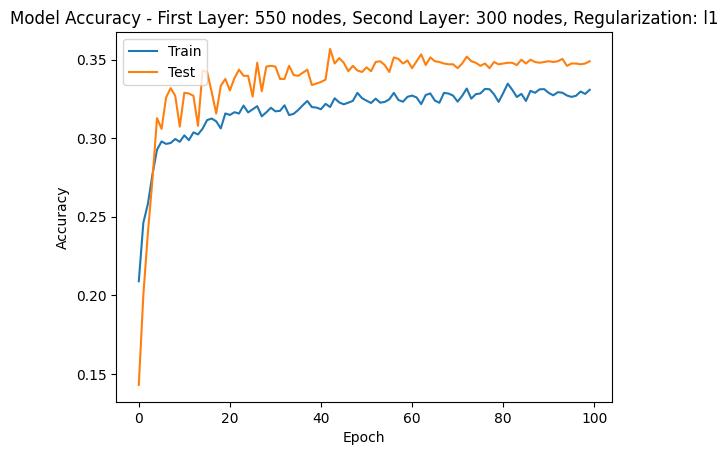

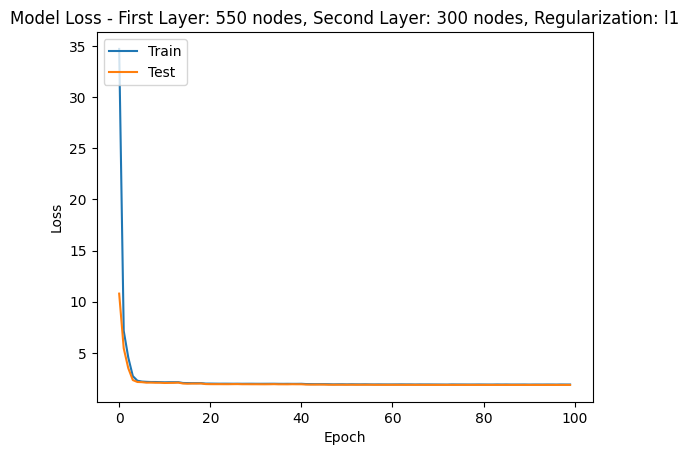

Testing model with first layer: 550 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1791 - loss: 6.8103 - val_accuracy: 0.2575 - val_loss: 5.0332 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2510 - loss: 4.7742 - val_accuracy: 0.3138 - val_loss: 3.6678 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2752 - loss: 3.6776 - val_accuracy: 0.3162 - val_loss: 2.9467 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2865 - loss: 3.0121 - val_accuracy: 0.3284 - val_loss: 2.5463 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2954 - loss: 2.6254 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3003, Train Precision = 0.3933, Train Recall = 0.3585, Train MSE = 5.0359, Train R² = 0.6586, Val Accuracy = 0.3456, Val Precision = 0.3785, Val Recall = 0.3456, Val MSE = 4.9750, Val R² = 0.6622
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 

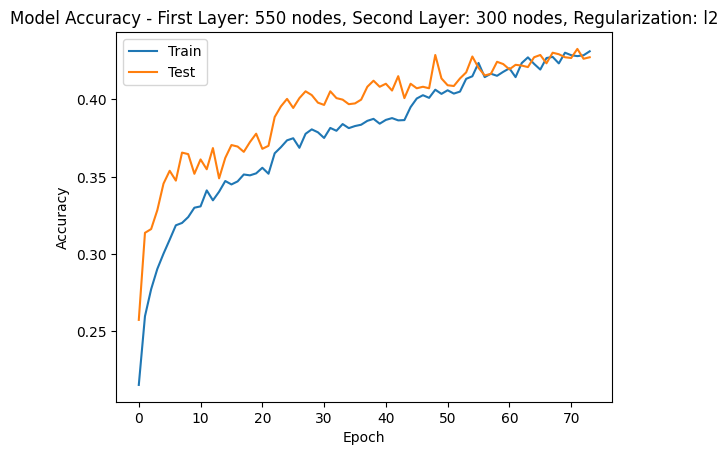

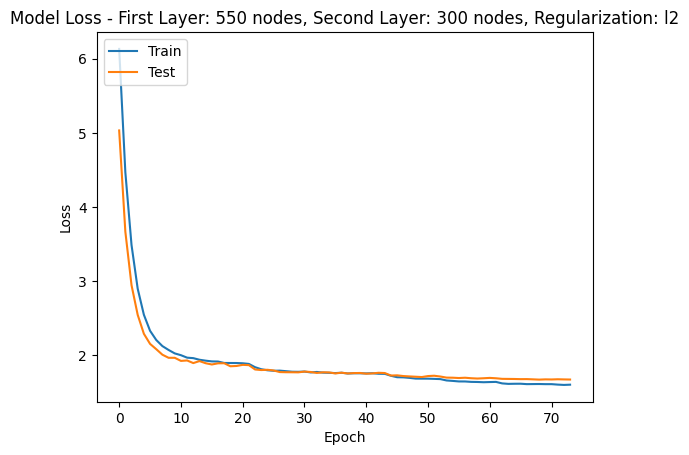

Testing model with first layer: 600 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1691 - loss: 41.7381 - val_accuracy: 0.2188 - val_loss: 9.9438 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2390 - loss: 7.7653 - val_accuracy: 0.2124 - val_loss: 4.8696 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2555 - loss: 4.4326 - val_accuracy: 0.2310 - val_loss: 3.1596 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2672 - loss: 2.8350 - val_accuracy: 0.3059 - val_loss: 2.2545 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step accuracy: 0.2895 - loss: 2.2847 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2905, Train Precision = 0.3943, Train Recall = 0.3247, Train MSE = 6.1137, Train R² = 0.5856, Val Accuracy = 0.3333, Val Precision = 0.4106, Val Recall = 0.3333, Val MSE = 6.0088, Val R² = 0.5921
256/256 ━━━━━━━━━━━━━━━━━━━━ 2

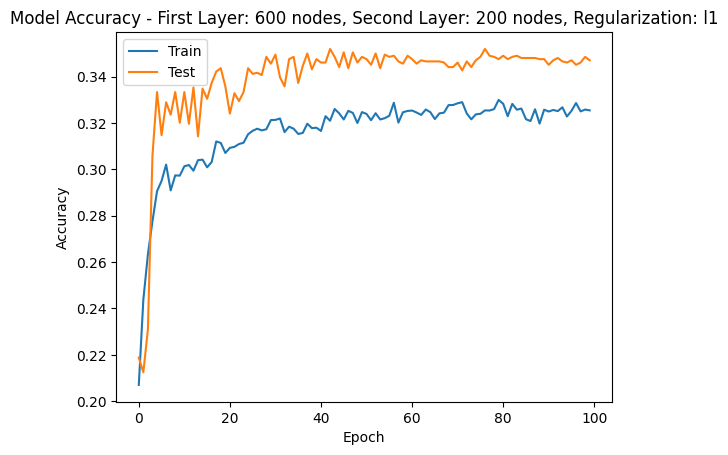

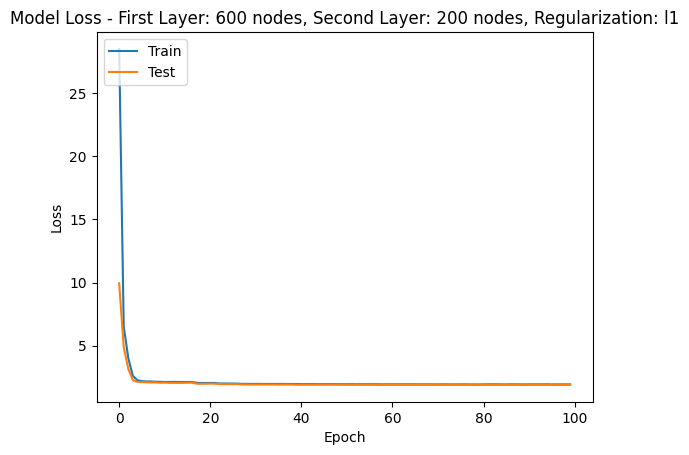

Testing model with first layer: 600 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1766 - loss: 6.0141 - val_accuracy: 0.2912 - val_loss: 4.4864 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2517 - loss: 4.3222 - val_accuracy: 0.3103 - val_loss: 3.3876 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2751 - loss: 3.4292 - val_accuracy: 0.3368 - val_loss: 2.7868 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2960 - loss: 2.8611 - val_accuracy: 0.3387 - val_loss: 2.4371 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step accuracy: 0.2956 - loss: 2.5258 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2997, Train Precision = 0.3676, Train Recall = 0.3623, Train MSE = 4.8355, Train R² = 0.6722, Val Accuracy = 0.3514, Val Precision = 0.3892, Val Recall = 0.3514, Val MSE = 4.9971, Val R² = 0.6607
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

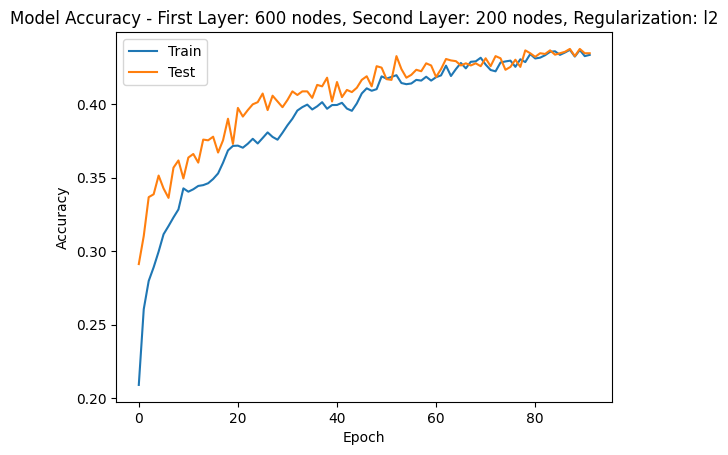

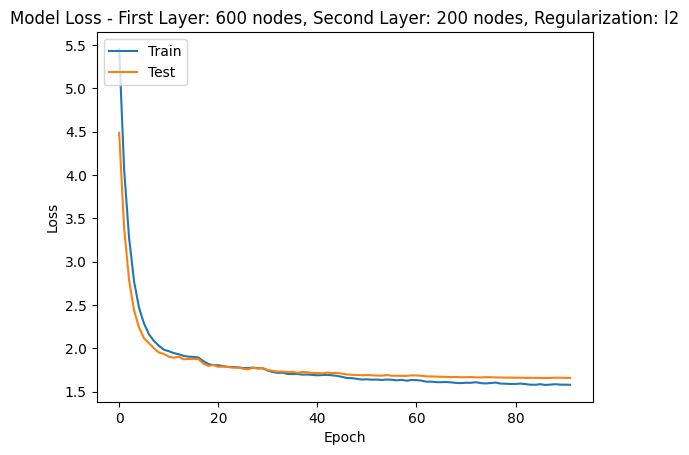

Testing model with first layer: 600 nodes, second layer: 250 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1710 - loss: 48.5568 - val_accuracy: 0.1694 - val_loss: 10.2911 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2514 - loss: 8.0373 - val_accuracy: 0.1718 - val_loss: 5.2453 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2600 - loss: 4.7585 - val_accuracy: 0.2560 - val_loss: 3.3172 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2782 - loss: 2.9184 - val_accuracy: 0.3152 - val_loss: 2.3211 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step accuracy: 0.2874 - loss: 2.3210 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2845, Train Precision = 0.3647, Train Recall = 0.3216, Train MSE = 5.7037, Train R² = 0.6134, Val Accuracy = 0.3113, Val Precision = 0.3544, Val Recall = 0.3113, Val MSE = 5.5516, Val R² = 0.6231
256/256 ━━━━━━━━━━━━━━━━━━━━ 

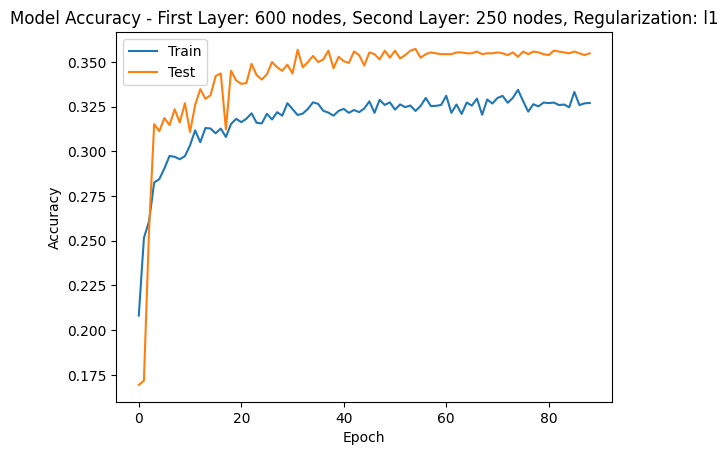

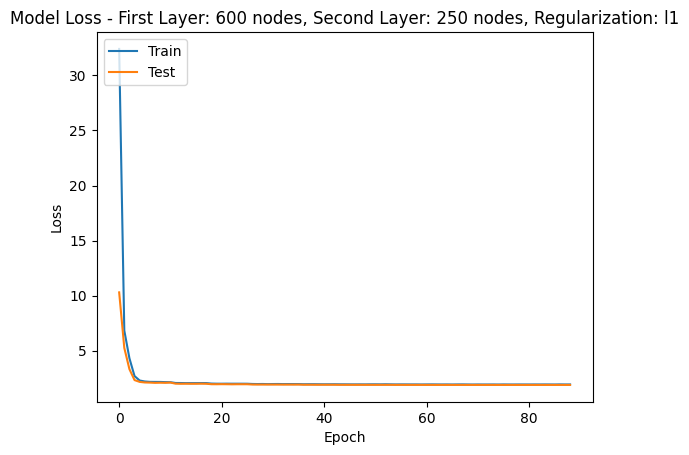

Testing model with first layer: 600 nodes, second layer: 250 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1855 - loss: 6.4545 - val_accuracy: 0.2462 - val_loss: 4.7524 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2582 - loss: 4.5975 - val_accuracy: 0.2912 - val_loss: 3.5377 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2756 - loss: 3.5468 - val_accuracy: 0.3186 - val_loss: 2.8657 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2876 - loss: 2.9384 - val_accuracy: 0.3397 - val_loss: 2.4832 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step accuracy: 0.3022 - loss: 2.5610 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3039, Train Precision = 0.3743, Train Recall = 0.3558, Train MSE = 5.0009, Train R² = 0.6610, Val Accuracy = 0.3417, Val Precision = 0.3748, Val Recall = 0.3417, Val MSE = 5.2100, Val R² = 0.6463
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 

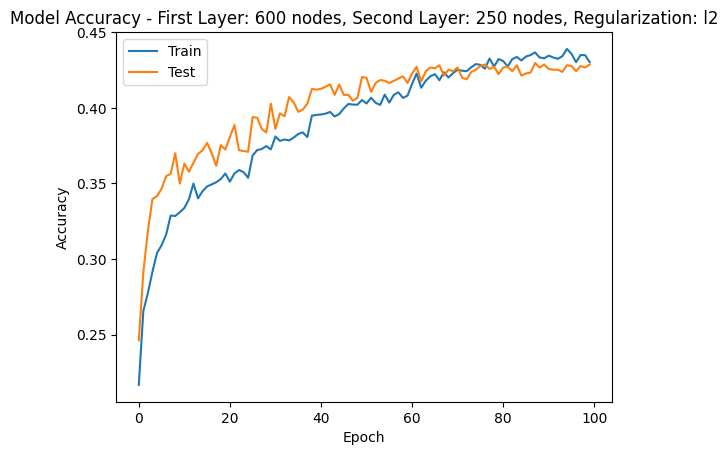

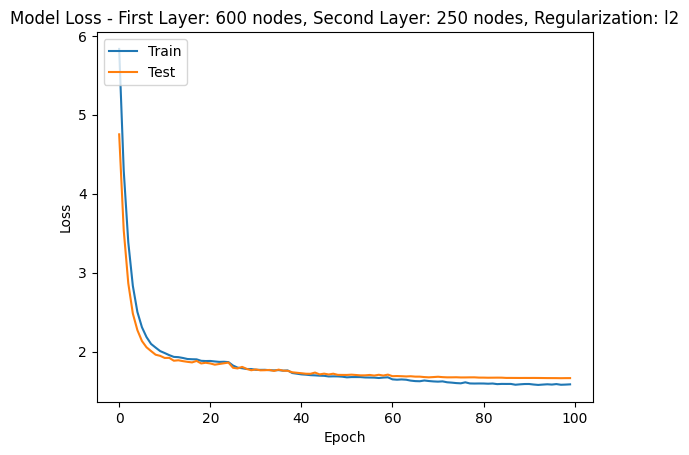

Testing model with first layer: 600 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1721 - loss: 54.6455 - val_accuracy: 0.1581 - val_loss: 10.6520 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2496 - loss: 8.4151 - val_accuracy: 0.1684 - val_loss: 5.5342 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2549 - loss: 5.0510 - val_accuracy: 0.2266 - val_loss: 3.4061 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2784 - loss: 2.9051 - val_accuracy: 0.3147 - val_loss: 2.3262 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2782 - loss: 2.3486 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2826, Train Precision = 0.3743, Train Recall = 0.3105, Train MSE = 5.6065, Train R² = 0.6199, Val Accuracy = 0.3167, Val Precision = 0.3483, Val Recall = 0.3167, Val MSE = 5.6001, Val R² = 0.6198
256/256 ━━━━━━━━━━━━━━━━━━━━ 

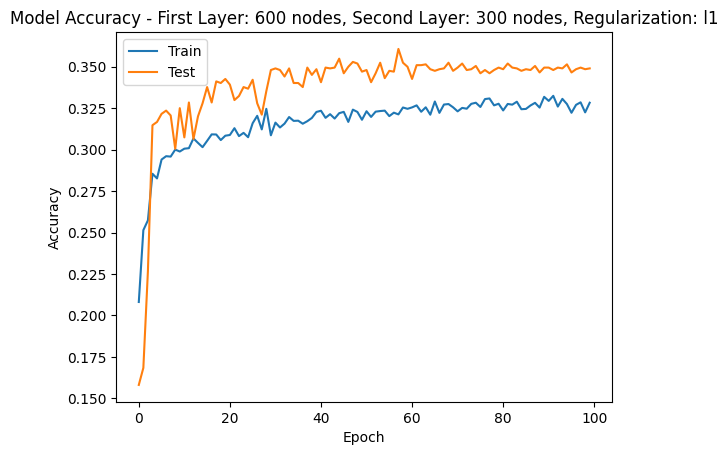

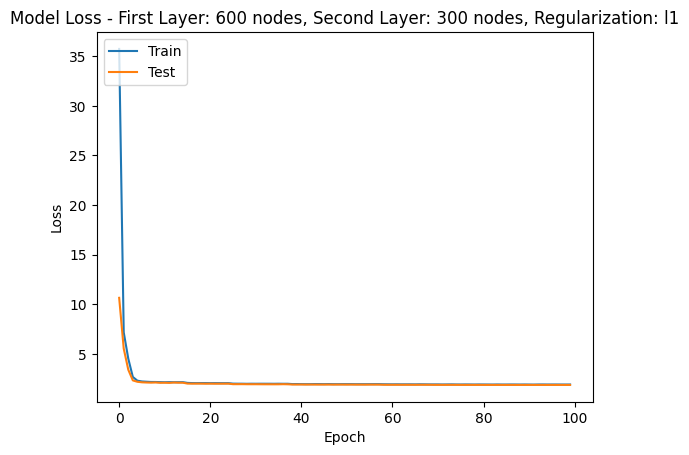

Testing model with first layer: 600 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1876 - loss: 6.8445 - val_accuracy: 0.2017 - val_loss: 5.0602 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2558 - loss: 4.7344 - val_accuracy: 0.3142 - val_loss: 3.6235 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2850 - loss: 3.6290 - val_accuracy: 0.3309 - val_loss: 2.8928 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2882 - loss: 2.9629 - val_accuracy: 0.3324 - val_loss: 2.5120 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2974 - loss: 2.5649
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3029, Train Precision = 0.3715, Train Recall = 0.3598, Train MSE = 5.2097, Train R² = 0.6468, Val Accuracy = 0.3485, Val Precision = 0.3777, Val Recall = 0.3485, Val MSE = 5.3343, Val R² = 0.6378
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9

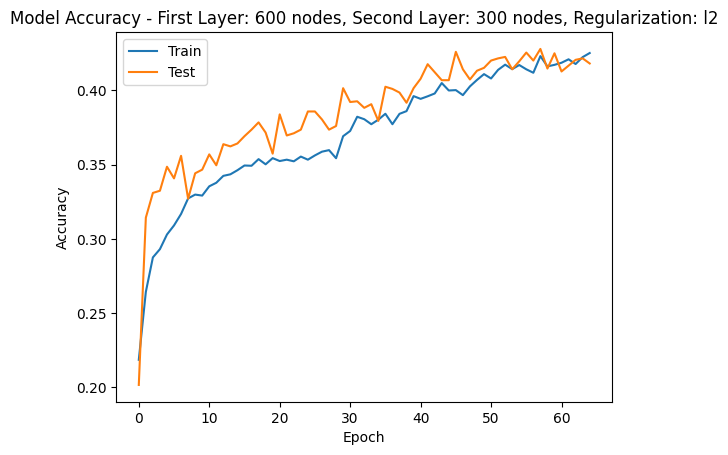

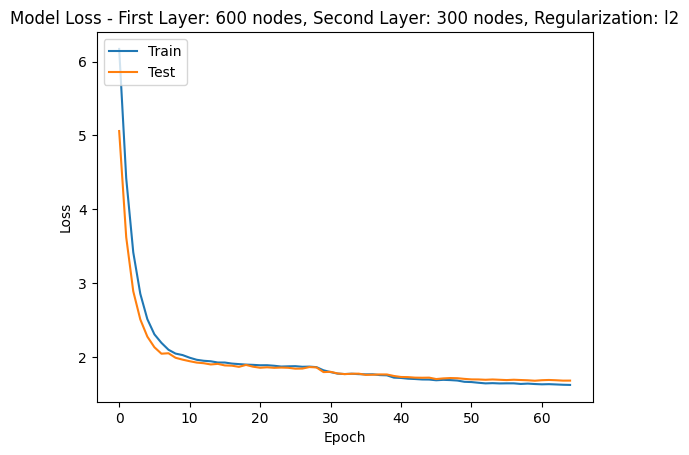

Testing model with first layer: 650 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1694 - loss: 43.2936 - val_accuracy: 0.1498 - val_loss: 9.8760 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2455 - loss: 7.6711 - val_accuracy: 0.1987 - val_loss: 4.9561 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2682 - loss: 4.3948 - val_accuracy: 0.2389 - val_loss: 3.0416 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2767 - loss: 2.7333 - val_accuracy: 0.2996 - val_loss: 2.2746 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2972 - loss: 2.2718 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2920, Train Precision = 0.3434, Train Recall = 0.3143, Train MSE = 5.9915, Train R² = 0.5938, Val Accuracy = 0.3245, Val Precision = 0.3526, Val Recall = 0.3245, Val MSE = 6.0475, Val R² = 0.5894
256/256 ━━━━━━━━━━━━━━━━━━━━ 2

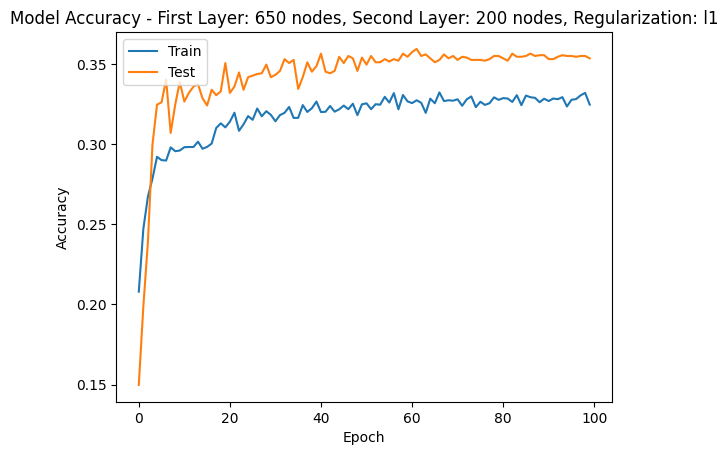

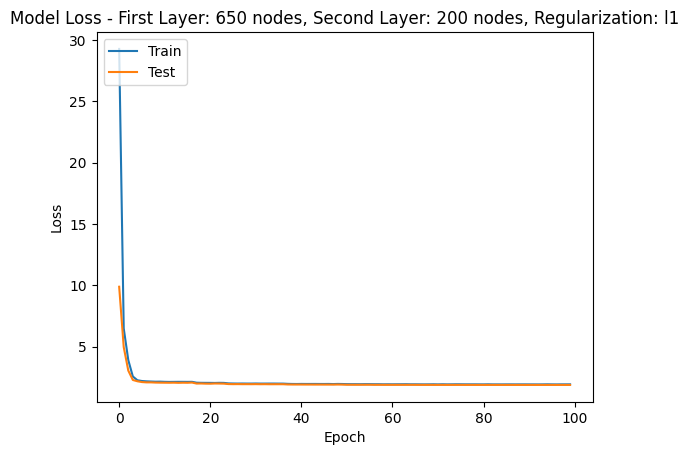

Testing model with first layer: 650 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1738 - loss: 6.0430 - val_accuracy: 0.2115 - val_loss: 4.4960 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2607 - loss: 4.3101 - val_accuracy: 0.2956 - val_loss: 3.3976 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2809 - loss: 3.4231 - val_accuracy: 0.3294 - val_loss: 2.7872 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2857 - loss: 2.8772 - val_accuracy: 0.3402 - val_loss: 2.4396 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   accuracy: 0.3074 - loss: 2.5162 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.3044, Train Precision = 0.3795, Train Recall = 0.3523, Train MSE = 4.9306, Train R² = 0.6658, Val Accuracy = 0.3328, Val Precision = 0.3525, Val Recall = 0.3328, Val MSE = 5.2364, Val R² = 0.6445
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 

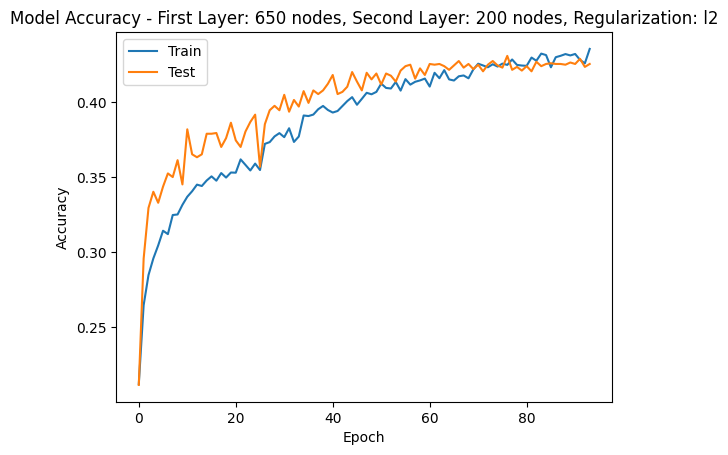

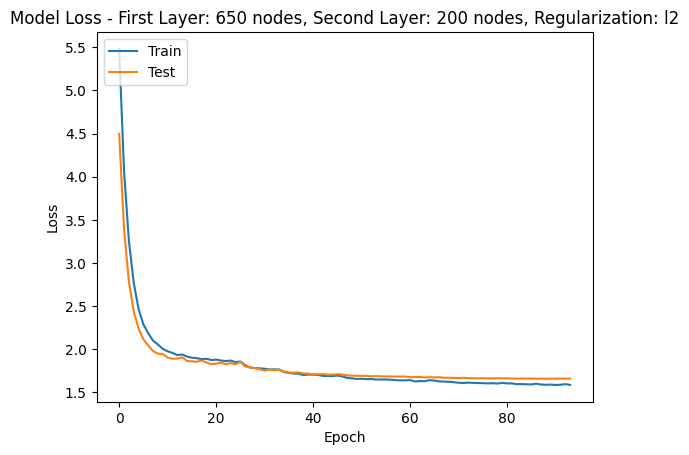

Testing model with first layer: 650 nodes, second layer: 250 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1779 - loss: 50.1444 - val_accuracy: 0.1326 - val_loss: 10.1697 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2438 - loss: 7.9803 - val_accuracy: 0.1747 - val_loss: 5.2662 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2584 - loss: 4.7721 - val_accuracy: 0.2384 - val_loss: 3.1874 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2789 - loss: 2.8192 - val_accuracy: 0.3108 - val_loss: 2.2663 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2847 - loss: 2.3161 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2912, Train Precision = 0.3762, Train Recall = 0.3125, Train MSE = 5.3128, Train R² = 0.6399, Val Accuracy = 0.3098, Val Precision = 0.3698, Val Recall = 0.3098, Val MSE = 5.3705, Val R² = 0.6354
256/256 ━━━━━━━━━━━━━━━━━━━━ 2

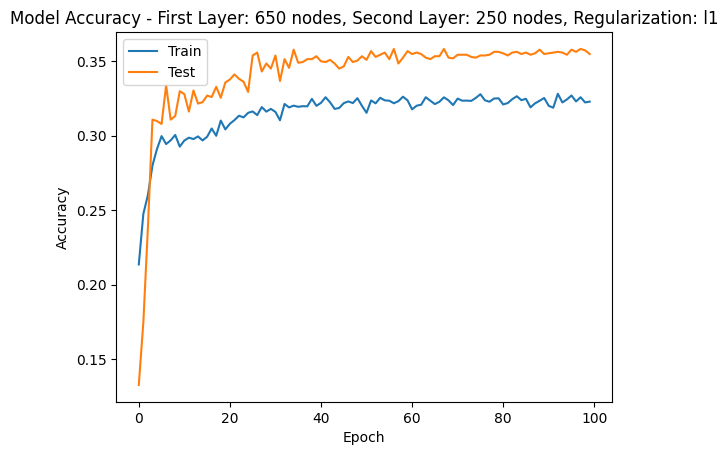

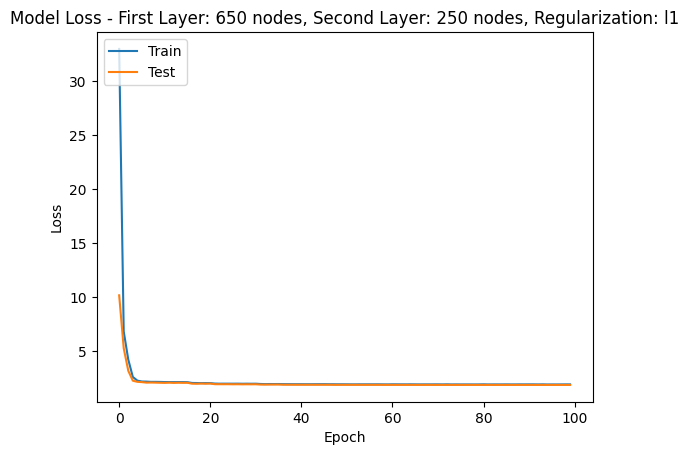

Testing model with first layer: 650 nodes, second layer: 250 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1806 - loss: 6.5402 - val_accuracy: 0.2697 - val_loss: 4.8673 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2575 - loss: 4.6355 - val_accuracy: 0.3108 - val_loss: 3.5545 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2792 - loss: 3.5743 - val_accuracy: 0.3270 - val_loss: 2.8684 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2952 - loss: 2.9217 - val_accuracy: 0.3421 - val_loss: 2.4739 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   accuracy: 0.3111 - loss: 2.5457 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.3052, Train Precision = 0.3655, Train Recall = 0.3643, Train MSE = 4.9329, Train R² = 0.6656, Val Accuracy = 0.3412, Val Precision = 0.3475, Val Recall = 0.3412, Val MSE = 5.1875, Val R² = 0.6478
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 

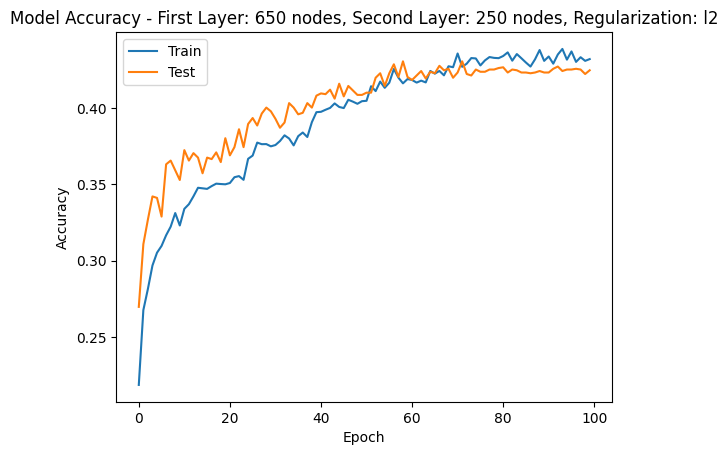

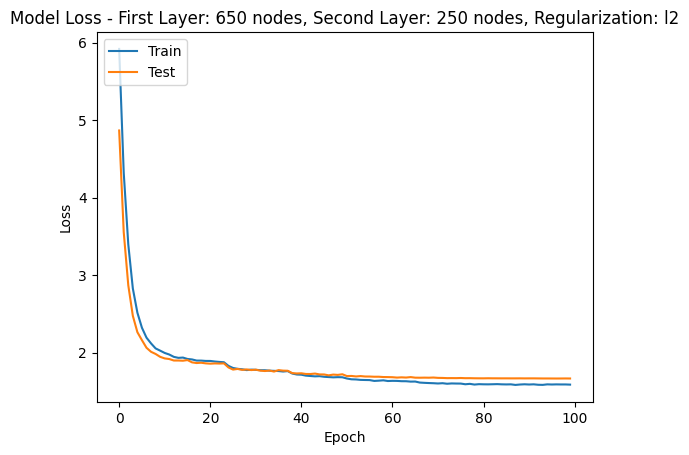

Testing model with first layer: 650 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1708 - loss: 56.7474 - val_accuracy: 0.2075 - val_loss: 10.5617 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2371 - loss: 8.4618 - val_accuracy: 0.2105 - val_loss: 5.6770 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2549 - loss: 5.0750 - val_accuracy: 0.2320 - val_loss: 3.2951 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2875 - loss: 2.8772 - val_accuracy: 0.2859 - val_loss: 2.2993 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2908 - loss: 2.3118 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2893, Train Precision = 0.3456, Train Recall = 0.3337, Train MSE = 5.4148, Train R² = 0.6329, Val Accuracy = 0.3387, Val Precision = 0.3642, Val Recall = 0.3387, Val MSE = 5.5086, Val R² = 0.6260
256/256 ━━━━━━━━━━━━━━━━━━━━ 2

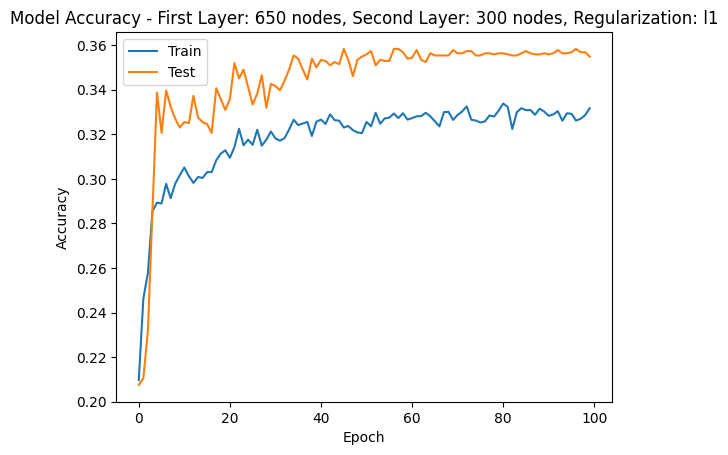

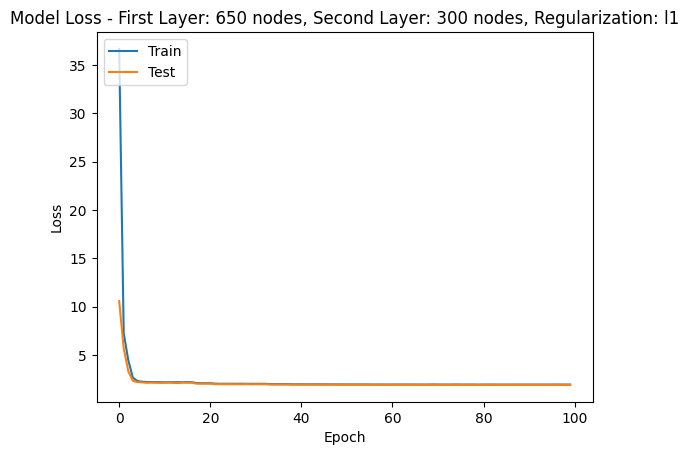

Testing model with first layer: 650 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1914 - loss: 6.9410 - val_accuracy: 0.2389 - val_loss: 5.0683 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2598 - loss: 4.8088 - val_accuracy: 0.2795 - val_loss: 3.6480 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2756 - loss: 3.6397 - val_accuracy: 0.3338 - val_loss: 2.8938 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2908 - loss: 2.9757 - val_accuracy: 0.3279 - val_loss: 2.5079 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2961 - loss: 2.5746 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2999, Train Precision = 0.3539, Train Recall = 0.3593, Train MSE = 4.9012, Train R² = 0.6678, Val Accuracy = 0.3417, Val Precision = 0.3755, Val Recall = 0.3417, Val MSE = 4.9794, Val R² = 0.6619
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

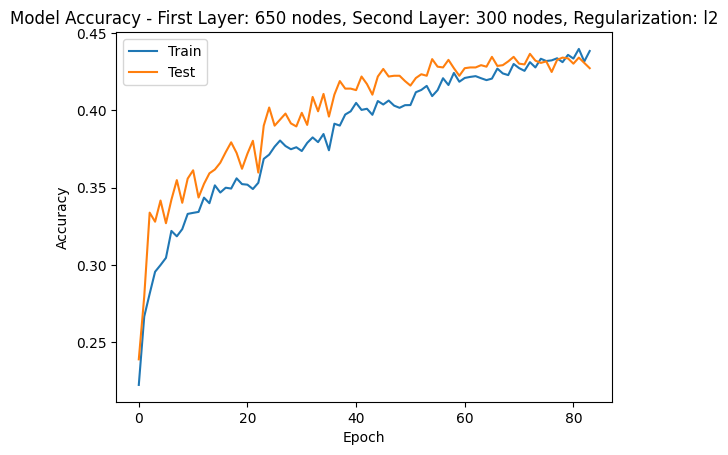

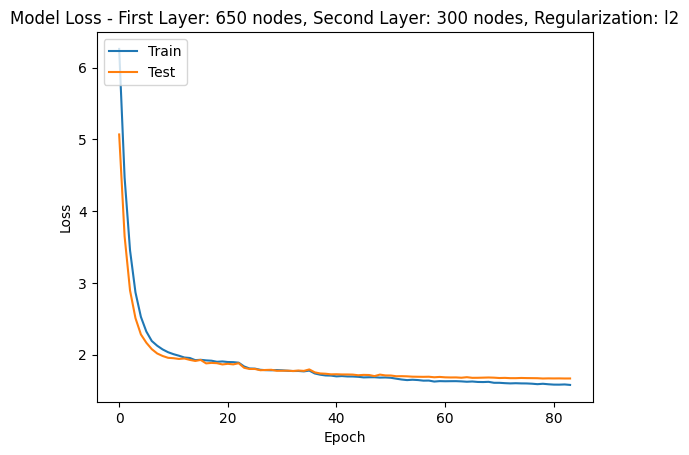

Testing model with first layer: 700 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1720 - loss: 44.7323 - val_accuracy: 0.1194 - val_loss: 9.6759 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2478 - loss: 7.5374 - val_accuracy: 0.1498 - val_loss: 4.9550 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2553 - loss: 4.4271 - val_accuracy: 0.2462 - val_loss: 3.0208 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2825 - loss: 2.7237 - val_accuracy: 0.3015 - val_loss: 2.2450 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2861 - loss: 2.2658 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2844, Train Precision = 0.3565, Train Recall = 0.3122, Train MSE = 5.6204, Train R² = 0.6190, Val Accuracy = 0.3133, Val Precision = 0.4002, Val Recall = 0.3133, Val MSE = 5.6163, Val R² = 0.6187
256/256 ━━━━━━━━━━━━━━━━━━━━ 2

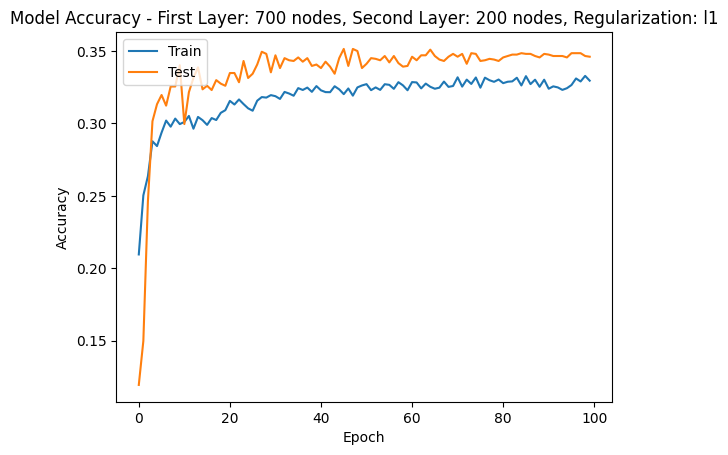

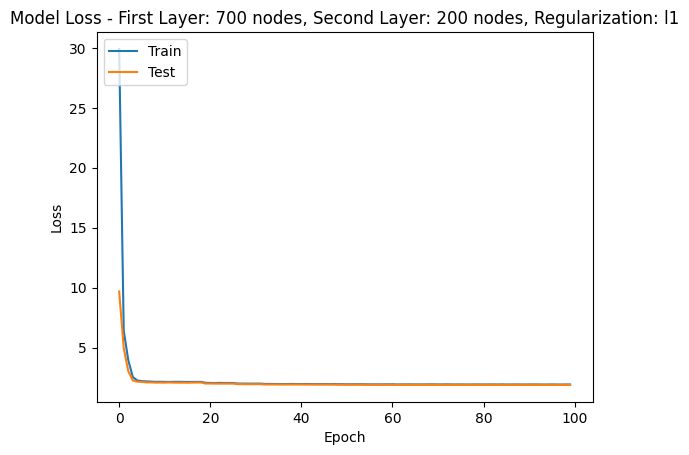

Testing model with first layer: 700 nodes, second layer: 200 nodes, regularization: l2...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1744 - loss: 6.0852 - val_accuracy: 0.2482 - val_loss: 4.5136 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2617 - loss: 4.2982 - val_accuracy: 0.3098 - val_loss: 3.3607 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2882 - loss: 3.3757 - val_accuracy: 0.3098 - val_loss: 2.7629 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2922 - loss: 2.8424 - val_accuracy: 0.3475 - val_loss: 2.4191 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2910 - loss: 2.5131 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2982, Train Precision = 0.3730, Train Recall = 0.3483, Train MSE = 4.8353, Train R² = 0.6722, Val Accuracy = 0.3495, Val Precision = 0.4136, Val Recall = 0.3495, Val MSE = 4.9041, Val R² = 0.6671
256/256 ━━━━━━━━━━━━

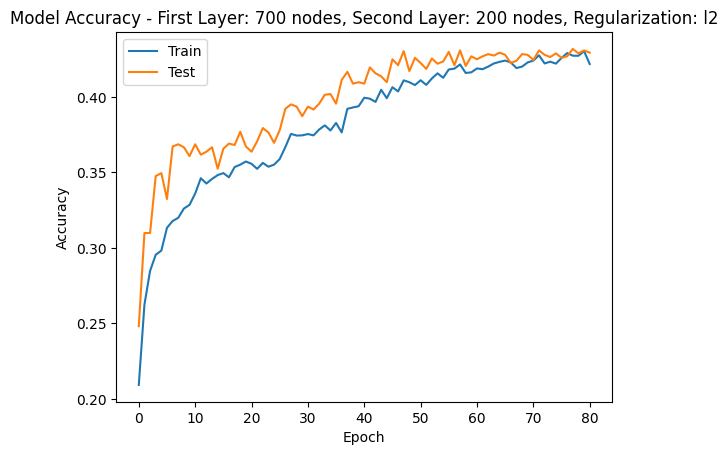

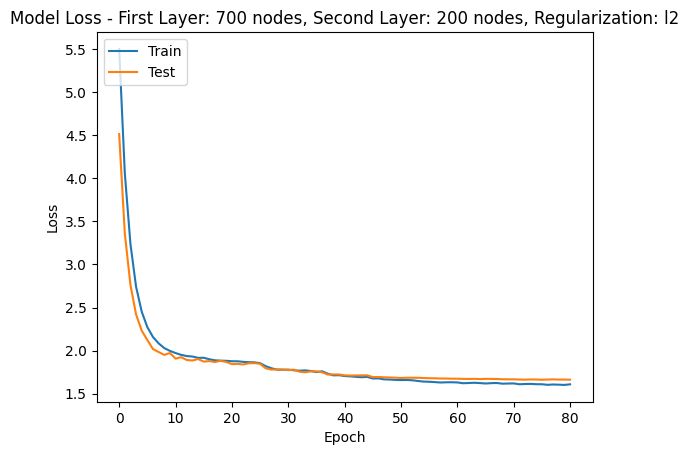

Testing model with first layer: 700 nodes, second layer: 250 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1796 - loss: 51.8018 - val_accuracy: 0.1811 - val_loss: 9.6767 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2486 - loss: 7.8061 - val_accuracy: 0.1982 - val_loss: 5.2411 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2530 - loss: 4.7260 - val_accuracy: 0.2580 - val_loss: 3.0828 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2766 - loss: 2.7179 - val_accuracy: 0.3157 - val_loss: 2.2384 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2962 - loss: 2.2721 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2913, Train Precision = 0.3815, Train Recall = 0.3241, Train MSE = 5.4329, Train R² = 0.6317, Val Accuracy = 0.3221, Val Precision = 0.4001, Val Recall = 0.3221, Val MSE = 5.5996, Val R² = 0.6198
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s

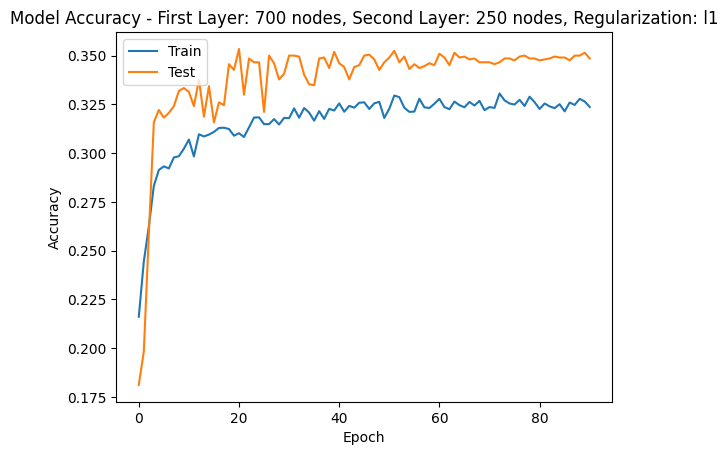

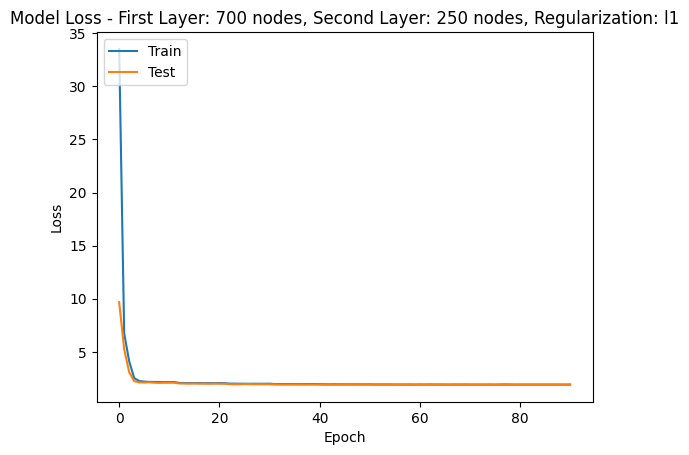

Testing model with first layer: 700 nodes, second layer: 250 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1865 - loss: 6.5457 - val_accuracy: 0.2173 - val_loss: 4.8655 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2563 - loss: 4.5660 - val_accuracy: 0.2986 - val_loss: 3.5019 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2800 - loss: 3.5089 - val_accuracy: 0.3245 - val_loss: 2.7978 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2927 - loss: 2.8812 - val_accuracy: 0.3446 - val_loss: 2.4361 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3114 - loss: 2.5047 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.3118, Train Precision = 0.3628, Train Recall = 0.3574, Train MSE = 5.0529, Train R² = 0.6575, Val Accuracy = 0.3328, Val Precision = 0.3651, Val Recall = 0.3328, Val MSE = 5.3651, Val R² = 0.6358
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 

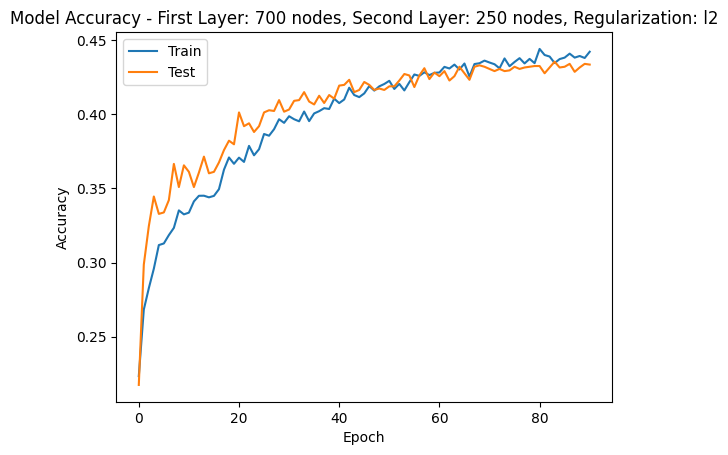

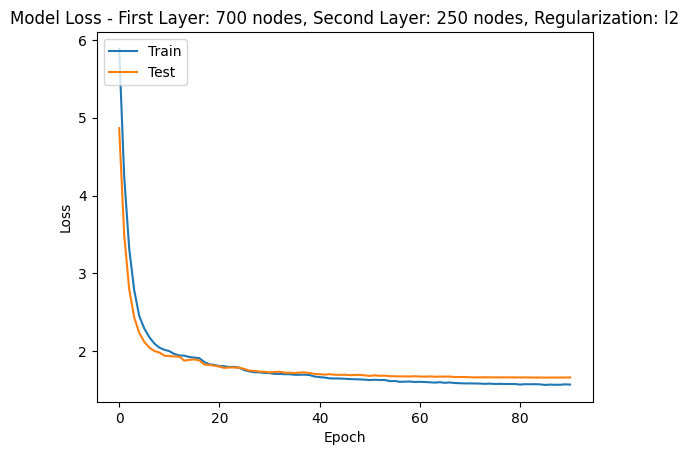

Testing model with first layer: 700 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1833 - loss: 57.8436 - val_accuracy: 0.1517 - val_loss: 9.8335 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2446 - loss: 8.0441 - val_accuracy: 0.1684 - val_loss: 5.3924 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2538 - loss: 4.7792 - val_accuracy: 0.2428 - val_loss: 3.0106 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2782 - loss: 2.6687 - val_accuracy: 0.3255 - val_loss: 2.2438 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2869 - loss: 2.2835
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2888, Train Precision = 0.3626, Train Recall = 0.3142, Train MSE = 5.5395, Train R² = 0.6245, Val Accuracy = 0.3167, Val Precision = 0.3640, Val Recall = 0.3167, Val MSE = 5.4812, Val R² = 0.6279
256/256 ━━━━━━━━━━━━━━━━━━━━ 5

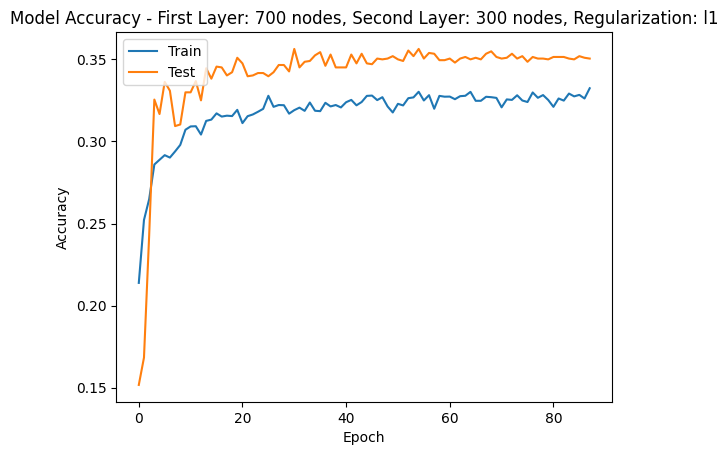

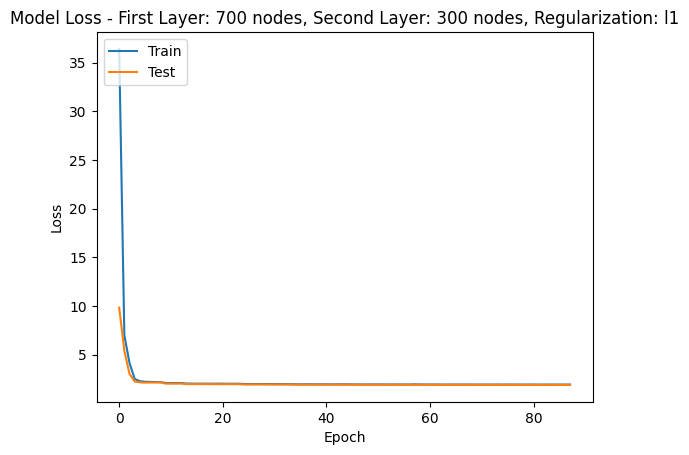

Testing model with first layer: 700 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1828 - loss: 7.0249 - val_accuracy: 0.2036 - val_loss: 5.1695 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2609 - loss: 4.7896 - val_accuracy: 0.3226 - val_loss: 3.6290 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2871 - loss: 3.6246 - val_accuracy: 0.3206 - val_loss: 2.8870 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2915 - loss: 2.9500 - val_accuracy: 0.3319 - val_loss: 2.4729 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3059 - loss: 2.5786 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3027, Train Precision = 0.3735, Train Recall = 0.3528, Train MSE = 4.8793, Train R² = 0.6692, Val Accuracy = 0.3407, Val Precision = 0.3560, Val Recall = 0.3407, Val MSE = 4.9545, Val R² = 0.6636
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 

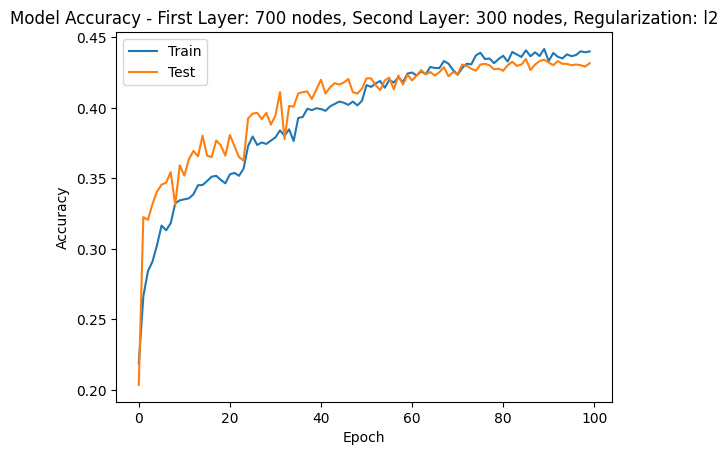

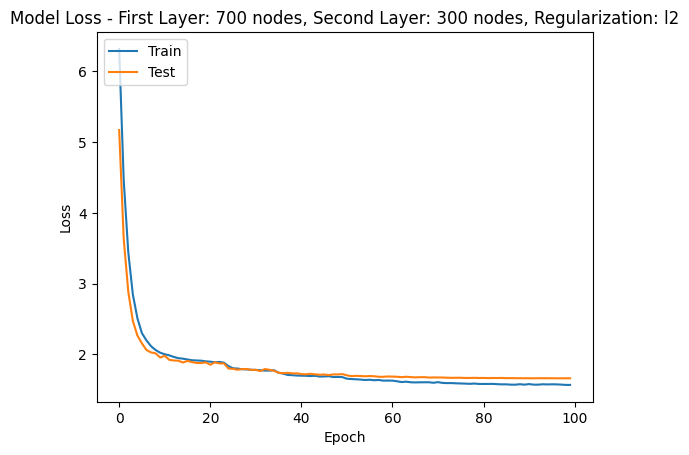

Testing model with first layer: 750 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1780 - loss: 45.8083 - val_accuracy: 0.1517 - val_loss: 9.3403 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2486 - loss: 7.3523 - val_accuracy: 0.1728 - val_loss: 4.8192 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2612 - loss: 4.1877 - val_accuracy: 0.2438 - val_loss: 2.7735 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2855 - loss: 2.5534 - val_accuracy: 0.3123 - val_loss: 2.2417 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2861 - loss: 2.2456 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2863, Train Precision = 0.3494, Train Recall = 0.3247, Train MSE = 6.2538, Train R² = 0.5761, Val Accuracy = 0.3221, Val Precision = 0.3871, Val Recall = 0.3221, Val MSE = 6.2873, Val R² = 0.5731
256/256 ━━━━━━━━━━━━━━━━━━━━ 2

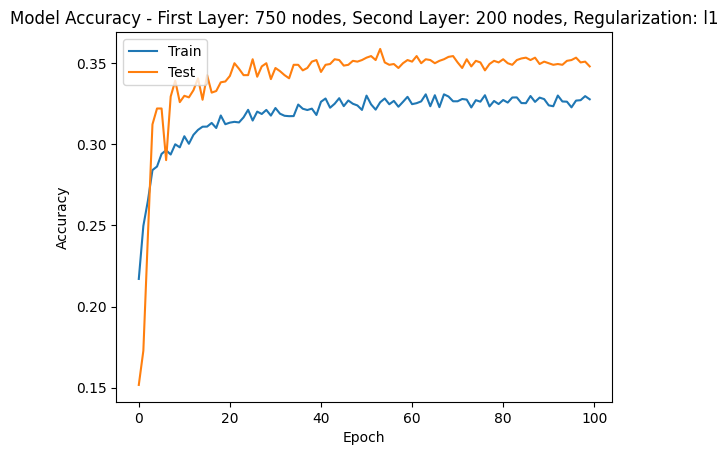

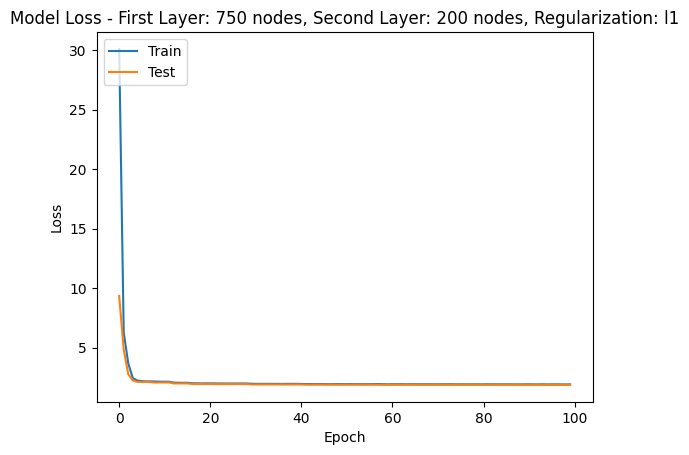

Testing model with first layer: 750 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1740 - loss: 6.1856 - val_accuracy: 0.2516 - val_loss: 4.5623 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2602 - loss: 4.3339 - val_accuracy: 0.3054 - val_loss: 3.3717 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2758 - loss: 3.3876 - val_accuracy: 0.3314 - val_loss: 2.7417 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2880 - loss: 2.8462 - val_accuracy: 0.3275 - val_loss: 2.4162 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3102 - loss: 2.4935 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.3077, Train Precision = 0.3632, Train Recall = 0.3595, Train MSE = 5.2059, Train R² = 0.6471, Val Accuracy = 0.3407, Val Precision = 0.3479, Val Recall = 0.3407, Val MSE = 5.3221, Val R² = 0.6387
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

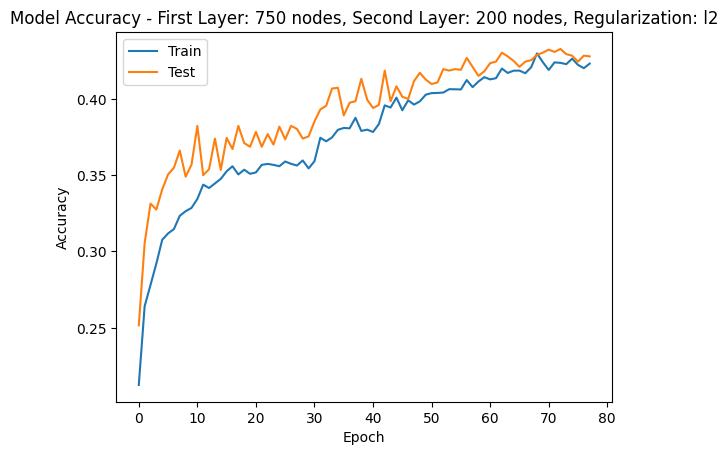

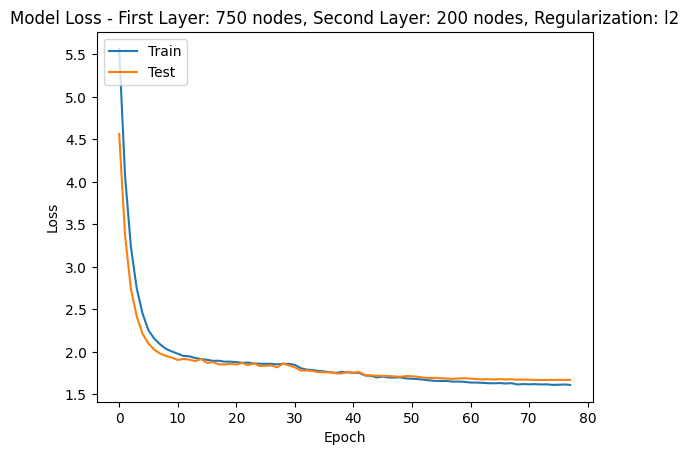

Testing model with first layer: 750 nodes, second layer: 250 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1750 - loss: 52.9987 - val_accuracy: 0.1527 - val_loss: 9.3290 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2487 - loss: 7.6256 - val_accuracy: 0.1464 - val_loss: 5.0369 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2608 - loss: 4.4399 - val_accuracy: 0.2677 - val_loss: 2.8370 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2847 - loss: 2.5953 - val_accuracy: 0.2912 - val_loss: 2.2489 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2911 - loss: 2.2749 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2915, Train Precision = 0.3843, Train Recall = 0.3170, Train MSE = 6.3260, Train R² = 0.5712, Val Accuracy = 0.3245, Val Precision = 0.3923, Val Recall = 0.3245, Val MSE = 6.5257, Val R² = 0.5570
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

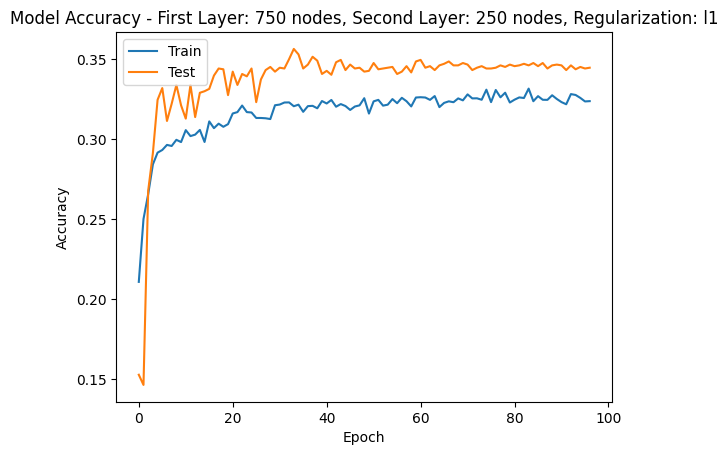

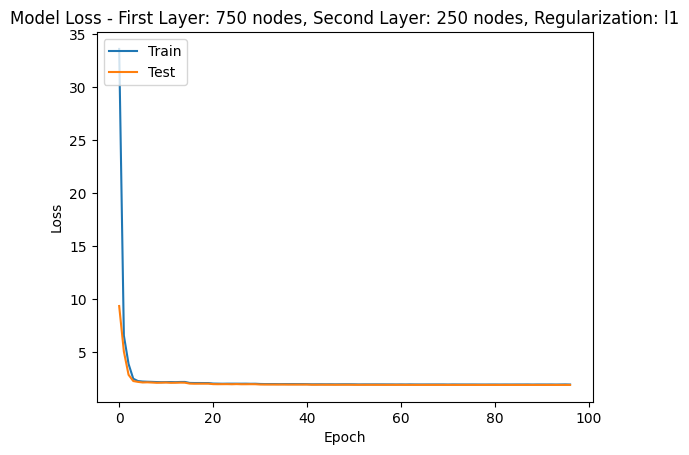

Testing model with first layer: 750 nodes, second layer: 250 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1868 - loss: 6.6474 - val_accuracy: 0.1738 - val_loss: 5.0318 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2591 - loss: 4.6303 - val_accuracy: 0.2893 - val_loss: 3.5645 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2826 - loss: 3.5369 - val_accuracy: 0.3157 - val_loss: 2.8500 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2932 - loss: 2.8937 - val_accuracy: 0.3480 - val_loss: 2.4646 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3003 - loss: 2.5506 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3046, Train Precision = 0.3702, Train Recall = 0.3604, Train MSE = 4.9479, Train R² = 0.6646, Val Accuracy = 0.3392, Val Precision = 0.3832, Val Recall = 0.3392, Val MSE = 5.0945, Val R² = 0.6541
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 

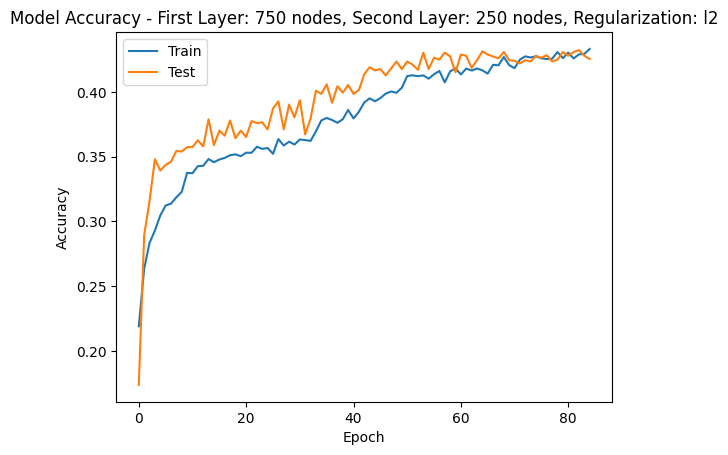

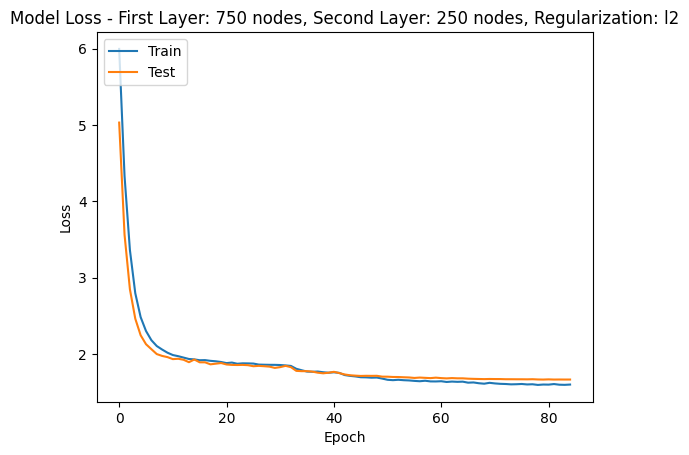

Testing model with first layer: 750 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1836 - loss: 60.0111 - val_accuracy: 0.1390 - val_loss: 9.7073 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2363 - loss: 8.0137 - val_accuracy: 0.1992 - val_loss: 5.3513 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2618 - loss: 4.6243 - val_accuracy: 0.2467 - val_loss: 2.8614 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2834 - loss: 2.5929 - val_accuracy: 0.3128 - val_loss: 2.2227 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2903 - loss: 2.2810 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2934, Train Precision = 0.3586, Train Recall = 0.3214, Train MSE = 6.1386, Train R² = 0.5839, Val Accuracy = 0.3138, Val Precision = 0.3711, Val Recall = 0.3138, Val MSE = 6.3412, Val R² = 0.5695
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

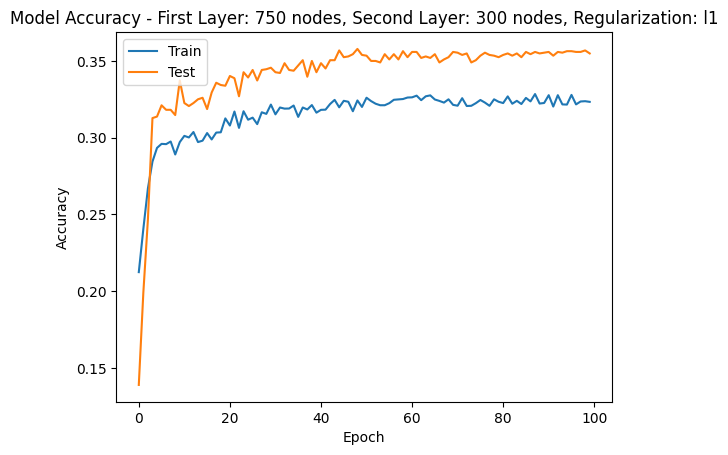

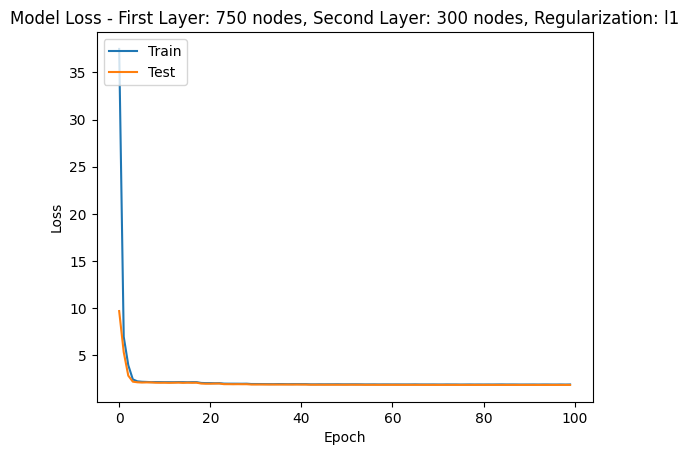

Testing model with first layer: 750 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1839 - loss: 7.1498 - val_accuracy: 0.2697 - val_loss: 5.1770 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2614 - loss: 4.8889 - val_accuracy: 0.2956 - val_loss: 3.6797 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2776 - loss: 3.6958 - val_accuracy: 0.3348 - val_loss: 2.8950 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2937 - loss: 2.9625 - val_accuracy: 0.3402 - val_loss: 2.4860 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   accuracy: 0.2996 - loss: 2.5734 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2989, Train Precision = 0.3769, Train Recall = 0.3516, Train MSE = 5.0184, Train R² = 0.6598, Val Accuracy = 0.3441, Val Precision = 0.3763, Val Recall = 0.3441, Val MSE = 5.4376, Val R² = 0.6308
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 

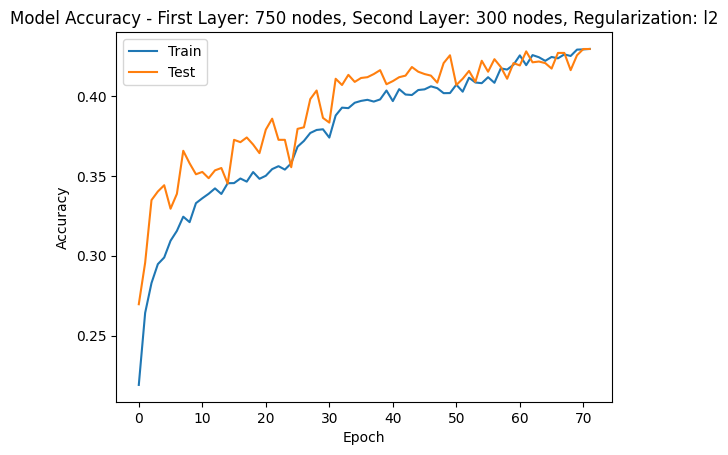

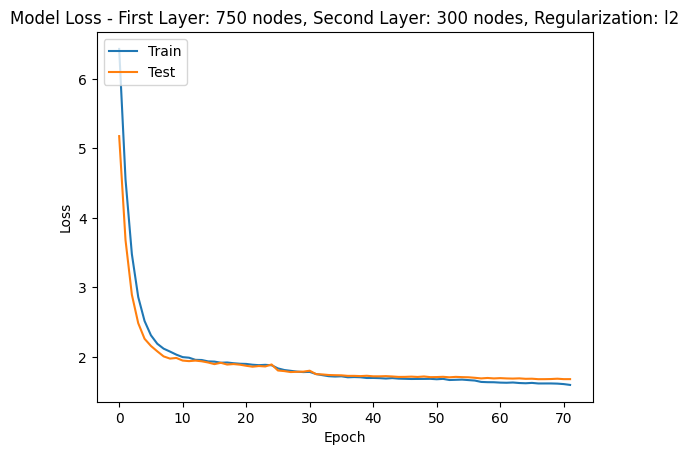

Testing model with first layer: 800 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1767 - loss: 47.0421 - val_accuracy: 0.1508 - val_loss: 9.0511 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2488 - loss: 7.2437 - val_accuracy: 0.1674 - val_loss: 4.7633 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2599 - loss: 4.1728 - val_accuracy: 0.2252 - val_loss: 2.8518 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2835 - loss: 2.5787 - val_accuracy: 0.2986 - val_loss: 2.2148 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2789 - loss: 2.2754 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2893, Train Precision = 0.3499, Train Recall = 0.3271, Train MSE = 5.4542, Train R² = 0.6303, Val Accuracy = 0.3294, Val Precision = 0.3808, Val Recall = 0.3294, Val MSE = 5.6260, Val R² = 0.6180
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s

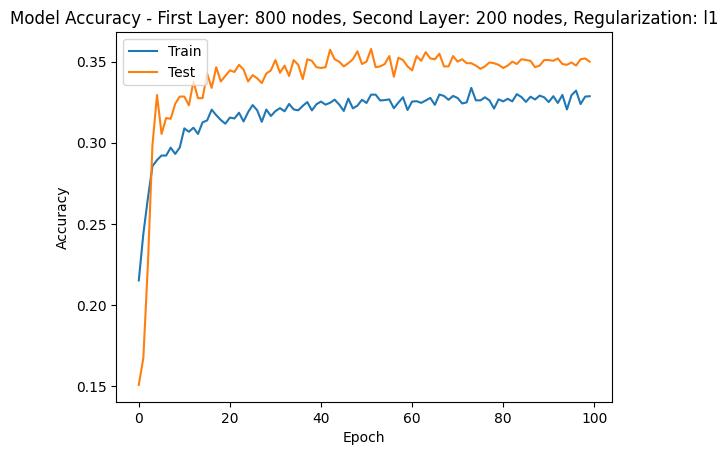

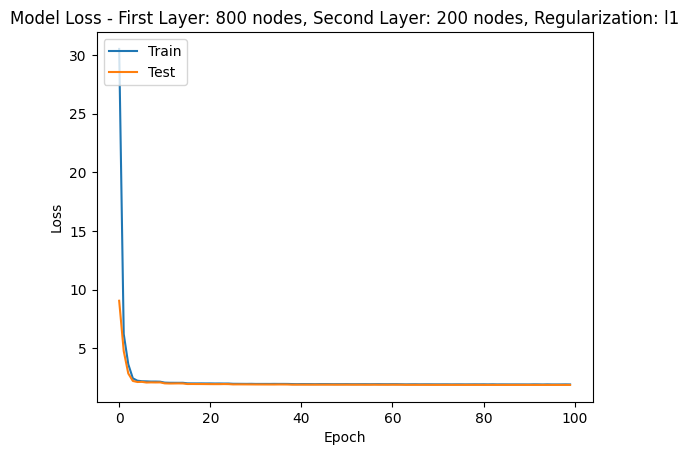

Testing model with first layer: 800 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1758 - loss: 6.1860 - val_accuracy: 0.2677 - val_loss: 4.6170 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2537 - loss: 4.3442 - val_accuracy: 0.3064 - val_loss: 3.3636 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2771 - loss: 3.3695 - val_accuracy: 0.3279 - val_loss: 2.7353 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2871 - loss: 2.8252 - val_accuracy: 0.3348 - val_loss: 2.4086 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3026 - loss: 2.4829 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3045, Train Precision = 0.3669, Train Recall = 0.3543, Train MSE = 5.0827, Train R² = 0.6554, Val Accuracy = 0.3431, Val Precision = 0.3715, Val Recall = 0.3431, Val MSE = 5.4665, Val R² = 0.6289
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 

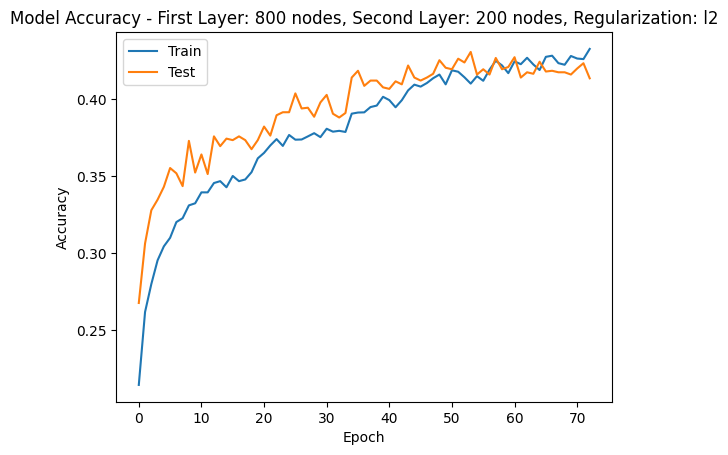

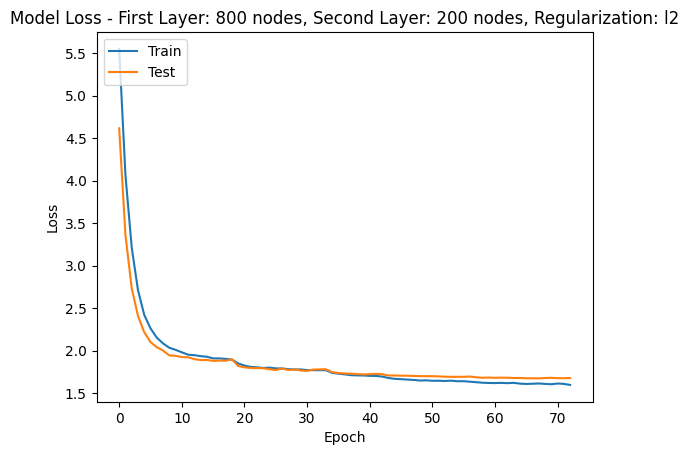

Testing model with first layer: 800 nodes, second layer: 250 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1833 - loss: 54.3978 - val_accuracy: 0.1356 - val_loss: 9.3547 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2522 - loss: 7.6773 - val_accuracy: 0.2066 - val_loss: 5.0602 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2629 - loss: 4.3631 - val_accuracy: 0.2506 - val_loss: 2.7686 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2742 - loss: 2.5244 - val_accuracy: 0.3172 - val_loss: 2.2490 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2986 - loss: 2.2502
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2907, Train Precision = 0.3401, Train Recall = 0.3235, Train MSE = 6.4919, Train R² = 0.5599, Val Accuracy = 0.3191, Val Precision = 0.3580, Val Recall = 0.3191, Val MSE = 6.5125, Val R² = 0.5579
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 

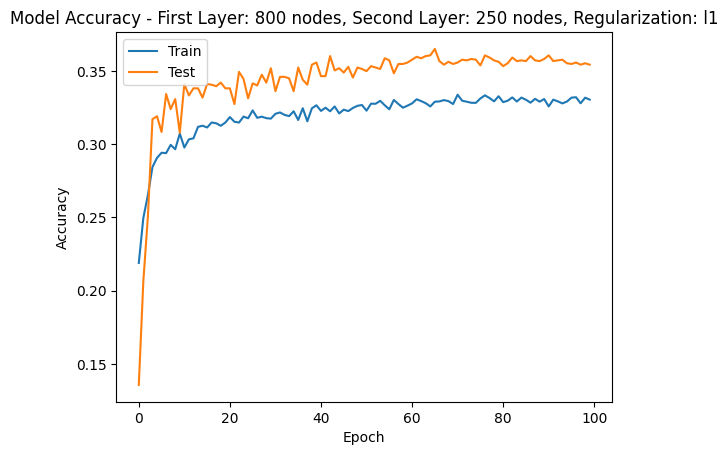

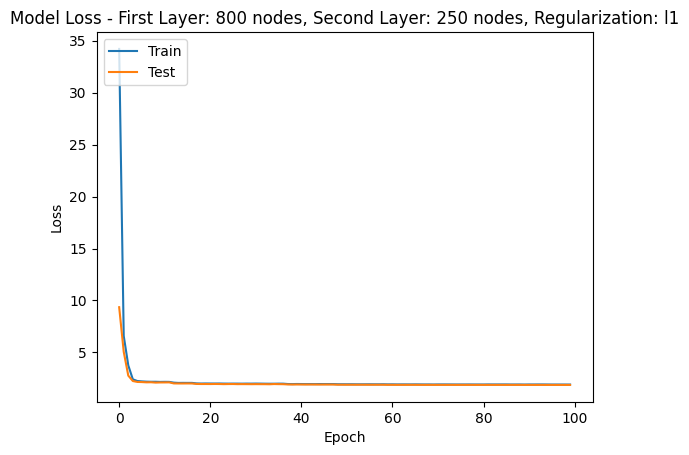

Testing model with first layer: 800 nodes, second layer: 250 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1933 - loss: 6.5837 - val_accuracy: 0.1929 - val_loss: 4.8309 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2645 - loss: 4.5538 - val_accuracy: 0.2952 - val_loss: 3.4669 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2892 - loss: 3.4478 - val_accuracy: 0.3079 - val_loss: 2.7767 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2933 - loss: 2.8327 - val_accuracy: 0.3314 - val_loss: 2.4039 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3046 - loss: 2.5044 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3088, Train Precision = 0.3544, Train Recall = 0.3449, Train MSE = 4.8987, Train R² = 0.6679, Val Accuracy = 0.3338, Val Precision = 0.3332, Val Recall = 0.3338, Val MSE = 5.1728, Val R² = 0.6488
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 

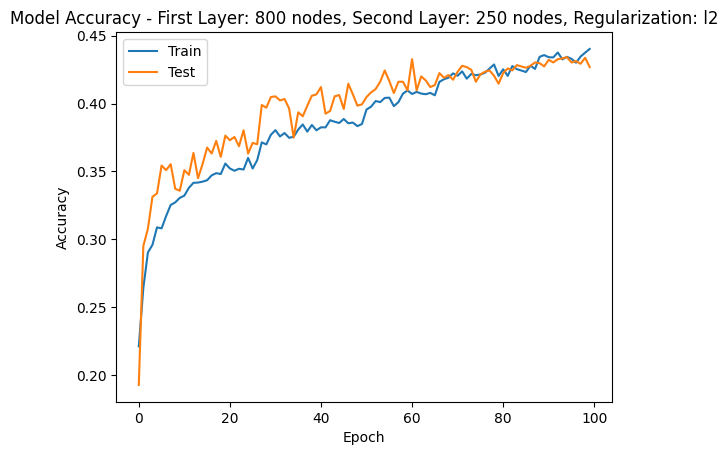

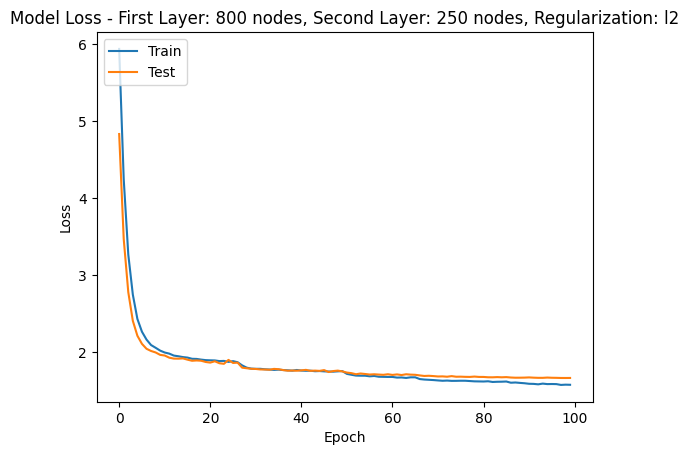

Testing model with first layer: 800 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1706 - loss: 61.6728 - val_accuracy: 0.1454 - val_loss: 9.2208 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2442 - loss: 7.8443 - val_accuracy: 0.1694 - val_loss: 5.3107 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2562 - loss: 4.6005 - val_accuracy: 0.2496 - val_loss: 2.8294 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2844 - loss: 2.5569 - val_accuracy: 0.3186 - val_loss: 2.2300 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2884 - loss: 2.2828
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2901, Train Precision = 0.3492, Train Recall = 0.3083, Train MSE = 5.8356, Train R² = 0.6044, Val Accuracy = 0.3172, Val Precision = 0.3512, Val Recall = 0.3172, Val MSE = 5.8125, Val R² = 0.6054
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 

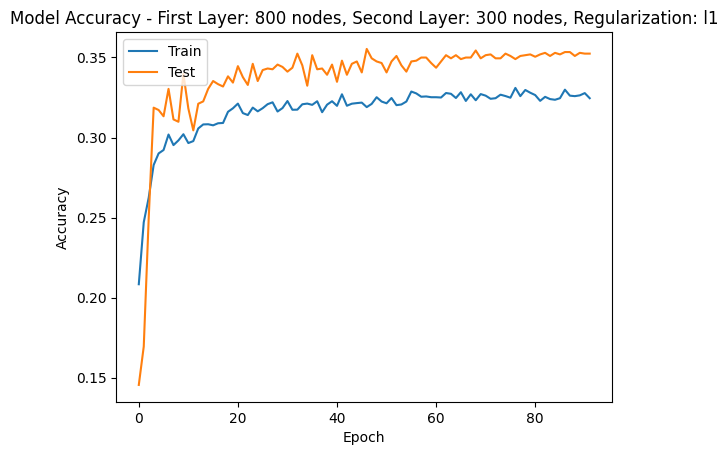

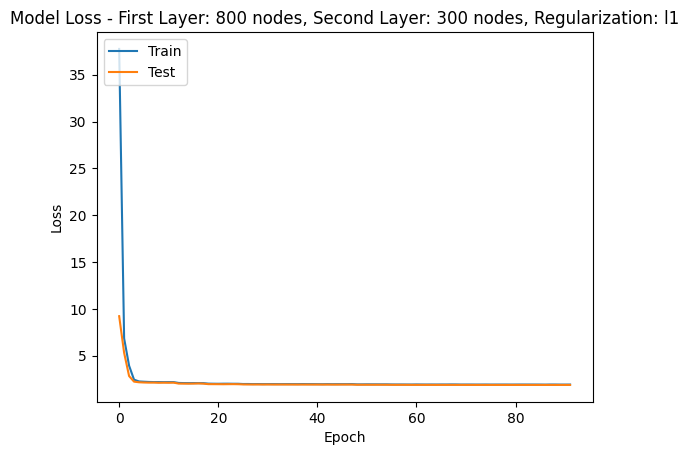

Testing model with first layer: 800 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1904 - loss: 7.1296 - val_accuracy: 0.2349 - val_loss: 5.0700 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2716 - loss: 4.8006 - val_accuracy: 0.2996 - val_loss: 3.6009 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2927 - loss: 3.5573 - val_accuracy: 0.3372 - val_loss: 2.8406 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2949 - loss: 2.9143 - val_accuracy: 0.3299 - val_loss: 2.4684 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2961 - loss: 2.5390
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.3005, Train Precision = 0.3614, Train Recall = 0.3620, Train MSE = 4.8347, Train R² = 0.6723, Val Accuracy = 0.3505, Val Precision = 0.3436, Val Recall = 0.3505, Val MSE = 4.9824, Val R² = 0.6617
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9

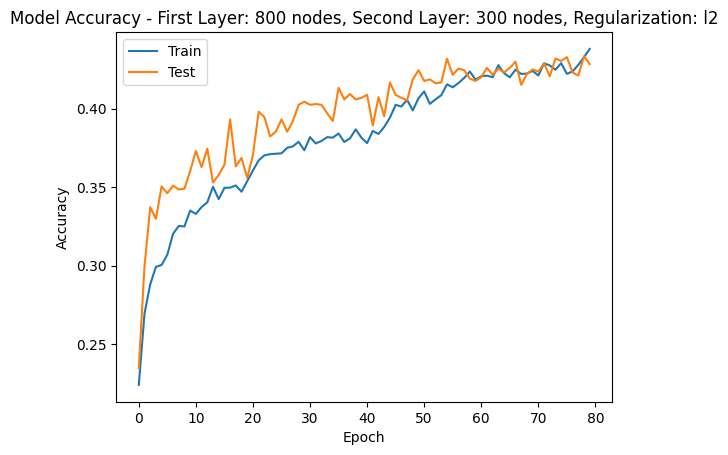

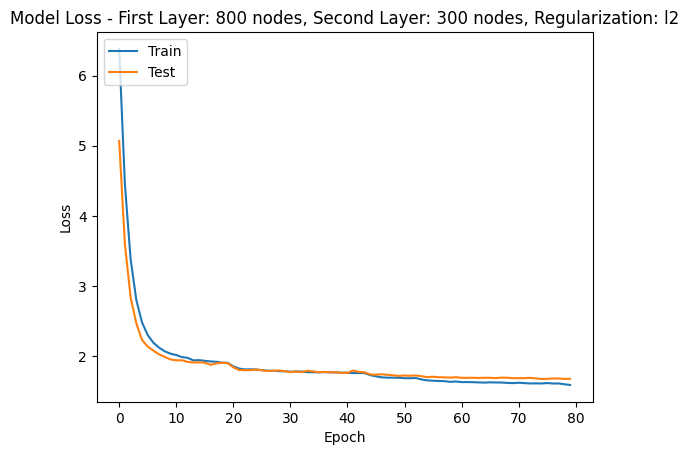


Best model found with first layer: 600 nodes, second layer: 200 nodes, regularization: l2
Best Test Accuracy: 0.4356


In [8]:
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

first_layer_nodes = [500, 550, 600, 650, 700, 750, 800]
second_layer_nodes = [200, 250, 300]
regularization_types = ['l1', 'l2']
best_accuracy = 0
best_params = None
results = []

class PrintEpochs(Callback):
    def __init__(self, interval=5):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        # Only print every 5 epochs
        if (epoch + 1) % self.interval == 0:
            y_train_pred = np.argmax(self.model.predict(X_train_scaled), axis=1)
            y_val_pred = np.argmax(self.model.predict(X_test_scaled), axis=1)

            train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
            train_recall = recall_score(y_train, y_train_pred, average='weighted')
            val_precision = precision_score(y_test, y_val_pred, average='weighted', zero_division=1)
            val_recall = recall_score(y_test, y_val_pred, average='weighted')

            train_mse = mean_squared_error(y_train, y_train_pred)
            val_mse = mean_squared_error(y_test, y_val_pred)
            train_r2 = r2_score(y_train, y_train_pred)
            val_r2 = r2_score(y_test, y_val_pred)

            print(f"Epoch {epoch+1}: "
                  f"Train Accuracy = {logs['accuracy']:.4f}, "
                  f"Train Precision = {train_precision:.4f}, "
                  f"Train Recall = {train_recall:.4f}, "
                  f"Train MSE = {train_mse:.4f}, "
                  f"Train R² = {train_r2:.4f}, "
                  f"Val Accuracy = {logs['val_accuracy']:.4f}, "
                  f"Val Precision = {val_precision:.4f}, "
                  f"Val Recall = {val_recall:.4f}, "
                  f"Val MSE = {val_mse:.4f}, "
                  f"Val R² = {val_r2:.4f}")

for first_layer in first_layer_nodes:
    for second_layer in second_layer_nodes:
        for regularization_type in regularization_types:
            print(f"Testing model with first layer: {first_layer} nodes, second layer: {second_layer} nodes, regularization: {regularization_type}...")
            
            if regularization_type == 'l1':
                regularizer = regularizers.l1(0.01)
            elif regularization_type == 'l2':
                regularizer = regularizers.l2(0.01)

            model = models.Sequential([
                layers.Dense(first_layer, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
                layers.BatchNormalization(),
                layers.Dropout(0.4),

                layers.Dense(second_layer, activation='relu', kernel_regularizer=regularizer), 
                layers.BatchNormalization(),
                layers.Dropout(0.4),
                layers.Dense(17, activation='softmax')
            ])

            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Adam optimizer with a lower initial learning rate
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
            print_epochs = PrintEpochs(interval=5)

            # Train the model with callbacks
            history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test), 
                                callbacks=[early_stopping, reduce_lr, print_epochs])

            test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
            print(f"Test Accuracy: {test_accuracy:.4f}")
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_params = (first_layer, second_layer, regularization_type)
                
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title(f'Model Accuracy - First Layer: {first_layer} nodes, Second Layer: {second_layer} nodes, Regularization: {regularization_type}')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend(['Train', 'Test'], loc='upper left')
            plt.show()

            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title(f'Model Loss - First Layer: {first_layer} nodes, Second Layer: {second_layer} nodes, Regularization: {regularization_type}')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend(['Train', 'Test'], loc='upper left')
            plt.show()

# Print the best model parameters and accuracy
print(f"\nBest model found with first layer: {best_params[0]} nodes, second layer: {best_params[1]} nodes, regularization: {best_params[2]}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

results_df = pd.DataFrame(results)
results_df.to_csv("model_performance_report.csv", index=False)



Testing model with first layer: 100 nodes, second layer: 100 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1085 - loss: 18.8795 - val_accuracy: 0.2345 - val_loss: 12.4567 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2193 - loss: 11.2058 - val_accuracy: 0.2413 - val_loss: 7.3530 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2556 - loss: 6.6246 - val_accuracy: 0.2423 - val_loss: 4.7126 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2625 - loss: 4.4418 - val_accuracy: 0.2570 - val_loss: 3.5507 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step accuracy: 0.2662 - loss: 3.4576 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2718, Train Precision = 0.3642, Train Recall = 0.2637, Train Loss = 3.2971, Train MSE = 7.0692, Train R² = 0.5208, Val Accuracy = 0.2663, Val Precision = 0.4037, Val Recall = 0.2663, Val Loss = 3.0265, Val MSE = 6.8698, Val 

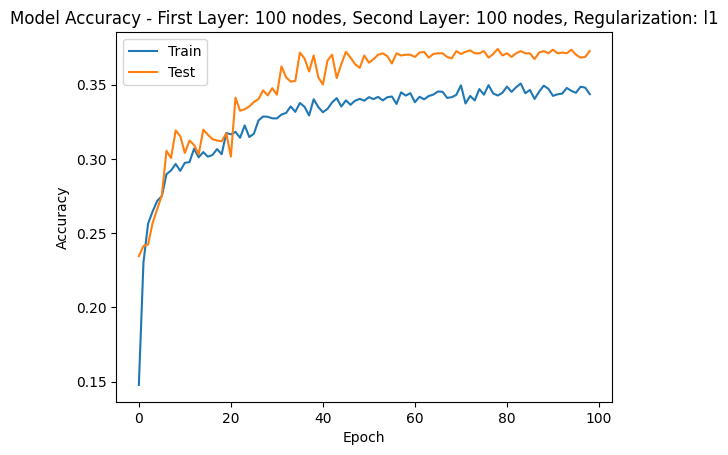

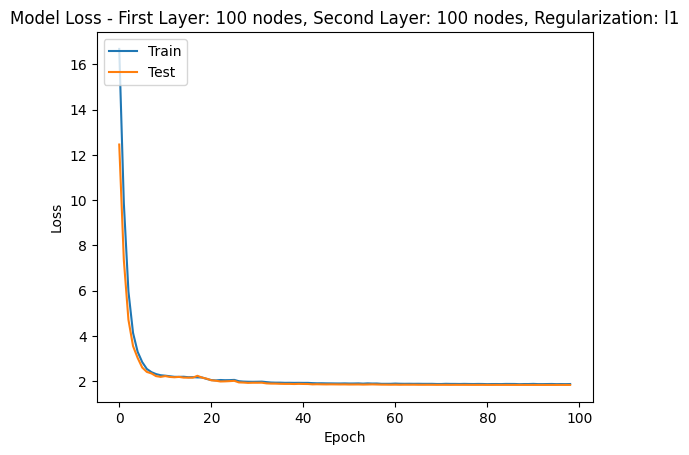

Testing model with first layer: 100 nodes, second layer: 100 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1123 - loss: 5.2788 - val_accuracy: 0.2599 - val_loss: 3.9926 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2214 - loss: 4.0896 - val_accuracy: 0.2677 - val_loss: 3.4292 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2516 - loss: 3.5081 - val_accuracy: 0.2775 - val_loss: 3.0881 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2697 - loss: 3.1481 - val_accuracy: 0.3000 - val_loss: 2.8057 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step accuracy: 0.2878 - loss: 2.8546 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
Epoch 5: Train Accuracy = 0.2852, Train Precision = 0.3902, Train Recall = 0.3391, Train Loss = 2.8047, Train MSE = 5.8109, Train R² = 0.6061, Val Accuracy = 0.3162, Val Precision = 0.4070, Val Recall = 0.3162, Val Loss = 2.5918, Val MSE = 5.8541, Val R² 

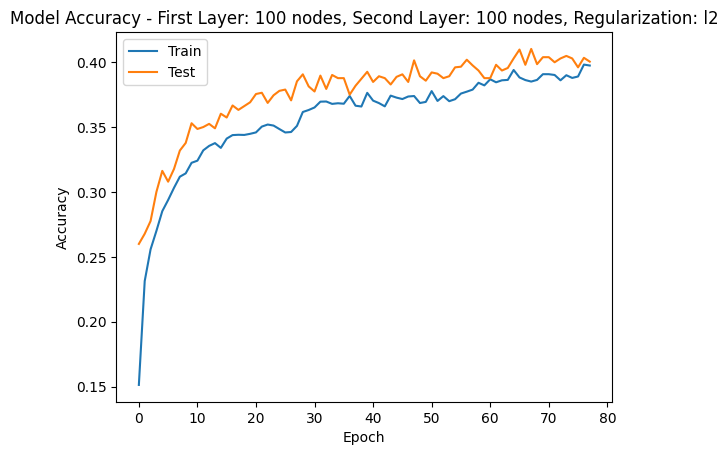

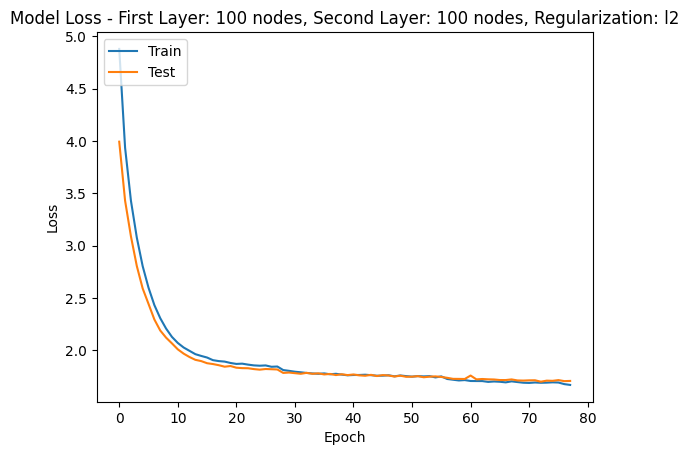

Testing model with first layer: 100 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1273 - loss: 22.9760 - val_accuracy: 0.2119 - val_loss: 13.7341 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2348 - loss: 11.9941 - val_accuracy: 0.2271 - val_loss: 7.3540 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2475 - loss: 6.5979 - val_accuracy: 0.2575 - val_loss: 4.7116 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2588 - loss: 4.4989 - val_accuracy: 0.2359 - val_loss: 3.6564 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step accuracy: 0.2757 - loss: 3.5225 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
Epoch 5: Train Accuracy = 0.2785, Train Precision = 0.2826, Train Recall = 0.2615, Train Loss = 3.3365, Train MSE = 6.4534, Train R² = 0.5625, Val Accuracy = 0.2472, Val Precision = 0.3331, Val Recall = 0.2472, Val Loss = 3.0334, Val MSE = 6.4846, Val 

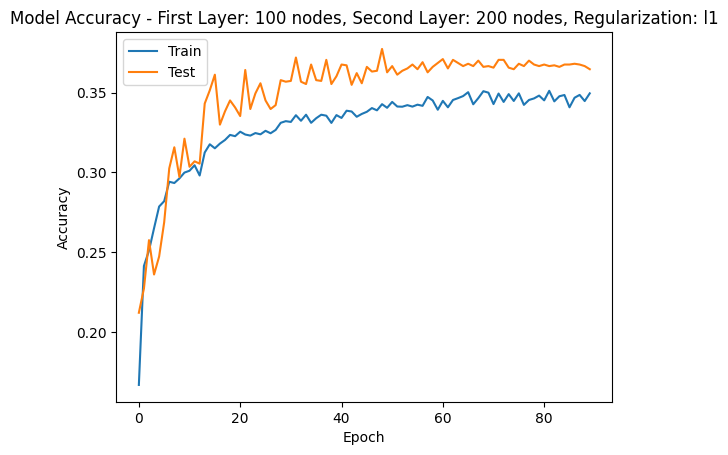

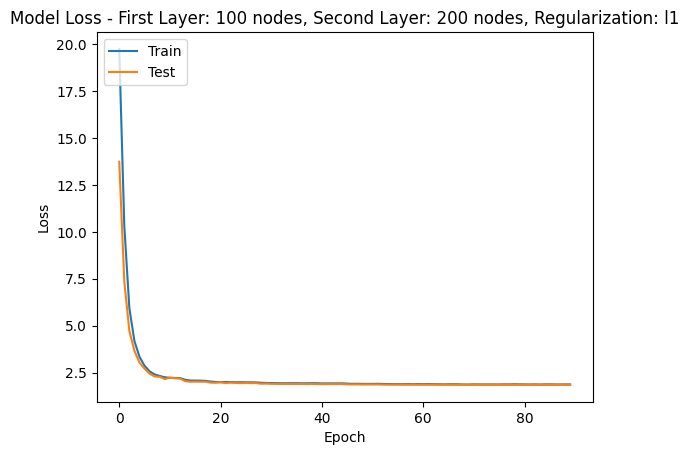

Testing model with first layer: 100 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1163 - loss: 5.6455 - val_accuracy: 0.2359 - val_loss: 4.1985 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2326 - loss: 4.2973 - val_accuracy: 0.2624 - val_loss: 3.6258 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2563 - loss: 3.7108 - val_accuracy: 0.2584 - val_loss: 3.2648 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2614 - loss: 3.3181 - val_accuracy: 0.2976 - val_loss: 2.9498 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step accuracy: 0.2824 - loss: 3.0109 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
Epoch 5: Train Accuracy = 0.2857, Train Precision = 0.3615, Train Recall = 0.3091, Train Loss = 2.9353, Train MSE = 6.0349, Train R² = 0.5909, Val Accuracy = 0.2956, Val Precision = 0.3626, Val Recall = 0.2956, Val Loss = 2.7309, Val MSE = 6.0661, Val R² 

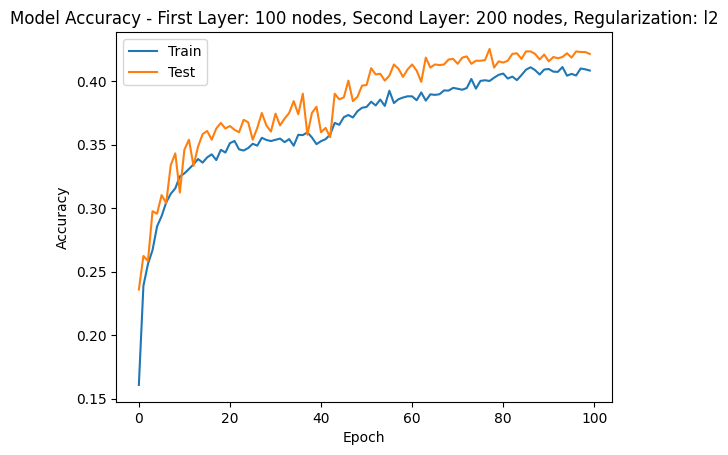

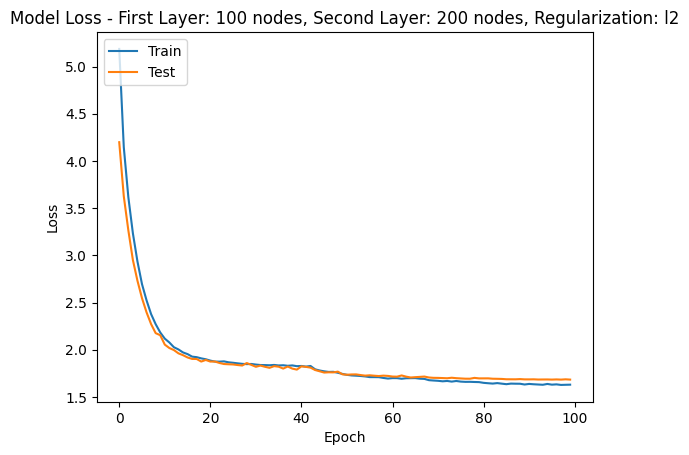

Testing model with first layer: 100 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1281 - loss: 26.2584 - val_accuracy: 0.2364 - val_loss: 14.7794 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2414 - loss: 12.7494 - val_accuracy: 0.2521 - val_loss: 7.7344 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2579 - loss: 7.0232 - val_accuracy: 0.2442 - val_loss: 5.1146 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2747 - loss: 4.8279 - val_accuracy: 0.2663 - val_loss: 3.9446 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step accuracy: 0.2735 - loss: 3.8316 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
Epoch 5: Train Accuracy = 0.2774, Train Precision = 0.3189, Train Recall = 0.2591, Train Loss = 3.6574, Train MSE = 7.1445, Train R² = 0.5157, Val Accuracy = 0.2482, Val Precision = 0.3182, Val Recall = 0.2482, Val Loss = 3.2783, Val MSE = 7.1914, Val 

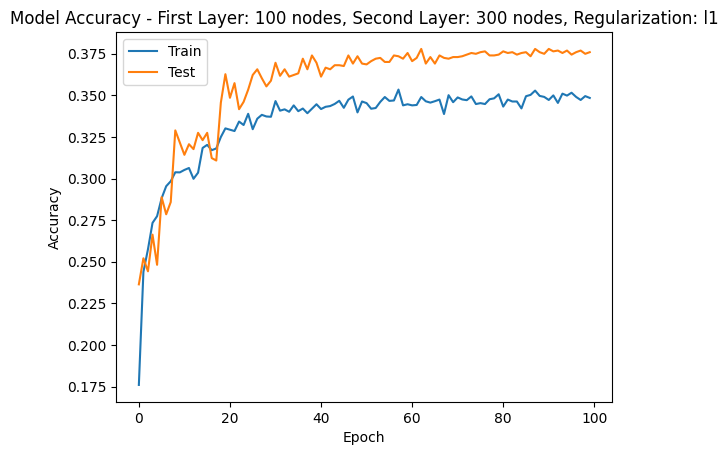

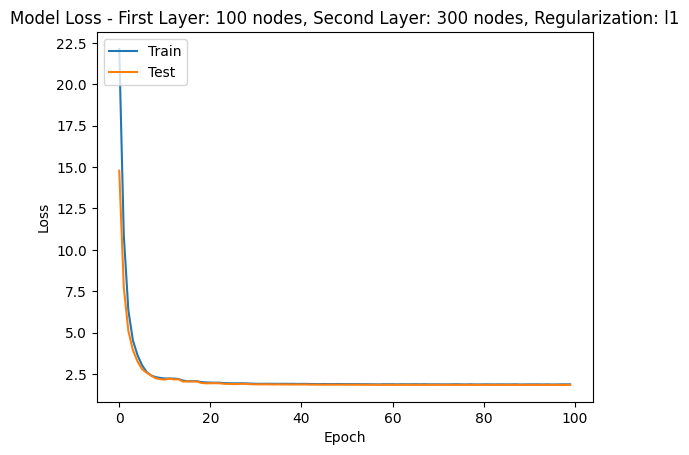

Testing model with first layer: 100 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1370 - loss: 5.6346 - val_accuracy: 0.2389 - val_loss: 4.2364 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2338 - loss: 4.3691 - val_accuracy: 0.2790 - val_loss: 3.6302 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2616 - loss: 3.7588 - val_accuracy: 0.2932 - val_loss: 3.2394 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2732 - loss: 3.3373 - val_accuracy: 0.3074 - val_loss: 2.9335 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step accuracy: 0.2860 - loss: 3.0539 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
Epoch 5: Train Accuracy = 0.2857, Train Precision = 0.3680, Train Recall = 0.3348, Train Loss = 2.9779, Train MSE = 5.5565, Train R² = 0.6233, Val Accuracy = 0.3284, Val Precision = 0.3929, Val Recall = 0.3284, Val Loss = 2.7054, Val MSE = 5.5658, Val R² 

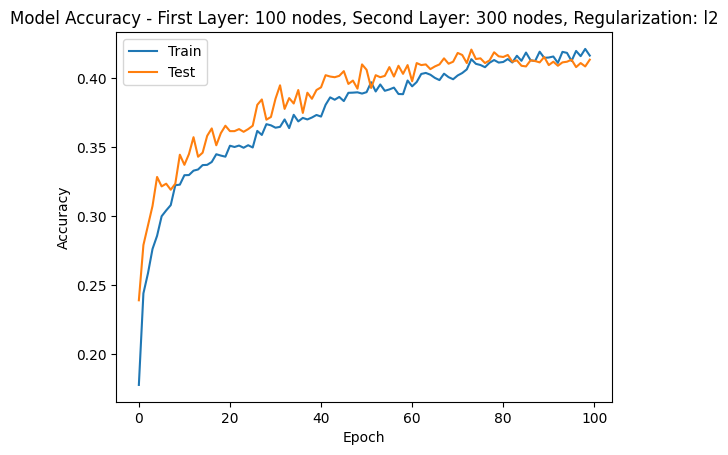

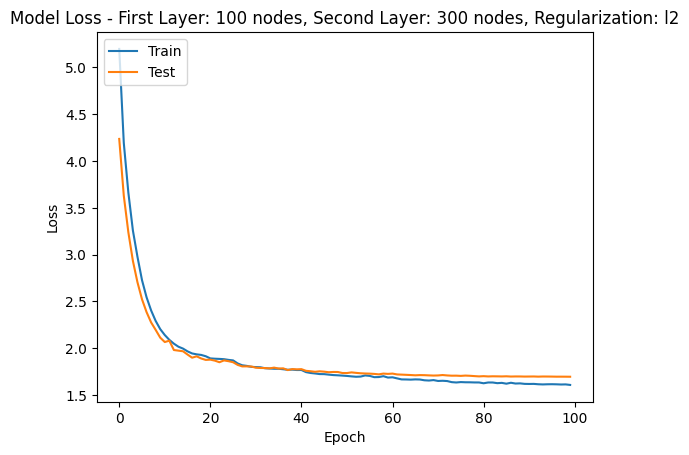

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1122 - loss: 27.7219 - val_accuracy: 0.2237 - val_loss: 15.4273 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2438 - loss: 12.8658 - val_accuracy: 0.2222 - val_loss: 7.0214 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2688 - loss: 6.0563 - val_accuracy: 0.2438 - val_loss: 4.1609 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2731 - loss: 3.9152 - val_accuracy: 0.2589 - val_loss: 3.3396 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step accuracy: 0.2690 - loss: 3.2686 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
Epoch 5: Train Accuracy = 0.2733, Train Precision = 0.3224, Train Recall = 0.2948, Train Loss = 3.1184, Train MSE = 6.9685, Train R² = 0.5276, Val Accuracy = 0.2849, Val Precision = 0.3513, Val Recall = 0.2849, Val Loss = 2.8559, Val MSE = 6.9046, Val 

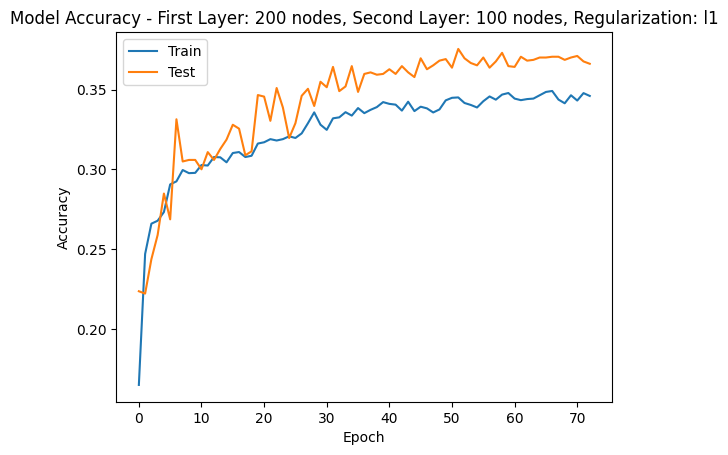

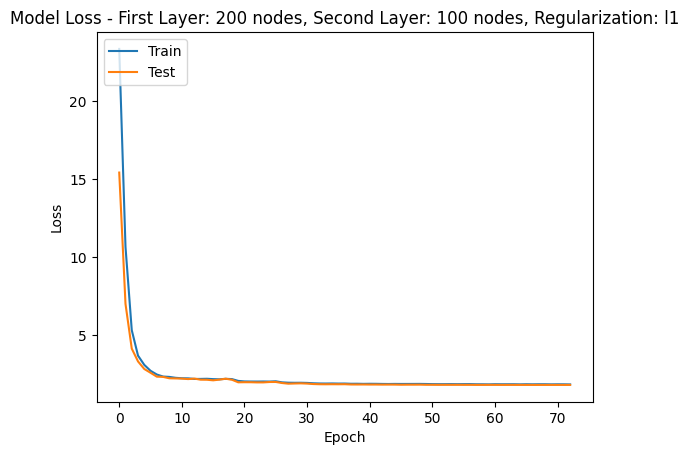

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1357 - loss: 5.7750 - val_accuracy: 0.2707 - val_loss: 4.3769 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2444 - loss: 4.4210 - val_accuracy: 0.2947 - val_loss: 3.6734 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2715 - loss: 3.7283 - val_accuracy: 0.3177 - val_loss: 3.1901 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2812 - loss: 3.2568 - val_accuracy: 0.3123 - val_loss: 2.8495 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step accuracy: 0.2982 - loss: 2.8726 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.3019, Train Precision = 0.3641, Train Recall = 0.3446, Train Loss = 2.8030, Train MSE = 5.3044, Train R² = 0.6404, Val Accuracy = 0.3221, Val Precision = 0.3506, Val Recall = 0.3221, Val Loss = 2.6033, Val MSE = 5.5326, Val R² 

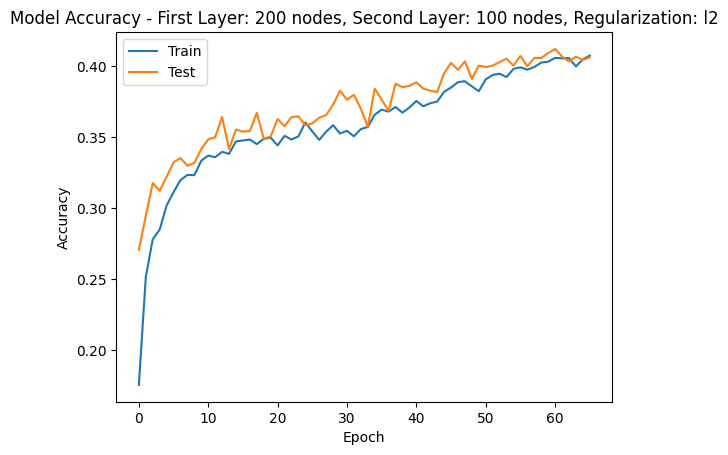

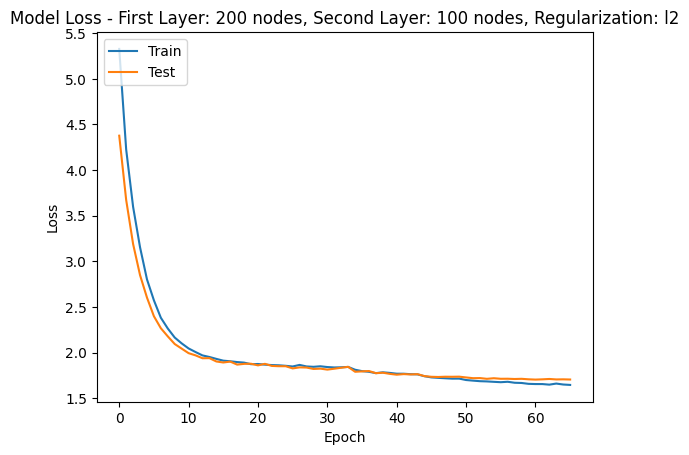

Testing model with first layer: 200 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1397 - loss: 35.2424 - val_accuracy: 0.2614 - val_loss: 17.0900 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2479 - loss: 13.9547 - val_accuracy: 0.2565 - val_loss: 7.1874 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2703 - loss: 6.3407 - val_accuracy: 0.2384 - val_loss: 4.5635 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2735 - loss: 4.3001 - val_accuracy: 0.2917 - val_loss: 3.4413 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step accuracy: 0.2814 - loss: 3.4425 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
Epoch 5: Train Accuracy = 0.2825, Train Precision = 0.3633, Train Recall = 0.2968, Train Loss = 3.2764, Train MSE = 6.5877, Train R² = 0.5534, Val Accuracy = 0.2873, Val Precision = 0.3552, Val Recall = 0.2873, Val Loss = 2.9142, Val MSE = 6.4841, Val 

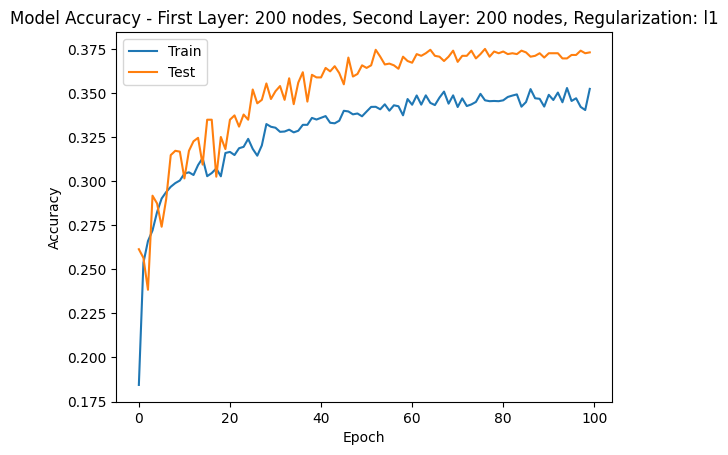

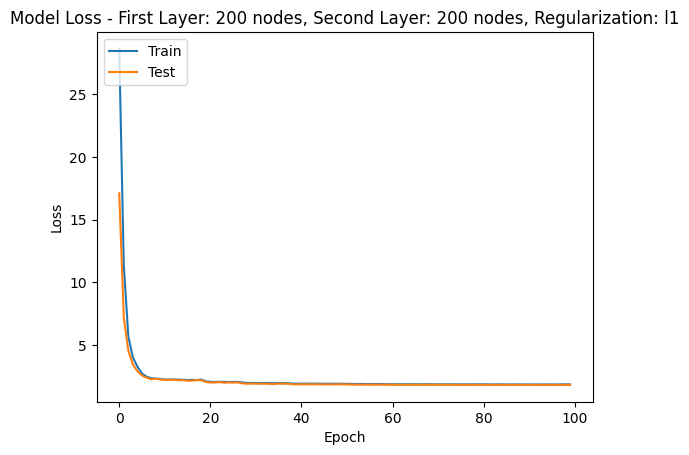

Testing model with first layer: 200 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1367 - loss: 6.4116 - val_accuracy: 0.2751 - val_loss: 4.7581 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2438 - loss: 4.8581 - val_accuracy: 0.3064 - val_loss: 3.9729 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2710 - loss: 4.0567 - val_accuracy: 0.3167 - val_loss: 3.4221 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2880 - loss: 3.4690 - val_accuracy: 0.2986 - val_loss: 3.0533 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step accuracy: 0.3008 - loss: 3.0572 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
Epoch 5: Train Accuracy = 0.3009, Train Precision = 0.3556, Train Recall = 0.3352, Train Loss = 2.9853, Train MSE = 5.5111, Train R² = 0.6264, Val Accuracy = 0.3157, Val Precision = 0.3480, Val Recall = 0.3157, Val Loss = 2.7559, Val MSE = 5.4332, Val R² 

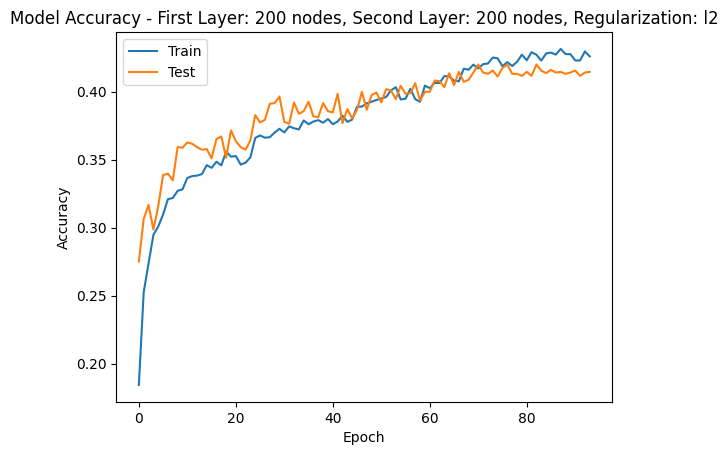

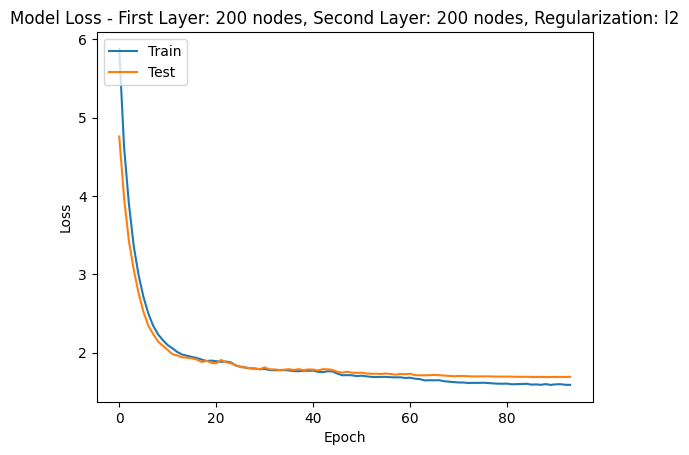

Testing model with first layer: 200 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1516 - loss: 40.6204 - val_accuracy: 0.2354 - val_loss: 17.3042 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2538 - loss: 13.8108 - val_accuracy: 0.2384 - val_loss: 7.1935 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2646 - loss: 6.4766 - val_accuracy: 0.2628 - val_loss: 4.6576 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2695 - loss: 4.4388 - val_accuracy: 0.2668 - val_loss: 3.6542 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step accuracy: 0.2885 - loss: 3.4500 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
Epoch 5: Train Accuracy = 0.2836, Train Precision = 0.3102, Train Recall = 0.2632, Train Loss = 3.2476, Train MSE = 7.4995, Train R² = 0.4916, Val Accuracy = 0.2501, Val Precision = 0.3425, Val Recall = 0.2501, Val Loss = 2.9828, Val MSE = 7.0671, Val 

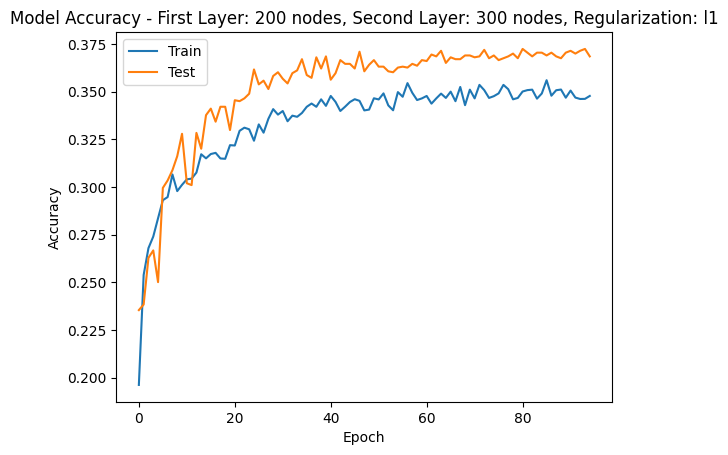

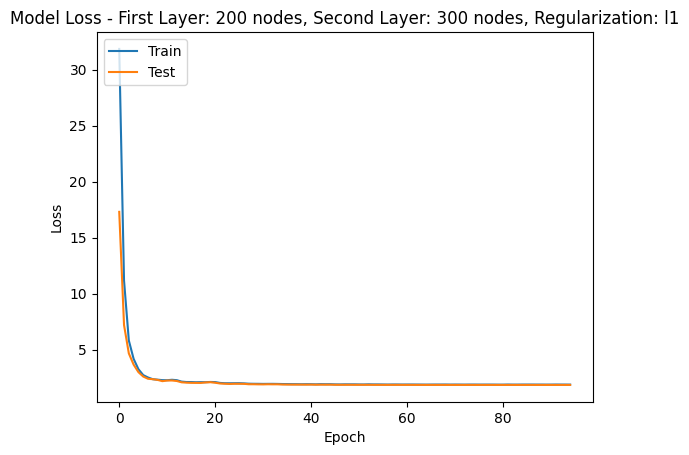

Testing model with first layer: 200 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1504 - loss: 6.7498 - val_accuracy: 0.2775 - val_loss: 5.0828 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2521 - loss: 5.0918 - val_accuracy: 0.2868 - val_loss: 4.2191 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2786 - loss: 4.2324 - val_accuracy: 0.2898 - val_loss: 3.6190 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2828 - loss: 3.6378 - val_accuracy: 0.3000 - val_loss: 3.1853 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step accuracy: 0.3020 - loss: 3.1803 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.3037, Train Precision = 0.3654, Train Recall = 0.3443, Train Loss = 3.0937, Train MSE = 5.4470, Train R² = 0.6308, Val Accuracy = 0.3201, Val Precision = 0.3478, Val Recall = 0.3201, Val Loss = 2.8551, Val MSE = 5.5370, Val R² 

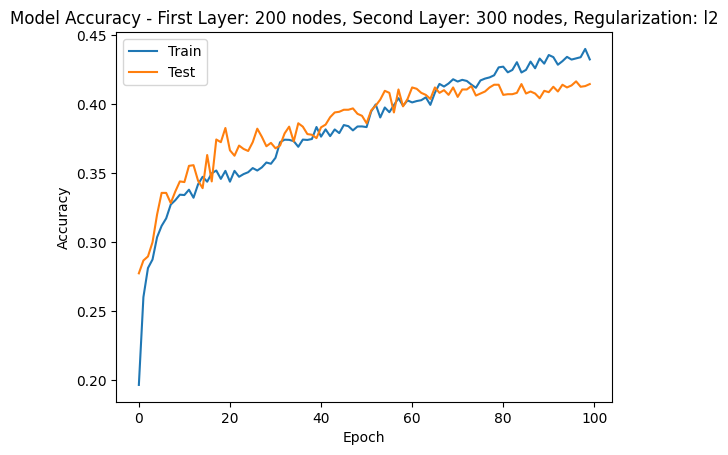

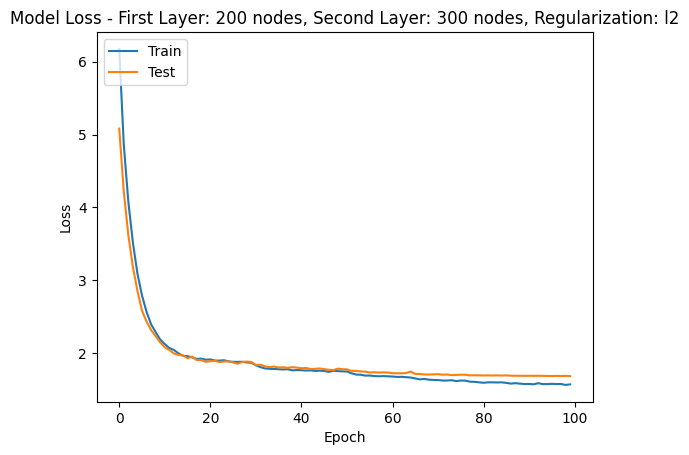

Testing model with first layer: 400 nodes, second layer: 100 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1397 - loss: 38.5400 - val_accuracy: 0.1713 - val_loss: 16.2871 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2541 - loss: 12.5479 - val_accuracy: 0.1826 - val_loss: 5.9217 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2541 - loss: 5.1467 - val_accuracy: 0.2369 - val_loss: 3.8292 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2636 - loss: 3.6478 - val_accuracy: 0.2643 - val_loss: 3.0909 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step accuracy: 0.2775 - loss: 3.0557 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2737, Train Precision = 0.3499, Train Recall = 0.2733, Train Loss = 2.9765, Train MSE = 7.3749, Train R² = 0.5001, Val Accuracy = 0.2643, Val Precision = 0.3428, Val Recall = 0.2643, Val Loss = 2.8095, Val MSE = 7.3656, Val 

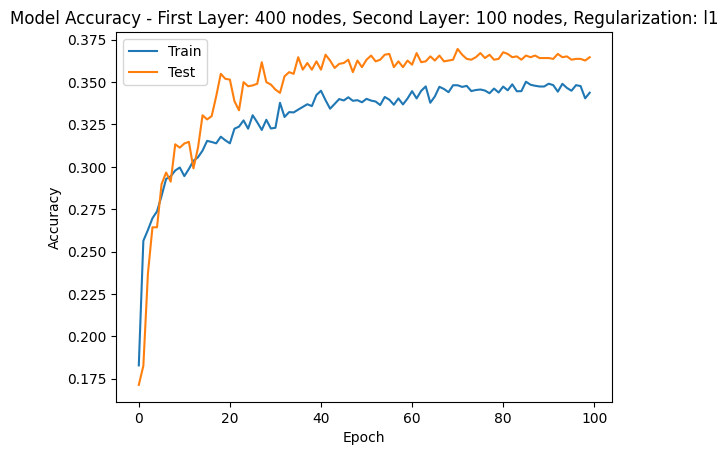

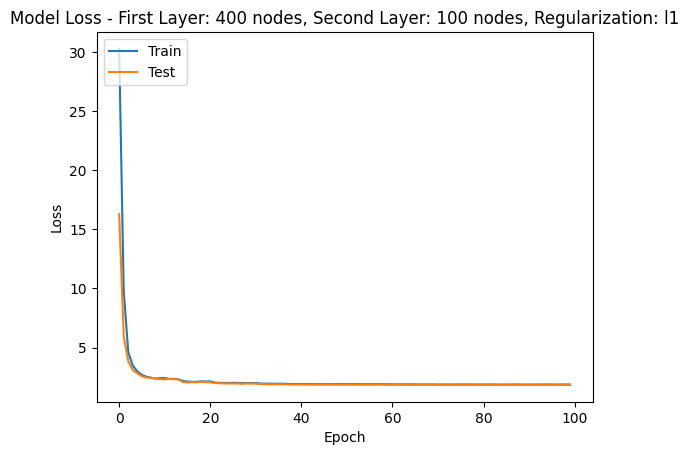

Testing model with first layer: 400 nodes, second layer: 100 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1465 - loss: 6.1794 - val_accuracy: 0.2638 - val_loss: 4.6830 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2661 - loss: 4.5912 - val_accuracy: 0.2800 - val_loss: 3.8266 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2847 - loss: 3.8190 - val_accuracy: 0.3113 - val_loss: 3.2347 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2989 - loss: 3.2340 - val_accuracy: 0.3098 - val_loss: 2.8519 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step accuracy: 0.3137 - loss: 2.8481 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.3157, Train Precision = 0.3844, Train Recall = 0.3236, Train Loss = 2.7712, Train MSE = 5.4841, Train R² = 0.6282, Val Accuracy = 0.3089, Val Precision = 0.3673, Val Recall = 0.3089, Val Loss = 2.5931, Val MSE = 5.6285, Val R² 

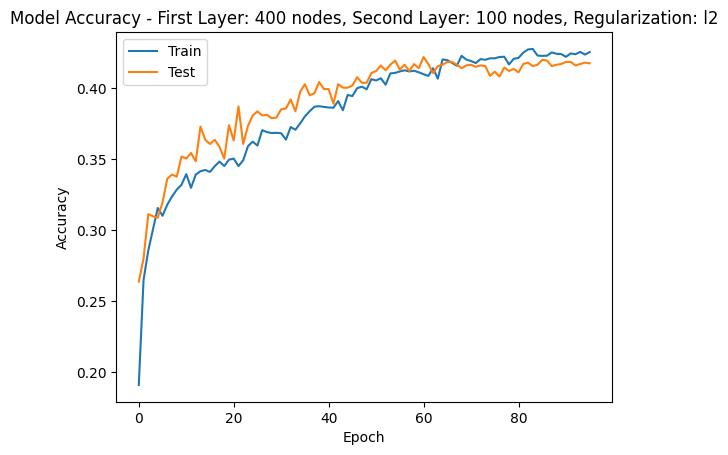

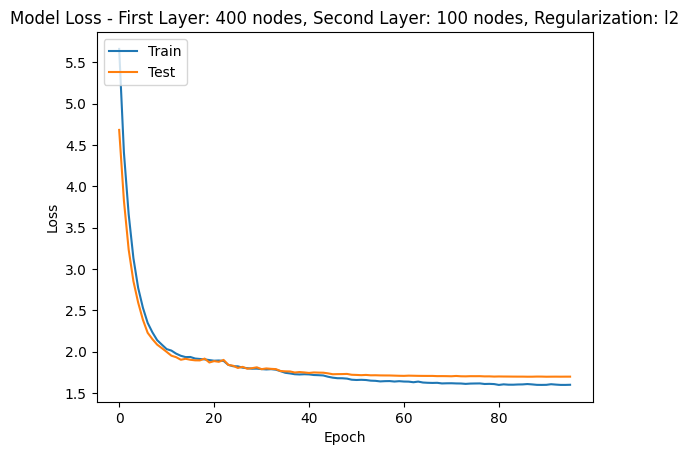

Testing model with first layer: 400 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1556 - loss: 51.0467 - val_accuracy: 0.2374 - val_loss: 18.1581 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2613 - loss: 13.6705 - val_accuracy: 0.1777 - val_loss: 6.4623 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2677 - loss: 5.7415 - val_accuracy: 0.2511 - val_loss: 4.2539 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2681 - loss: 4.0914 - val_accuracy: 0.2433 - val_loss: 3.4378 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step accuracy: 0.2832 - loss: 3.2361 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2792, Train Precision = 0.3742, Train Recall = 0.2789, Train Loss = 3.1059, Train MSE = 6.3277, Train R² = 0.5711, Val Accuracy = 0.2761, Val Precision = 0.3760, Val Recall = 0.2761, Val Loss = 2.8577, Val MSE = 6.2056, Val 

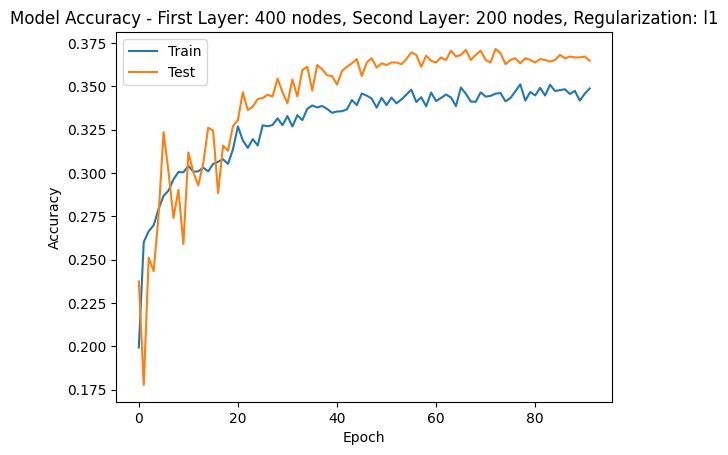

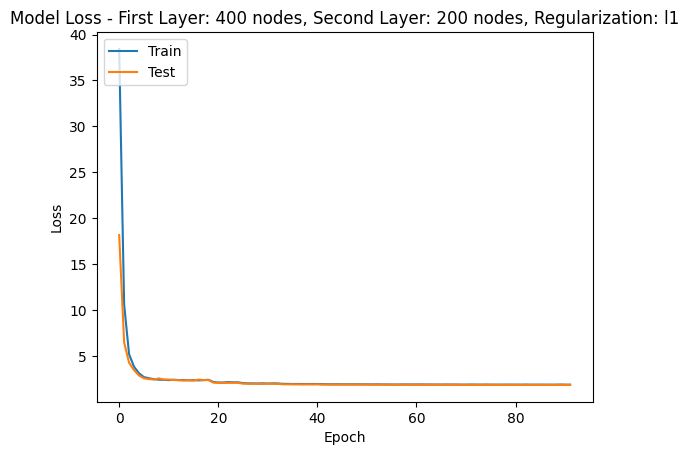

Testing model with first layer: 400 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1555 - loss: 7.2044 - val_accuracy: 0.2658 - val_loss: 5.3505 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2554 - loss: 5.2916 - val_accuracy: 0.3128 - val_loss: 4.2754 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2859 - loss: 4.2772 - val_accuracy: 0.3245 - val_loss: 3.5619 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3088 - loss: 3.5153 - val_accuracy: 0.3089 - val_loss: 3.0694 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step accuracy: 0.3085 - loss: 3.0730 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.3109, Train Precision = 0.3969, Train Recall = 0.3631, Train Loss = 2.9755, Train MSE = 5.2164, Train R² = 0.6464, Val Accuracy = 0.3421, Val Precision = 0.4114, Val Recall = 0.3421, Val Loss = 2.6956, Val MSE = 5.5379, Val R² 

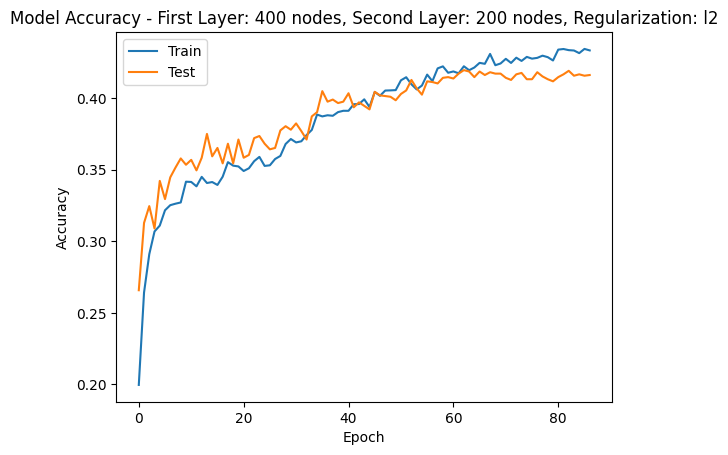

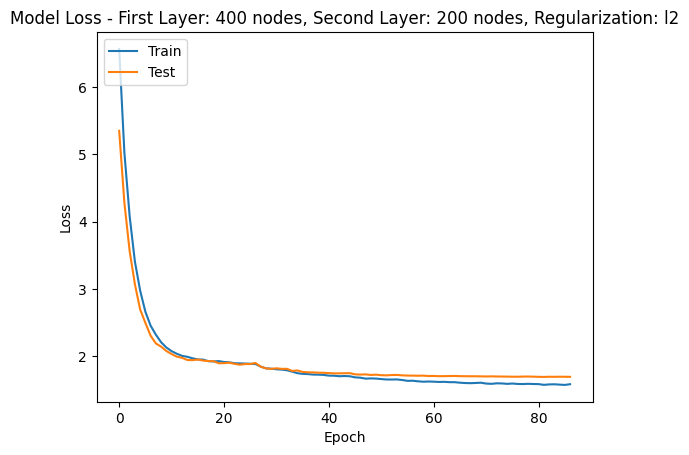

Testing model with first layer: 400 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1580 - loss: 59.9713 - val_accuracy: 0.1816 - val_loss: 18.1114 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2598 - loss: 13.7935 - val_accuracy: 0.1860 - val_loss: 6.9037 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2699 - loss: 6.1916 - val_accuracy: 0.2447 - val_loss: 4.5672 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2746 - loss: 4.1732 - val_accuracy: 0.2428 - val_loss: 3.4455 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2758 - loss: 3.2281 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2819, Train Precision = 0.3527, Train Recall = 0.2939, Train Loss = 3.0755, Train MSE = 6.0913, Train R² = 0.5871, Val Accuracy = 0.2986, Val Precision = 0.3371, Val Recall = 0.2986, Val Loss = 2.8384, Val MSE = 6.1214, Val R

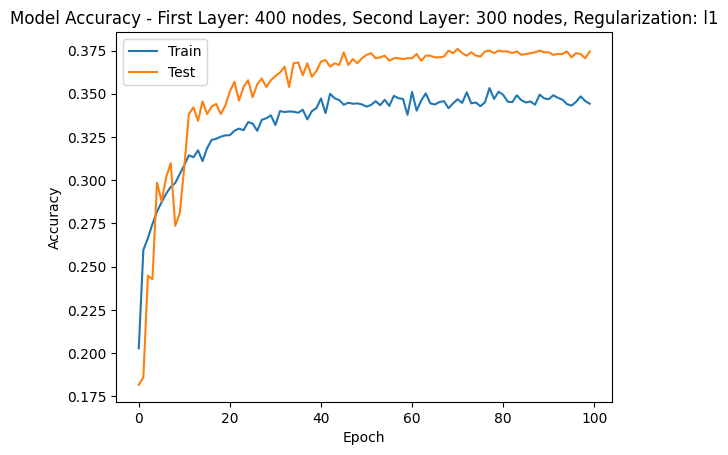

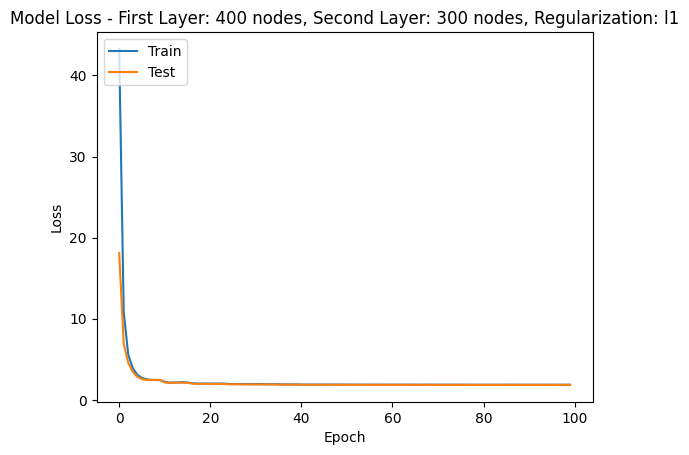

Testing model with first layer: 400 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1681 - loss: 7.8190 - val_accuracy: 0.2863 - val_loss: 5.8229 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2731 - loss: 5.6839 - val_accuracy: 0.3186 - val_loss: 4.5603 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2862 - loss: 4.5136 - val_accuracy: 0.3172 - val_loss: 3.7207 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3080 - loss: 3.6856 - val_accuracy: 0.3324 - val_loss: 3.1472 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3081 - loss: 3.1623 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.3097, Train Precision = 0.3749, Train Recall = 0.3528, Train Loss = 3.0639, Train MSE = 5.2525, Train R² = 0.6439, Val Accuracy = 0.3309, Val Precision = 0.3510, Val Recall = 0.3309, Val Loss = 2.7894, Val MSE = 5.2839, Val R² 

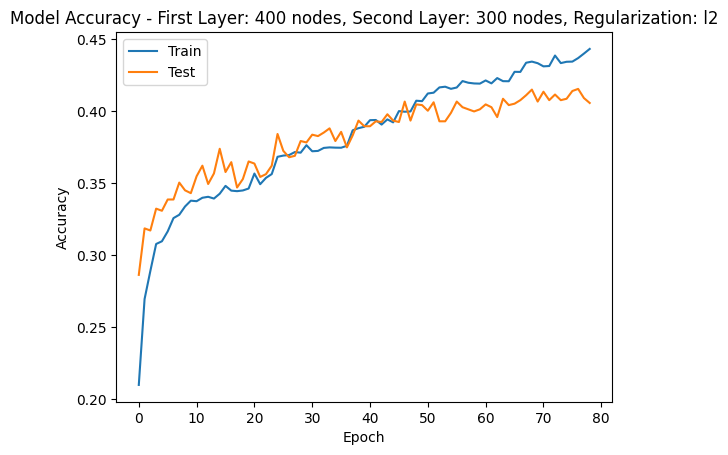

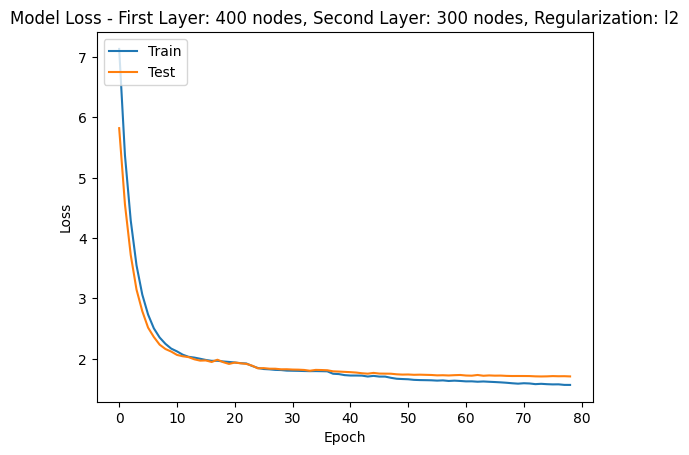

Testing model with first layer: 600 nodes, second layer: 100 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1507 - loss: 45.5155 - val_accuracy: 0.1919 - val_loss: 14.5614 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2549 - loss: 10.6962 - val_accuracy: 0.1924 - val_loss: 5.1292 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2525 - loss: 4.5899 - val_accuracy: 0.2389 - val_loss: 3.7272 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2675 - loss: 3.5388 - val_accuracy: 0.2682 - val_loss: 3.0487 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2718 - loss: 2.9792 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.2764, Train Precision = 0.3614, Train Recall = 0.2912, Train Loss = 2.9062, Train MSE = 6.5903, Train R² = 0.5533, Val Accuracy = 0.2824, Val Precision = 0.3898, Val Recall = 0.2824, Val Loss = 2.7142, Val MSE = 6.4611, Val 

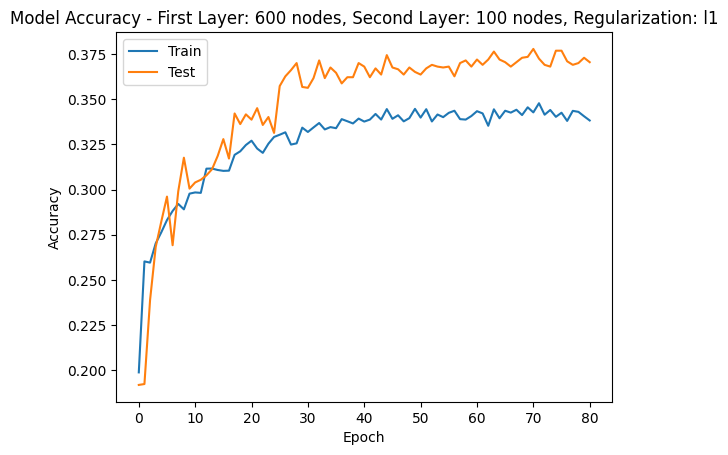

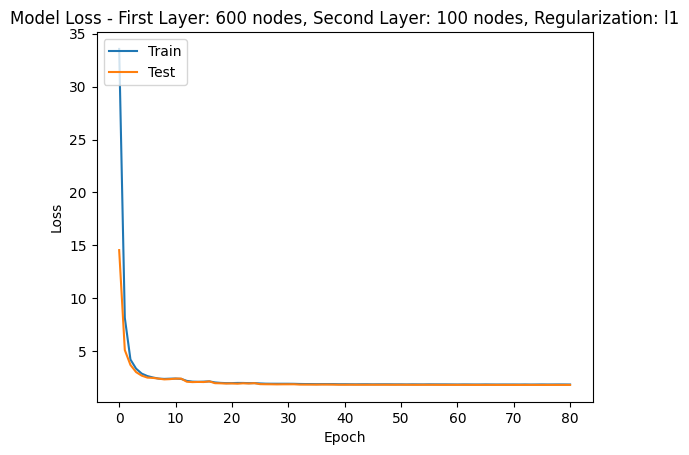

Testing model with first layer: 600 nodes, second layer: 100 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1483 - loss: 6.3813 - val_accuracy: 0.2766 - val_loss: 4.8077 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2698 - loss: 4.6785 - val_accuracy: 0.3030 - val_loss: 3.8269 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2912 - loss: 3.7983 - val_accuracy: 0.3372 - val_loss: 3.1713 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3079 - loss: 3.1628 - val_accuracy: 0.3480 - val_loss: 2.7564 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3104 - loss: 2.7721 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 5: Train Accuracy = 0.3111, Train Precision = 0.3739, Train Recall = 0.3631, Train Loss = 2.7073, Train MSE = 5.2146, Train R² = 0.6465, Val Accuracy = 0.3436, Val Precision = 0.3684, Val Recall = 0.3436, Val Loss = 2.4837, Val MSE = 5.2075, Val R² 

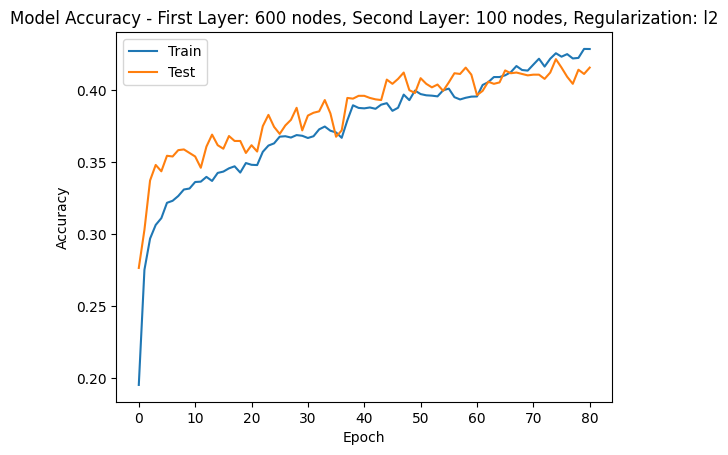

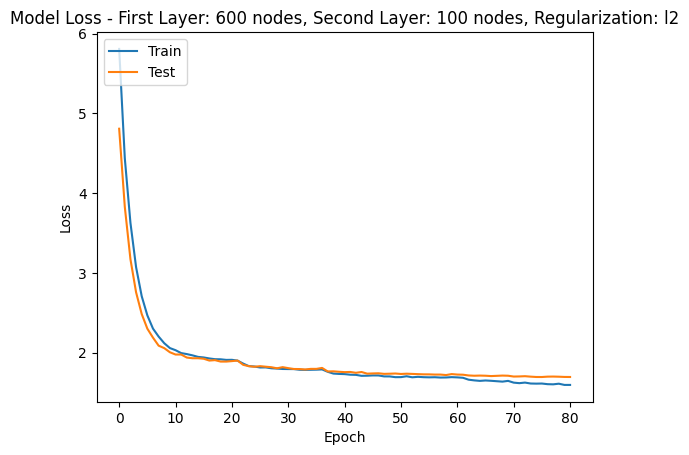

Testing model with first layer: 600 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1687 - loss: 61.3110 - val_accuracy: 0.2124 - val_loss: 16.4024 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2613 - loss: 12.0232 - val_accuracy: 0.2129 - val_loss: 5.8963 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2623 - loss: 5.3029 - val_accuracy: 0.2261 - val_loss: 4.2222 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2723 - loss: 3.9187 - val_accuracy: 0.2697 - val_loss: 3.2517 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2850 - loss: 3.1633 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2822, Train Precision = 0.3855, Train Recall = 0.2656, Train Loss = 3.0580, Train MSE = 6.9788, Train R² = 0.5269, Val Accuracy = 0.2677, Val Precision = 0.4031, Val Recall = 0.2677, Val Loss = 2.9446, Val MSE = 7.0636, Val R

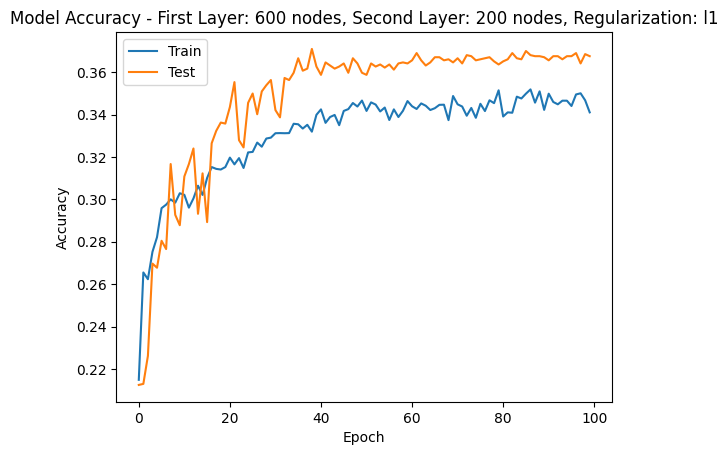

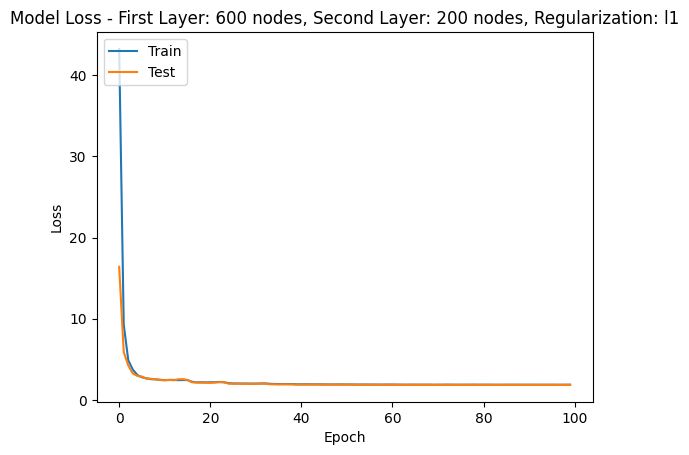

Testing model with first layer: 600 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1780 - loss: 7.4405 - val_accuracy: 0.2726 - val_loss: 5.5607 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2771 - loss: 5.3591 - val_accuracy: 0.3054 - val_loss: 4.3473 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2935 - loss: 4.2523 - val_accuracy: 0.3338 - val_loss: 3.4937 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3098 - loss: 3.4855 - val_accuracy: 0.3304 - val_loss: 2.9806 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3197 - loss: 2.9775 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3167, Train Precision = 0.4002, Train Recall = 0.3625, Train Loss = 2.8835, Train MSE = 4.9705, Train R² = 0.6631, Val Accuracy = 0.3353, Val Precision = 0.3738, Val Recall = 0.3353, Val Loss = 2.6342, Val MSE = 5.1870, Val R² =

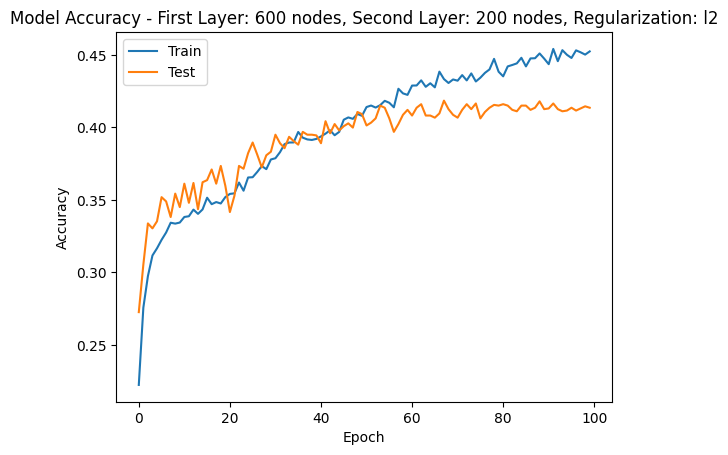

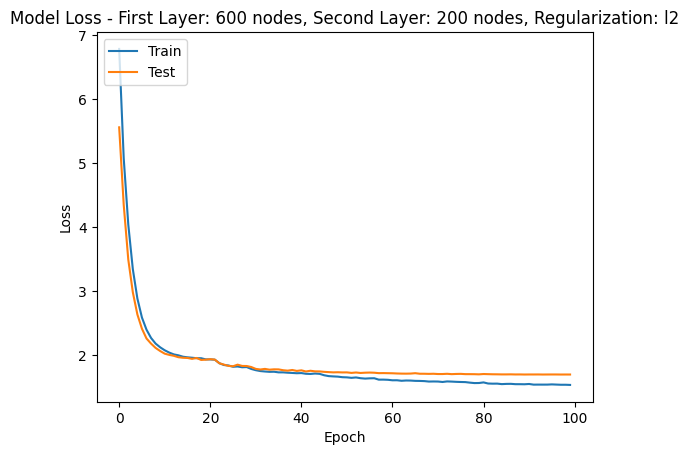

Testing model with first layer: 600 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1778 - loss: 73.1968 - val_accuracy: 0.1468 - val_loss: 16.4477 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2654 - loss: 12.2119 - val_accuracy: 0.1806 - val_loss: 6.3172 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2592 - loss: 5.7153 - val_accuracy: 0.2261 - val_loss: 4.3998 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2677 - loss: 4.1360 - val_accuracy: 0.2687 - val_loss: 3.3086 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2836 - loss: 3.2220 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2872, Train Precision = 0.3821, Train Recall = 0.2651, Train Loss = 3.1104, Train MSE = 7.3347, Train R² = 0.5028, Val Accuracy = 0.2594, Val Precision = 0.3814, Val Recall = 0.2594, Val Loss = 2.9848, Val MSE = 7.1943, Val R

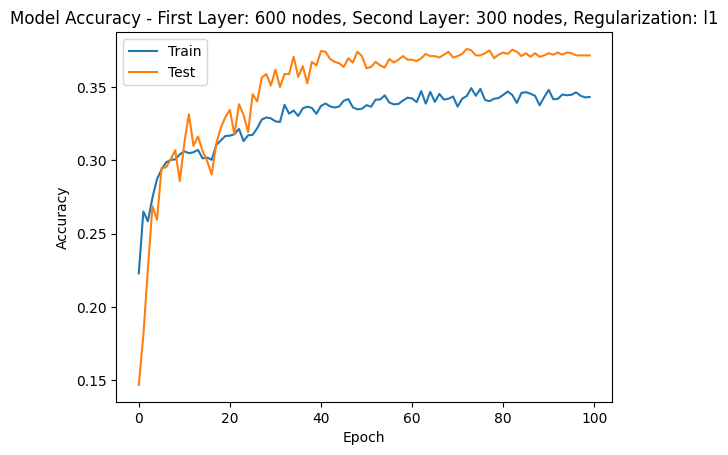

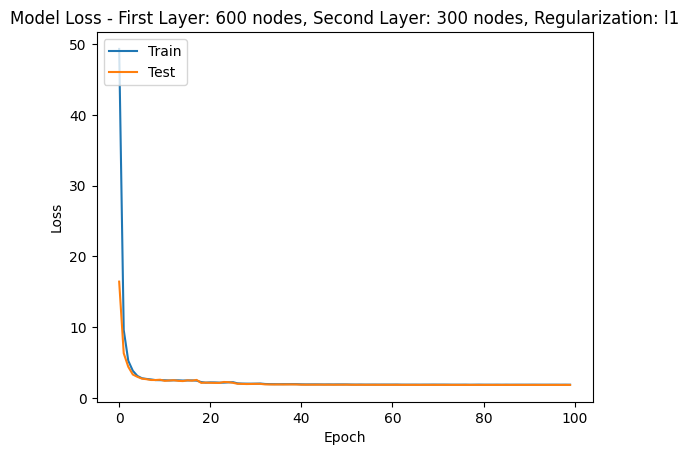

Testing model with first layer: 600 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1792 - loss: 8.3122 - val_accuracy: 0.2668 - val_loss: 6.1504 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2755 - loss: 5.9066 - val_accuracy: 0.3348 - val_loss: 4.6182 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2945 - loss: 4.5241 - val_accuracy: 0.3231 - val_loss: 3.6724 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3180 - loss: 3.6039 - val_accuracy: 0.3245 - val_loss: 3.0689 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3232 - loss: 3.0390
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3203, Train Precision = 0.3722, Train Recall = 0.3586, Train Loss = 2.9501, Train MSE = 5.0937, Train R² = 0.6547, Val Accuracy = 0.3328, Val Precision = 0.3445, Val Recall = 0.3328, Val Loss = 2.6747, Val MSE = 5.2036, Val R² = 

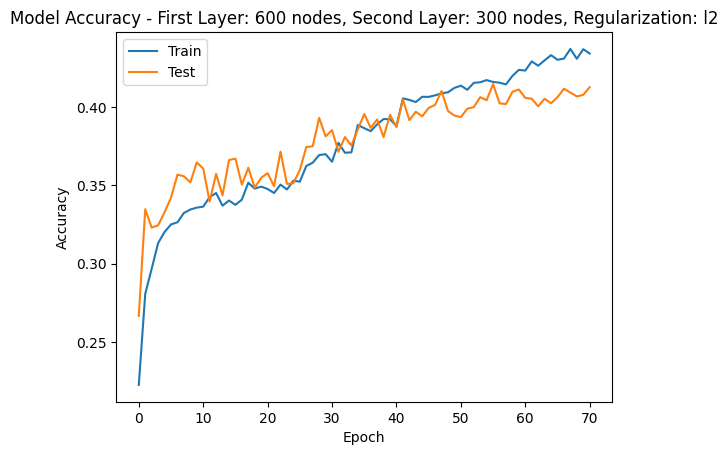

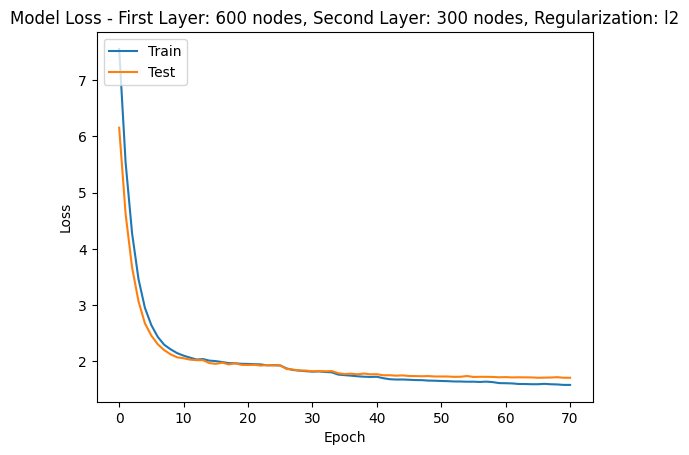

Testing model with first layer: 800 nodes, second layer: 100 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1615 - loss: 51.4901 - val_accuracy: 0.2271 - val_loss: 13.4340 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2545 - loss: 9.7292 - val_accuracy: 0.2085 - val_loss: 4.7155 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2585 - loss: 4.4467 - val_accuracy: 0.2305 - val_loss: 3.7679 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2713 - loss: 3.5420 - val_accuracy: 0.2966 - val_loss: 3.1117 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2767 - loss: 3.1236 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2811, Train Precision = 0.3615, Train Recall = 0.2959, Train Loss = 3.0647, Train MSE = 6.6133, Train R² = 0.5517, Val Accuracy = 0.2863, Val Precision = 0.3661, Val Recall = 0.2863, Val Loss = 2.9517, Val MSE = 6.5521, Val R²

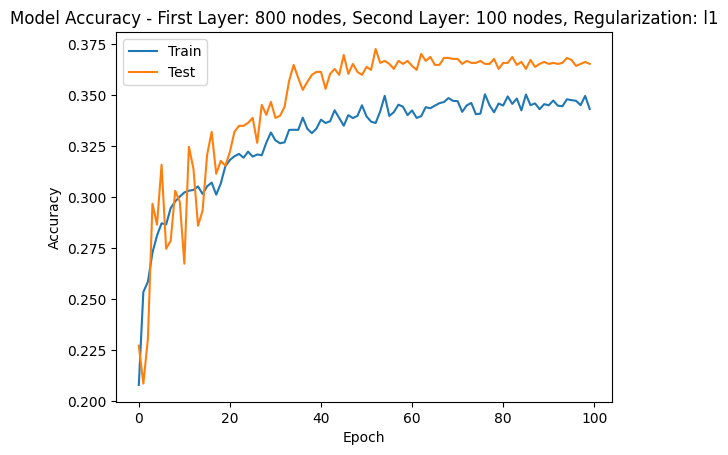

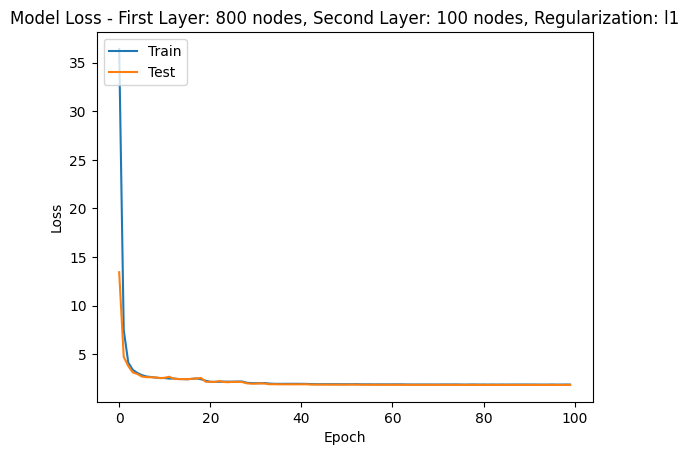

Testing model with first layer: 800 nodes, second layer: 100 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1608 - loss: 6.4491 - val_accuracy: 0.2599 - val_loss: 4.8669 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2714 - loss: 4.7062 - val_accuracy: 0.2907 - val_loss: 3.8218 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2918 - loss: 3.7731 - val_accuracy: 0.3245 - val_loss: 3.1545 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3136 - loss: 3.1282 - val_accuracy: 0.3265 - val_loss: 2.7169 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3095 - loss: 2.7173 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3126, Train Precision = 0.3827, Train Recall = 0.3552, Train Loss = 2.6584, Train MSE = 4.9938, Train R² = 0.6615, Val Accuracy = 0.3284, Val Precision = 0.3592, Val Recall = 0.3284, Val Loss = 2.4555, Val MSE = 5.1209, Val R² =

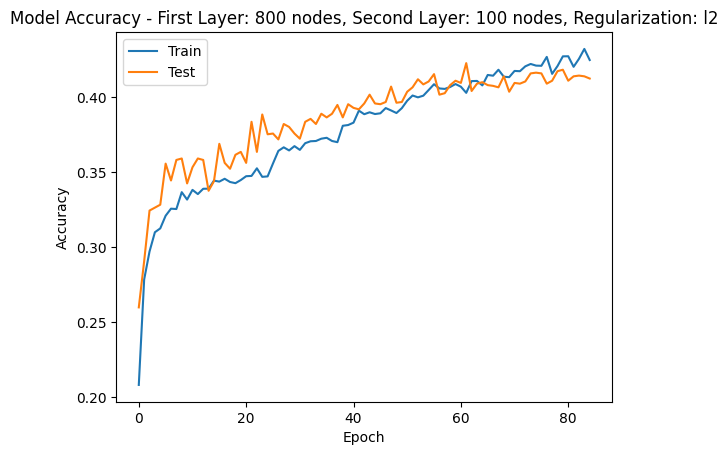

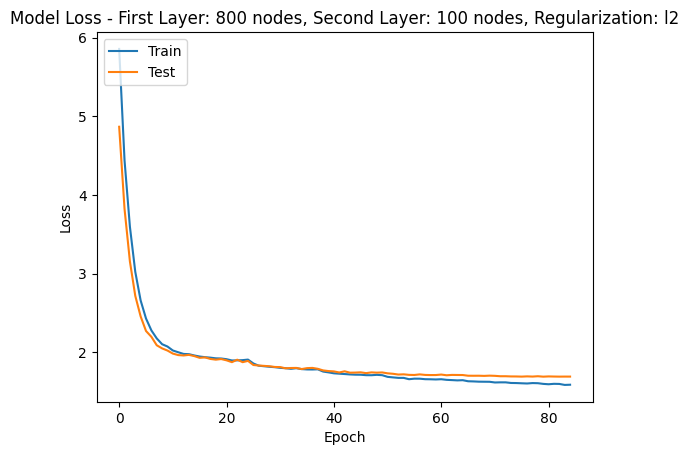

Testing model with first layer: 800 nodes, second layer: 200 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1731 - loss: 68.5809 - val_accuracy: 0.1459 - val_loss: 14.4199 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2506 - loss: 10.5169 - val_accuracy: 0.2105 - val_loss: 5.6541 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2538 - loss: 5.1444 - val_accuracy: 0.2066 - val_loss: 4.2138 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2660 - loss: 4.0573 - val_accuracy: 0.2354 - val_loss: 3.6003 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.2818 - loss: 3.4072 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2831, Train Precision = 0.3731, Train Recall = 0.2828, Train Loss = 3.2985, Train MSE = 6.5969, Train R² = 0.5528, Val Accuracy = 0.2677, Val Precision = 0.3818, Val Recall = 0.2677, Val Loss = 3.1770, Val MSE = 6.5120, Val R

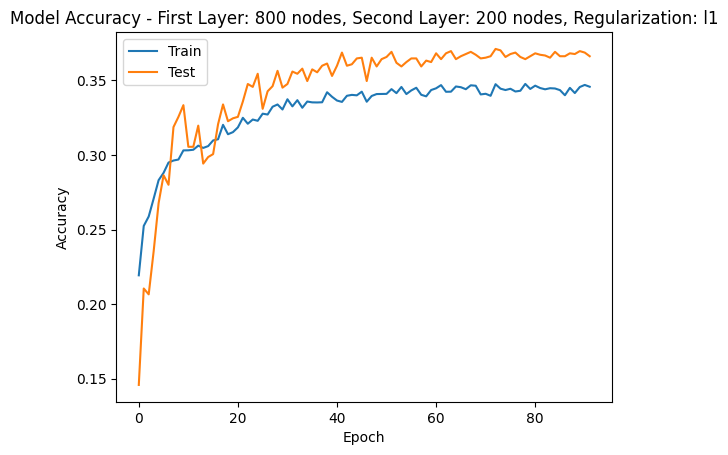

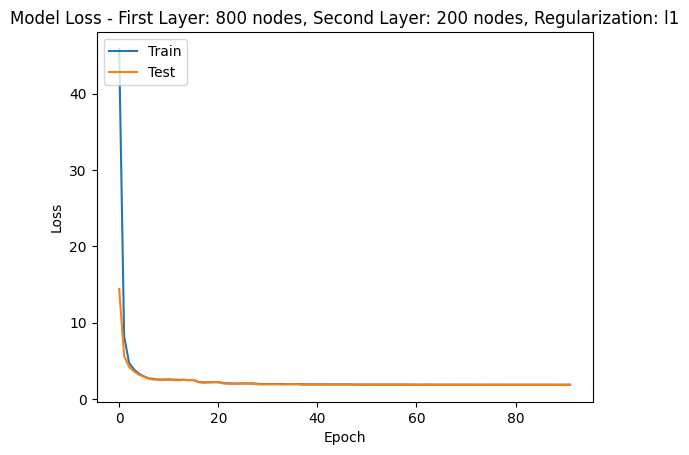

Testing model with first layer: 800 nodes, second layer: 200 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1942 - loss: 7.6411 - val_accuracy: 0.2863 - val_loss: 5.6786 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2773 - loss: 5.4462 - val_accuracy: 0.3079 - val_loss: 4.2952 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2954 - loss: 4.2030 - val_accuracy: 0.3216 - val_loss: 3.4309 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3049 - loss: 3.4169 - val_accuracy: 0.3382 - val_loss: 2.9203 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   accuracy: 0.3179 - loss: 2.9134 
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.3173, Train Precision = 0.3865, Train Recall = 0.3491, Train Loss = 2.8254, Train MSE = 5.8377, Train R² = 0.6043, Val Accuracy = 0.3186, Val Precision = 0.3624, Val Recall = 0.3186, Val Loss = 2.5918, Val MSE = 5.8497, Val R² =

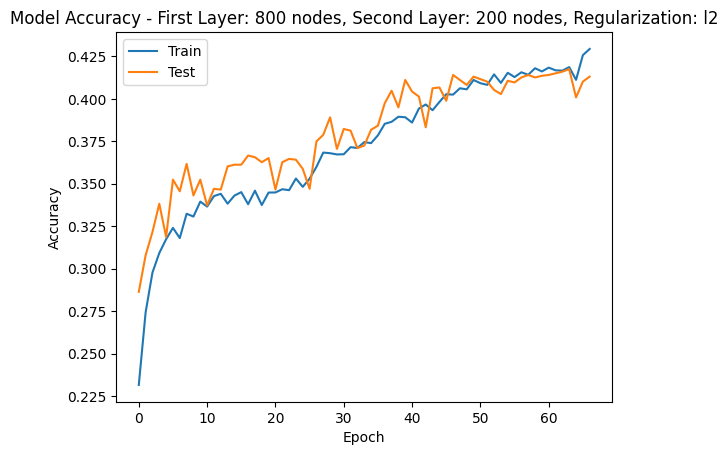

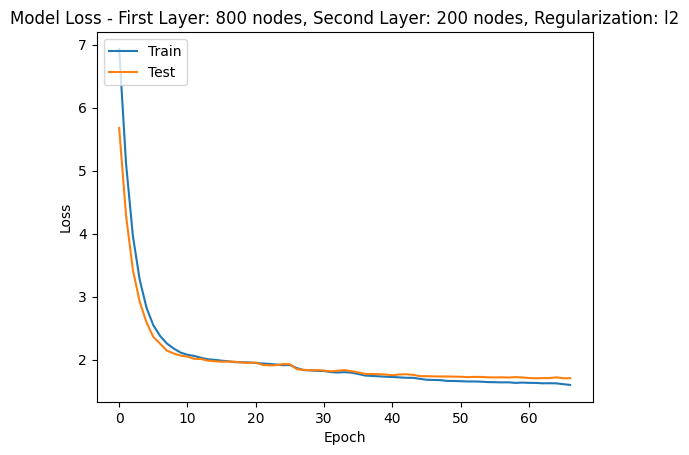

Testing model with first layer: 800 nodes, second layer: 300 nodes, regularization: l1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1806 - loss: 83.2615 - val_accuracy: 0.1836 - val_loss: 14.6010 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2595 - loss: 11.0112 - val_accuracy: 0.1801 - val_loss: 6.1436 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2563 - loss: 5.5473 - val_accuracy: 0.2178 - val_loss: 4.4712 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2710 - loss: 4.1465 - val_accuracy: 0.2619 - val_loss: 3.5791 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   accuracy: 0.2834 - loss: 3.3638
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2883, Train Precision = 0.3568, Train Recall = 0.2844, Train Loss = 3.2142, Train MSE = 6.1366, Train R² = 0.5840, Val Accuracy = 0.2751, Val Precision = 0.3706, Val Recall = 0.2751, Val Loss = 3.0165, Val MSE = 6.0357, Val R²

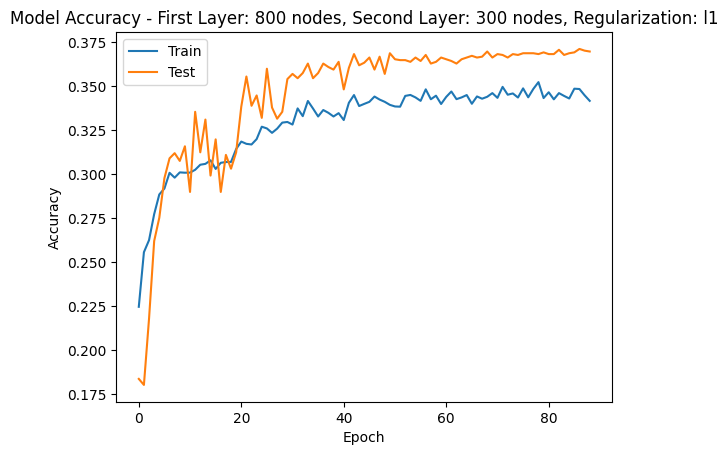

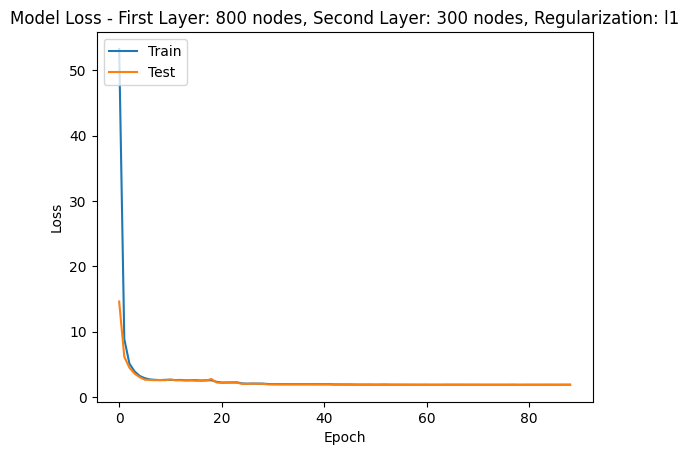

Testing model with first layer: 800 nodes, second layer: 300 nodes, regularization: l2...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1918 - loss: 8.7057 - val_accuracy: 0.2653 - val_loss: 6.3662 - learning_rate: 5.0000e-04
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2761 - loss: 6.0561 - val_accuracy: 0.3128 - val_loss: 4.6730 - learning_rate: 5.0000e-04
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2950 - loss: 4.5374 - val_accuracy: 0.3235 - val_loss: 3.6101 - learning_rate: 5.0000e-04
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3078 - loss: 3.5898 - val_accuracy: 0.3382 - val_loss: 2.9809 - learning_rate: 5.0000e-04
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   accuracy: 0.3176 - loss: 2.9854
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.3211, Train Precision = 0.3616, Train Recall = 0.3586, Train Loss = 2.8984, Train MSE = 5.4264, Train R² = 0.6321, Val Accuracy = 0.3343, Val Precision = 0.3327, Val Recall = 0.3343, Val Loss = 2.6251, Val MSE = 5.7034, Val R² =

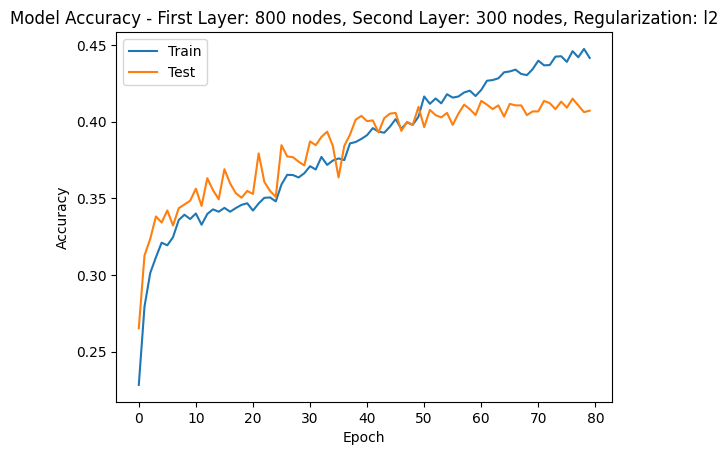

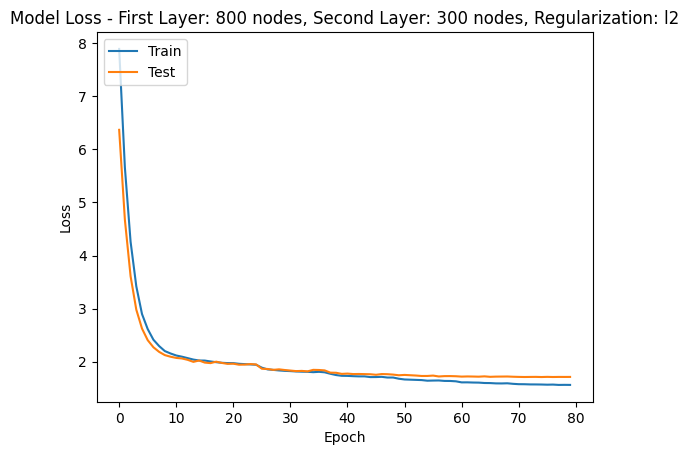


Best model found with first layer: 100 nodes, second layer: 200 nodes, regularization: l2
Best Test Accuracy: 0.4229


In [14]:
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, mean_squared_error, r2_score


# Assuming you already have X_train, X_test, y_train, y_test


# Step 1: Preprocess data
poly = PolynomialFeatures(degree=2)

# Apply the transformation to X_train and X_test
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# List of possible values for layer node sizes and regularization
first_layer_nodes = [100, 200, 400, 600, 800]
second_layer_nodes = [100, 200, 300]
regularization_types = ['l1', 'l2']

# Best model parameters and accuracy tracking
best_accuracy = 0
best_params = None
from sklearn.metrics import precision_score, recall_score, mean_squared_error, r2_score

class PrintEpochs(Callback):
    def __init__(self, interval=5):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        # Only print every 5 epochs
        if (epoch + 1) % self.interval == 0:
            # Get the predicted classes for both training and validation data
            y_train_pred = np.argmax(self.model.predict(X_train_poly), axis=1)  # Predict class labels
            y_val_pred = np.argmax(self.model.predict(X_test_poly), axis=1)  # Predict class labels

            # Calculate precision and recall for training data with zero_division to avoid warnings
            train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
            train_recall = recall_score(y_train, y_train_pred, average='weighted')

            # Calculate precision and recall for validation data with zero_division to avoid warnings
            val_precision = precision_score(y_test, y_val_pred, average='weighted', zero_division=1)
            val_recall = recall_score(y_test, y_val_pred, average='weighted')

            # Calculate MSE and R² for both train and validation data
            train_mse = mean_squared_error(y_train, y_train_pred)
            val_mse = mean_squared_error(y_test, y_val_pred)
            train_r2 = r2_score(y_train, y_train_pred)
            val_r2 = r2_score(y_test, y_val_pred)

            # Print metrics
            print(f"Epoch {epoch+1}: "
                  f"Train Accuracy = {logs['accuracy']:.4f}, "
                  f"Train Precision = {train_precision:.4f}, "
                  f"Train Recall = {train_recall:.4f}, "
                  f"Train Loss = {logs['loss']:.4f}, "
                  f"Train MSE = {train_mse:.4f}, "
                  f"Train R² = {train_r2:.4f}, "
                  f"Val Accuracy = {logs['val_accuracy']:.4f}, "
                  f"Val Precision = {val_precision:.4f}, "
                  f"Val Recall = {val_recall:.4f}, "
                  f"Val Loss = {logs['val_loss']:.4f}, "
                  f"Val MSE = {val_mse:.4f}, "
                  f"Val R² = {val_r2:.4f}")


# Loop through different combinations of first and second layer nodes, and regularization types
for first_layer in first_layer_nodes:
    for second_layer in second_layer_nodes:
        for regularization_type in regularization_types:
            print(f"Testing model with first layer: {first_layer} nodes, second layer: {second_layer} nodes, regularization: {regularization_type}...")
            
            # Select the regularization type
            if regularization_type == 'l1':
                regularizer = regularizers.l1(0.01)
            elif regularization_type == 'l2':
                regularizer = regularizers.l2(0.01)

            # Step 2: Build the model with dynamic layer node sizes and regularization
            model = models.Sequential([
                layers.Dense(first_layer, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train_poly.shape[1],)),  # First hidden layer
                layers.BatchNormalization(),
                layers.Dropout(0.4),  # Increased dropout rate to prevent overfitting

                layers.Dense(second_layer, activation='relu', kernel_regularizer=regularizer),  # Second hidden layer
                layers.BatchNormalization(),
                layers.Dropout(0.4),
                layers.Dense(17, activation='softmax')  # Output layer for multi-class classification
            ])

            # Step 3: Compile the model with a different optimizer and learning rate scheduler
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Adam optimizer with a lower initial learning rate
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

            # Step 4: Set up callbacks for early stopping, learning rate reduction, and print every 5 epochs
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
            print_epochs = PrintEpochs(interval=5)  # Print every 5 epochs

            # Step 5: Train the model with callbacks
            history = model.fit(X_train_poly, y_train, epochs=100, batch_size=64, validation_data=(X_test_poly, y_test), 
                                callbacks=[early_stopping, reduce_lr, print_epochs])

            # Step 6: Evaluate the model
            test_loss, test_accuracy = model.evaluate(X_test_poly, y_test)
            print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

            # Track best model based on test accuracy
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_params = (first_layer, second_layer, regularization_type)

            # Optionally, plot the training history
            # Plot training & validation accuracy
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title(f'Model Accuracy - First Layer: {first_layer} nodes, Second Layer: {second_layer} nodes, Regularization: {regularization_type}')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend(['Train', 'Test'], loc='upper left')
            plt.show()

            # Plot training & validation loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title(f'Model Loss - First Layer: {first_layer} nodes, Second Layer: {second_layer} nodes, Regularization: {regularization_type}')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend(['Train', 'Test'], loc='upper left')
            plt.show()

# Print the best model parameters and accuracy
print(f"\nBest model found with first layer: {best_params[0]} nodes, second layer: {best_params[1]} nodes, regularization: {best_params[2]}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")
